In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [13]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [14]:
import os
fileList = os.listdir("data/series/good")

In [15]:
companyList = []
for file in fileList:
    companyName = file.split("_")[0]
    if companyName not in [".DS",".ipynb"]:
        companyList.append(companyName)
print(companyList)

['VFC', 'KMB', 'NC', 'GWW', 'SJW', 'SEIC', 'EGN', 'NDSN', 'RLI', 'MATW', 'MCD', 'CLX', 'PG', 'UMBF', 'MMM', 'ROST', 'AFL', 'ABT', 'T', 'EXPD', 'CHD', 'BDX', 'GRC', 'FFMR', 'CTAS', 'PII', 'JNJ', 'CBU', 'BKH', 'LANC', 'NUE', 'WTRG', 'WABC', 'BANF', 'ECL', 'CPKF', 'SKT', 'MGEE', 'BEN', 'TGT', 'NEE', 'FLIC', 'CWT', 'TRI', 'CSL', 'NNN', 'ABM', 'CFR', 'SON', 'SRCE', 'CSVI', 'CINF', 'SPGI', 'AWR', 'O', 'IBM', 'WEYS', 'MSA', 'ESS', 'CBSH', 'NJR', 'LOW', 'CVX', 'EFSI', 'PBI', 'TR', 'ALB', 'EMR', 'AROW', 'TMP', 'MCY', 'LEG', 'ED', 'KO', 'NIDB', 'DOV', 'PH', 'ORI', 'FUL', 'TDS', 'WRE', 'MKC', 'FRT', 'PSBQ', 'GPC', 'MO', 'BMS', 'TNC', 'ENB', 'ITW', 'CTBI', 'BRO', 'AOS', 'PEP', 'ATR', 'UBSI', 'NFG', 'SHW', 'MDU', 'SCL', 'ROP', 'UGI', 'ARTNA', 'MGRC', 'WGL', 'MDT', 'CNI', 'LECO', 'TROW', 'RPM', 'ERIE', 'HRL', 'SWK', 'CB', 'ADM', 'APD', 'LIN', 'BMI', 'UHT', 'FMCB', 'ADP', 'CAT', 'SBSI', 'PNR', 'RTX', 'EBTC', 'NWN', 'OZK', 'JKHY', 'PPG', 'DBD', 'ATO', 'GD', 'WST', 'CL', 'WBA', 'TYCB', 'SYY', 'WMT', 'B

In [16]:
# First, we get the data
stockList = companyList
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("data/series/good/" + i + "_dividends_fixed.csv", index_col="Date", parse_dates=["Date"])

In [19]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2010", "0")

/Users/connordepalma/anaconda3/envs/CPE646/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


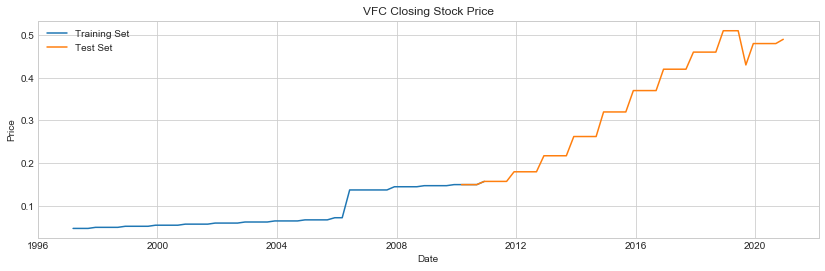

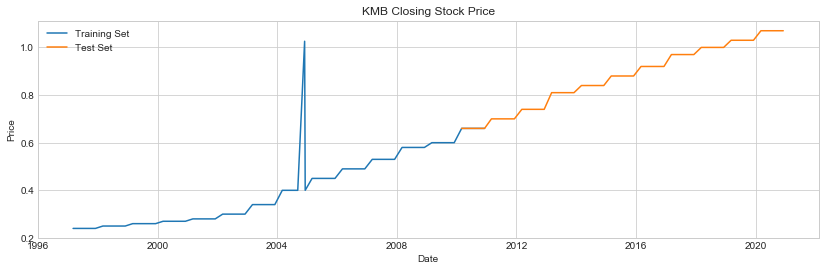

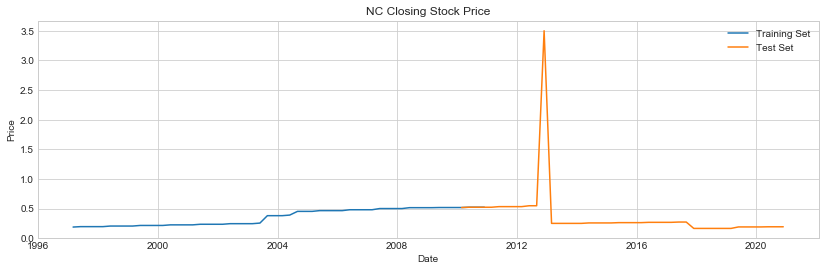

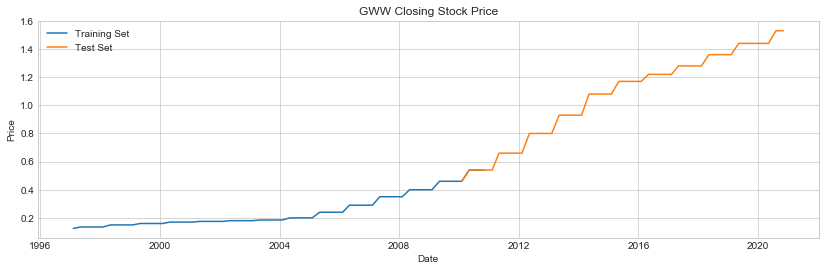

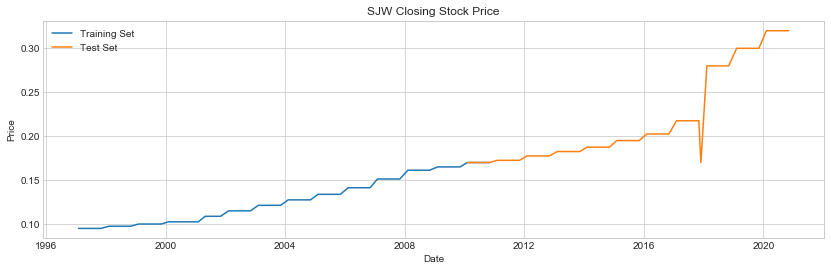

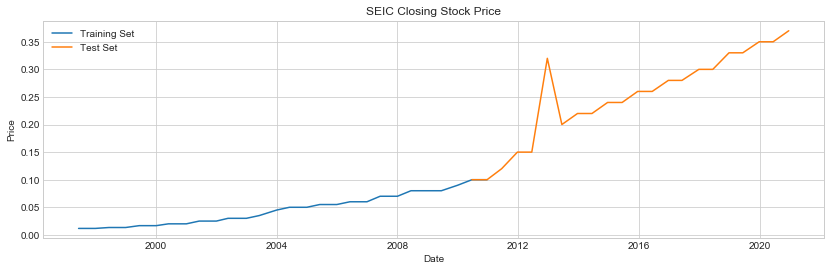

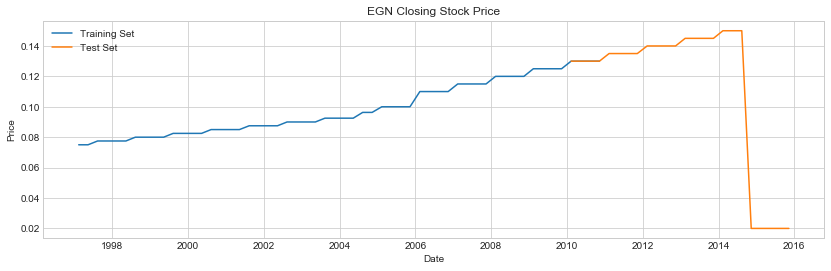

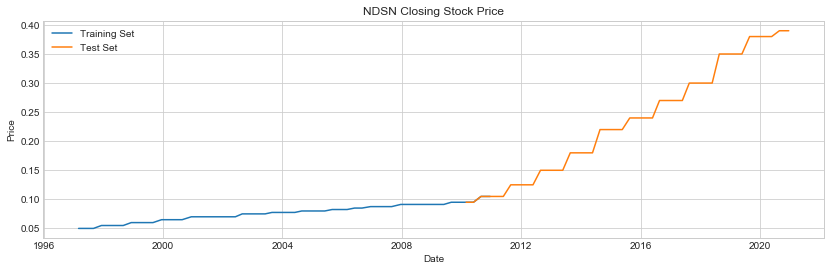

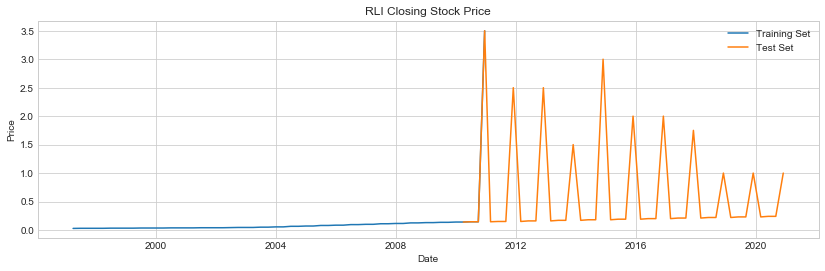

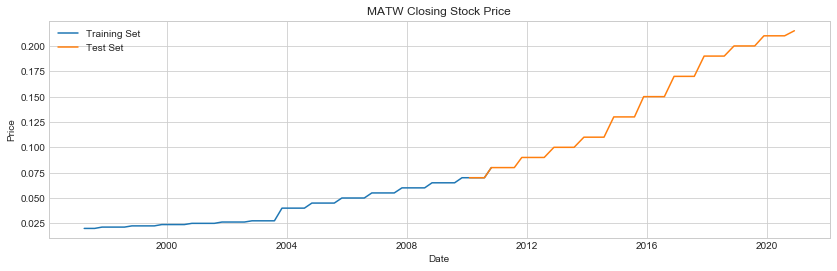

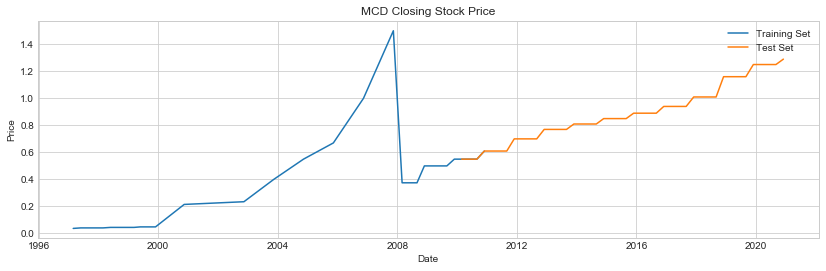

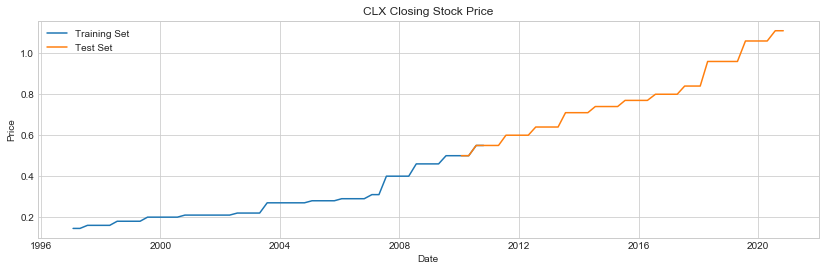

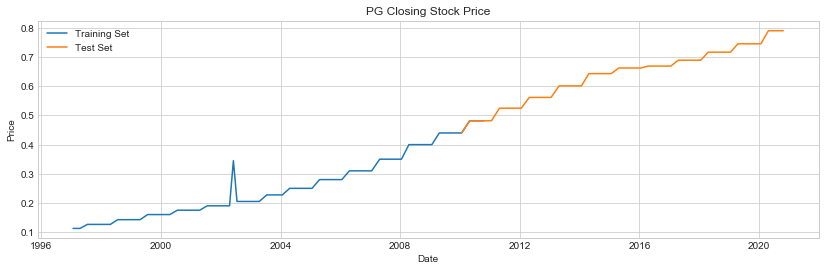

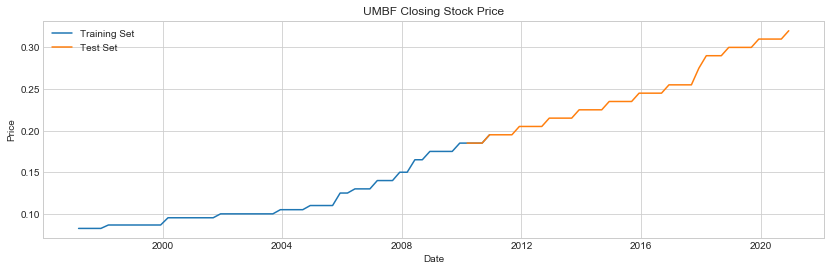

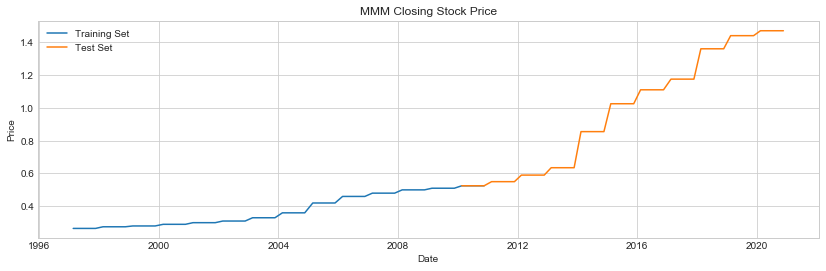

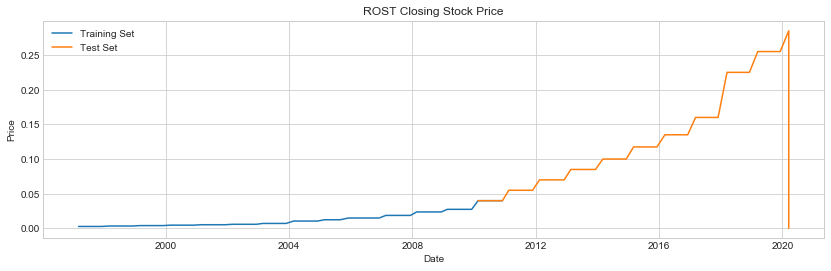

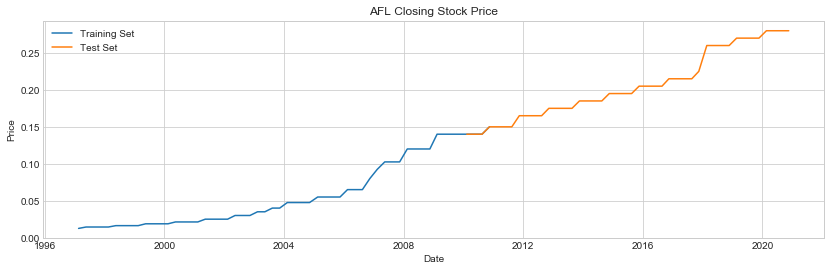

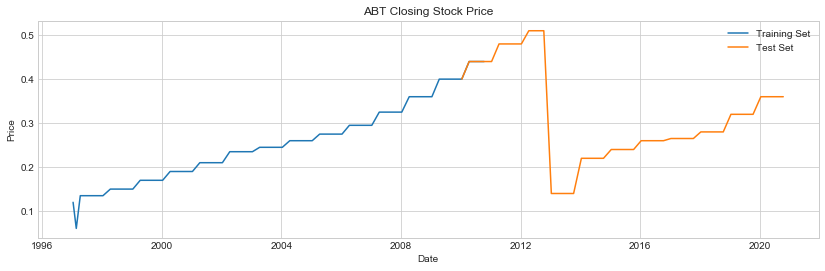

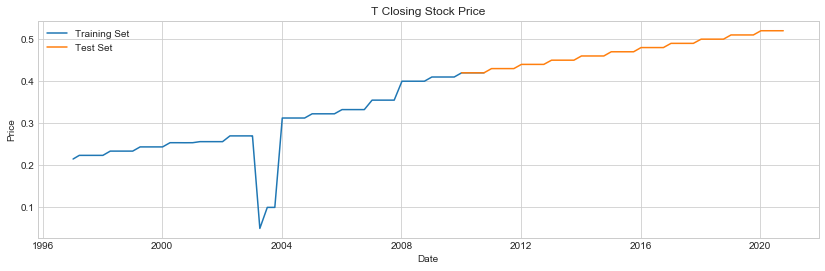

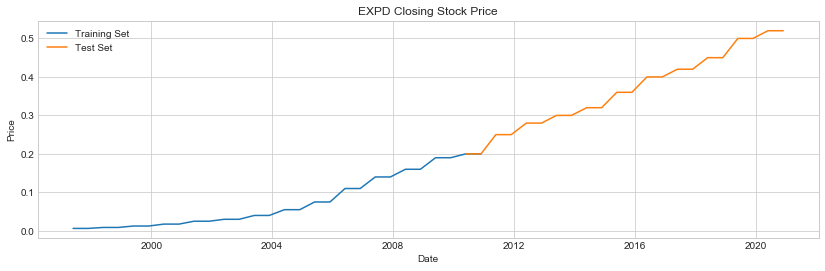

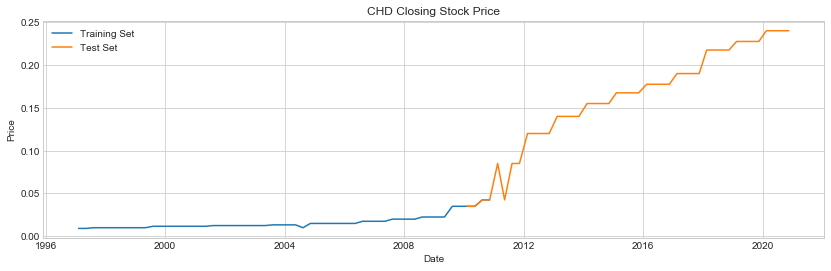

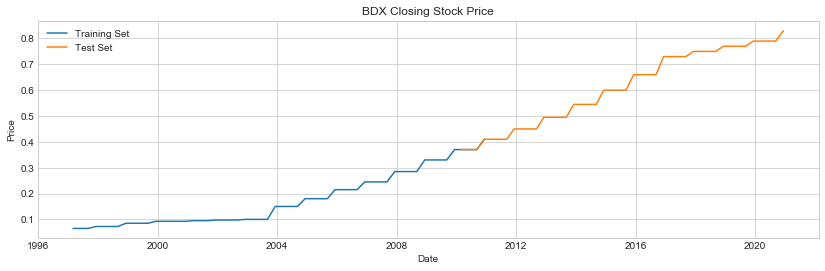

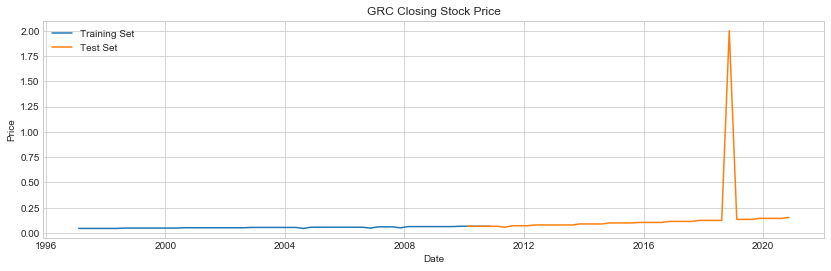

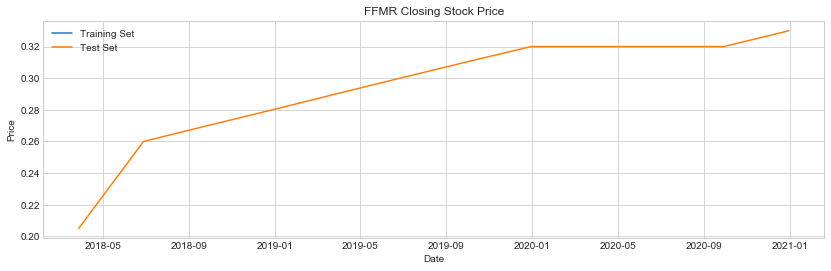

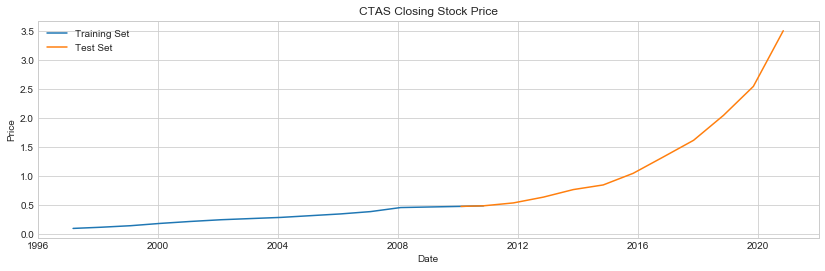

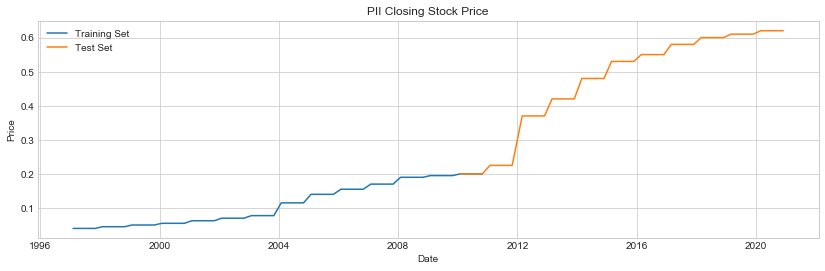

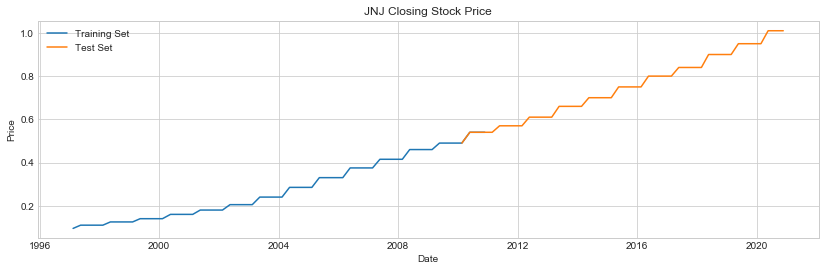

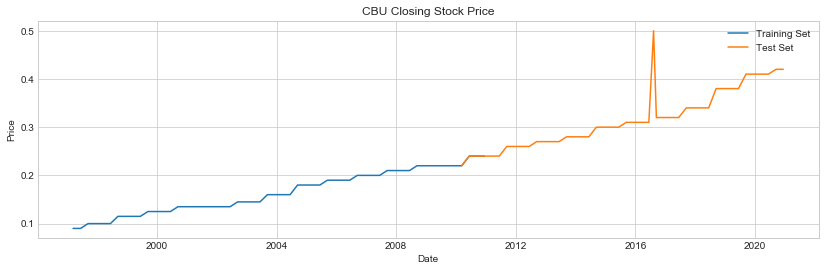

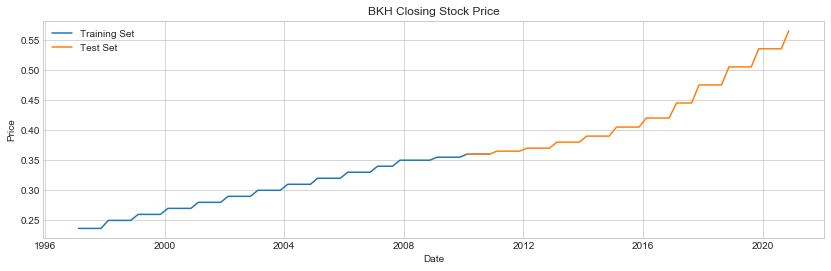

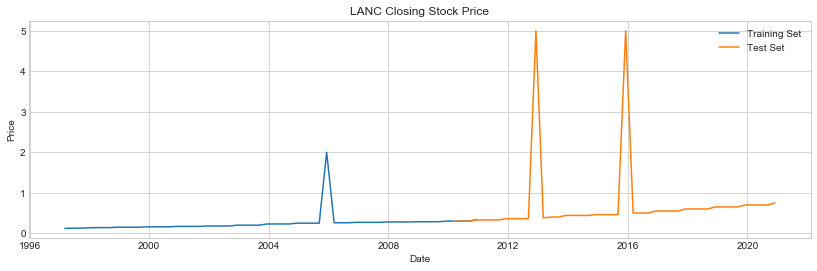

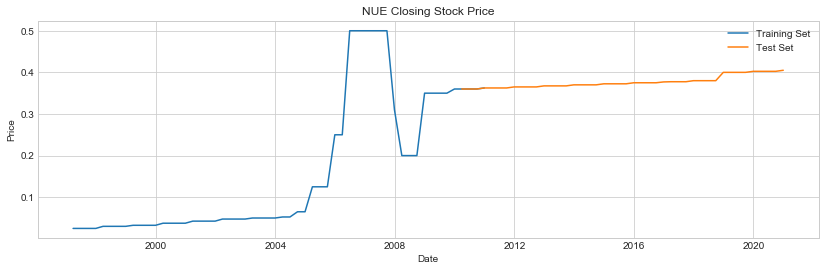

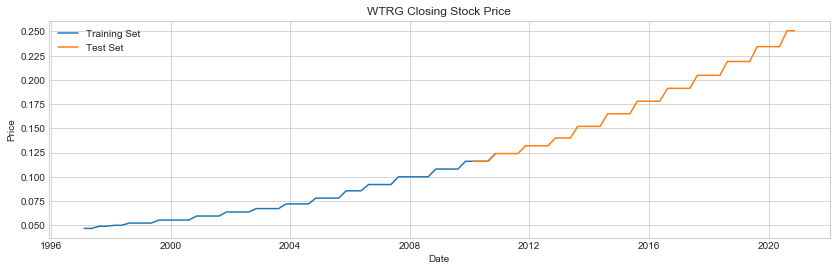

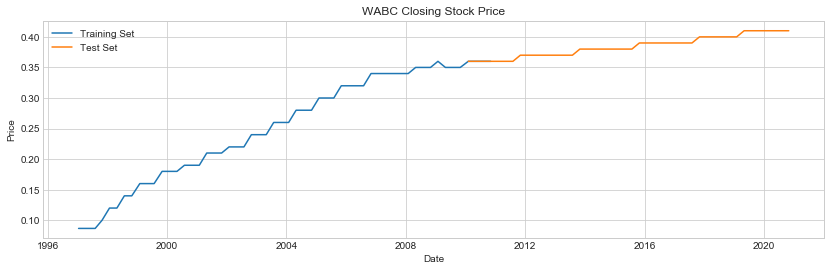

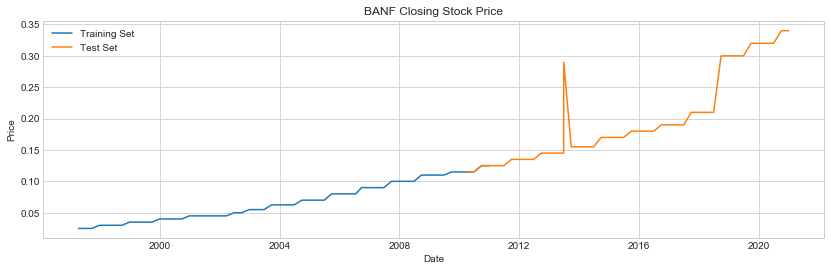

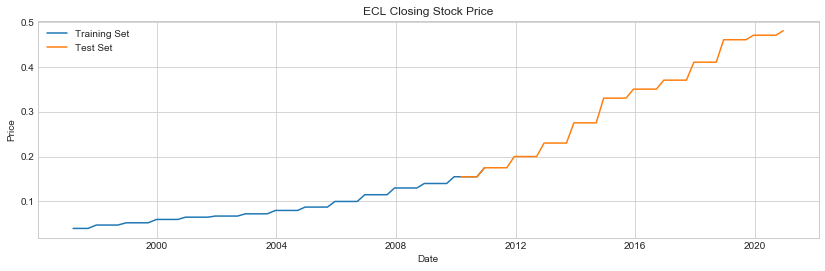

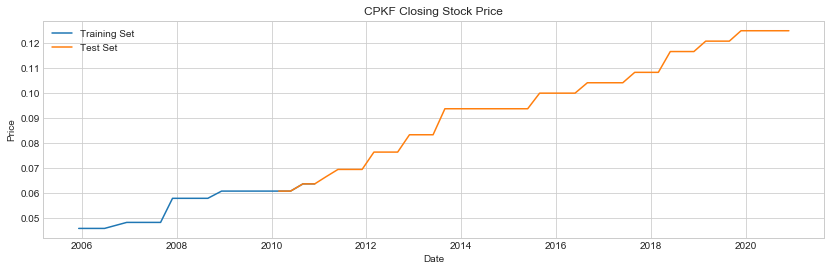

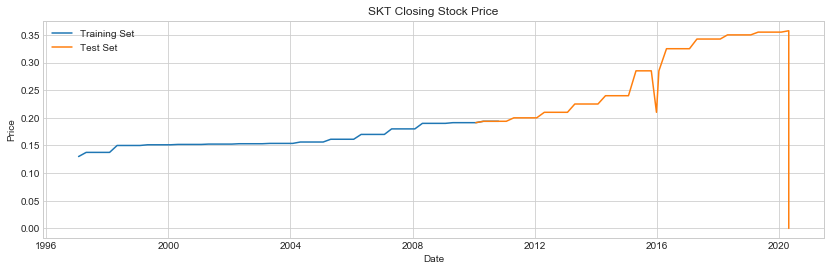

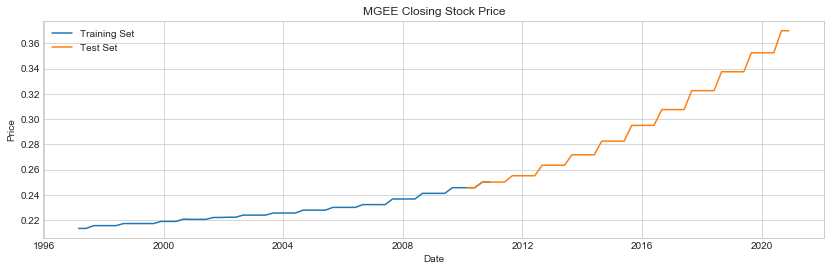

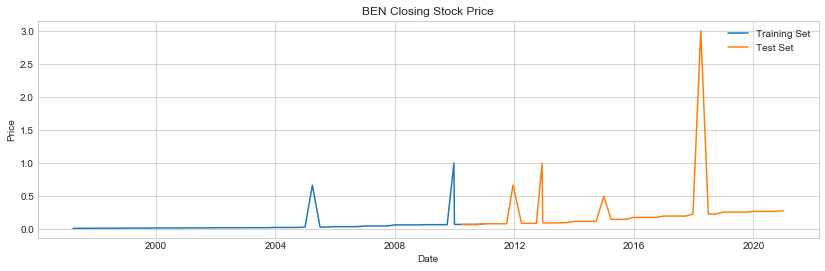

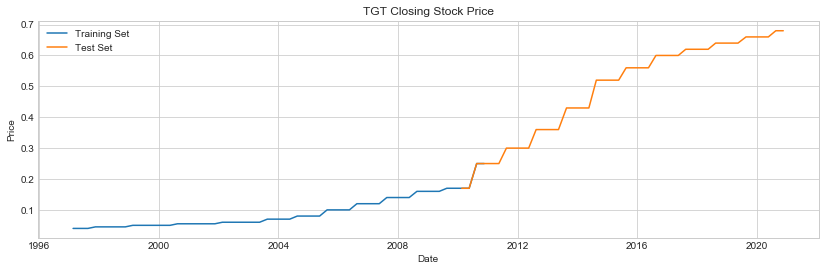

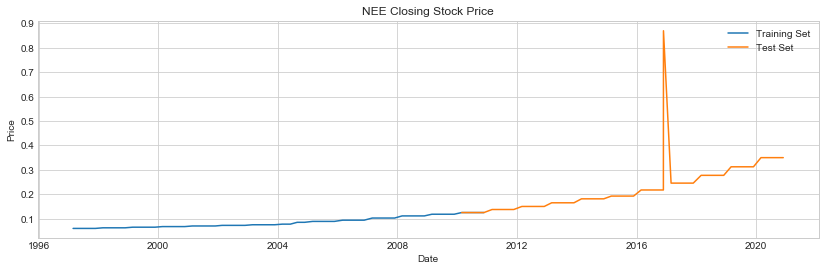

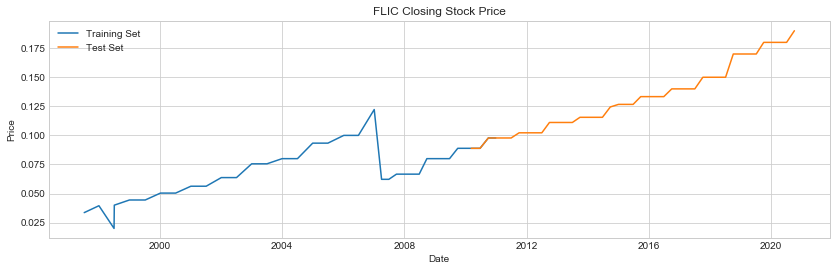

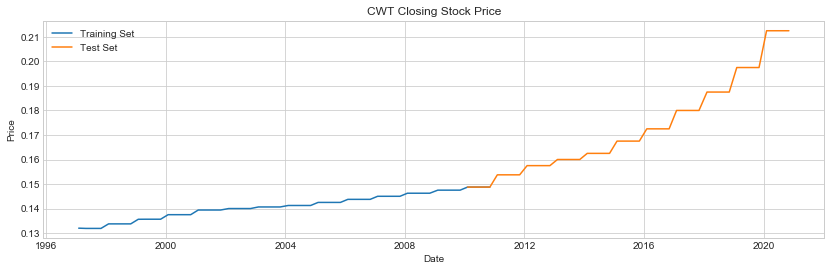

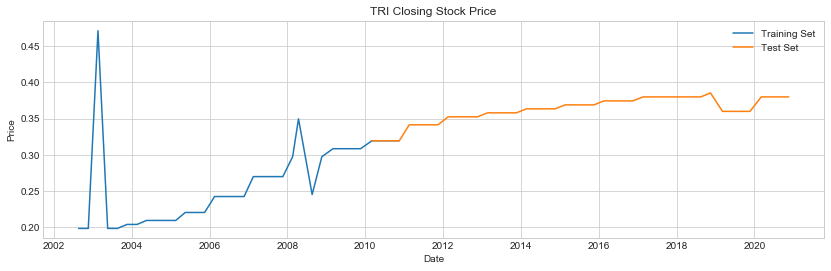

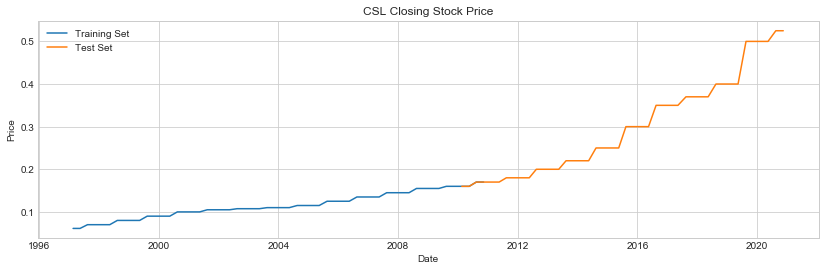

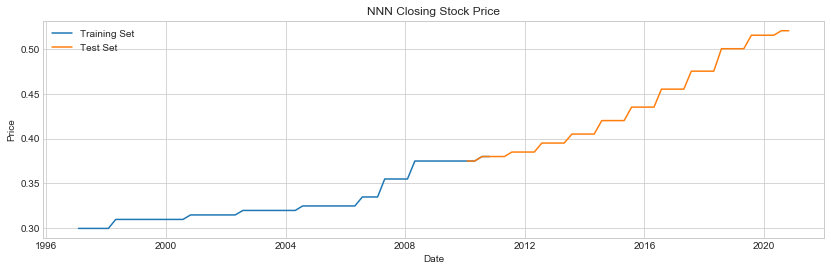

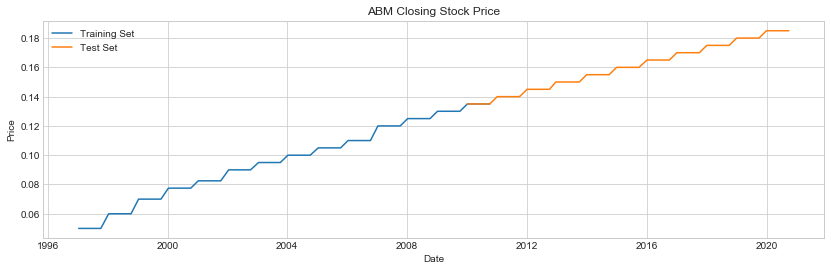

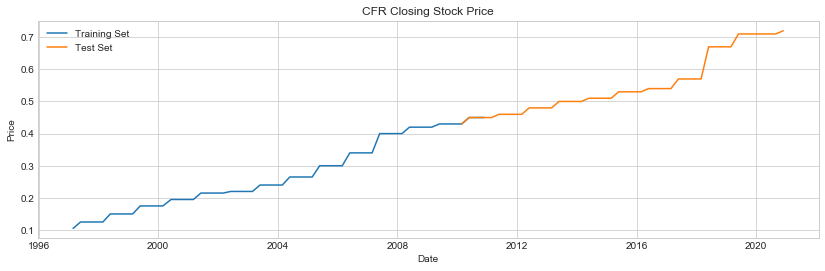

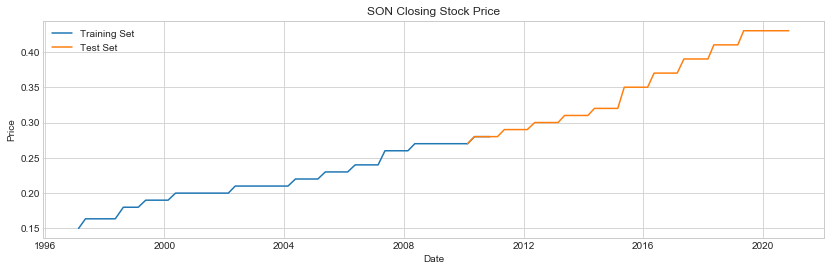

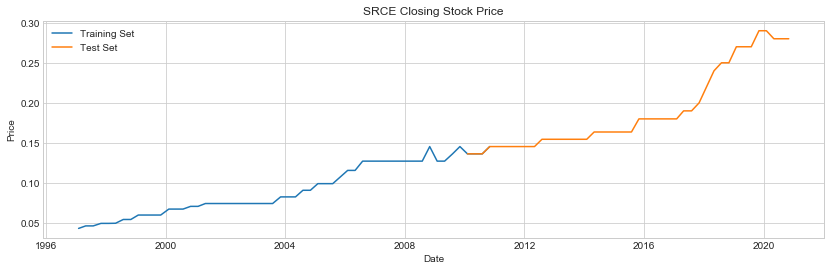

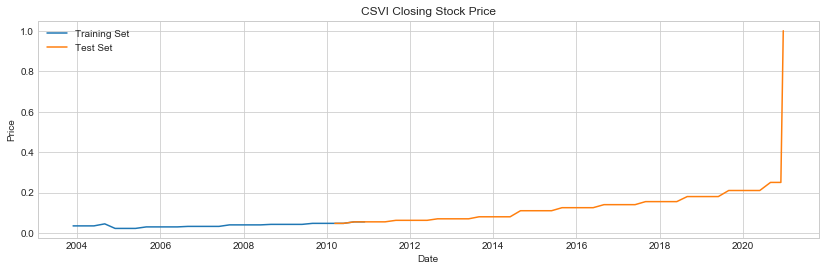

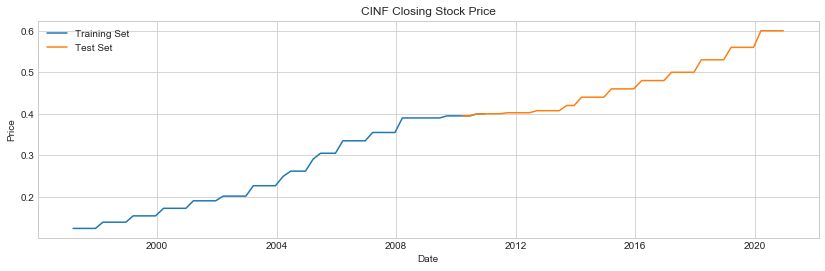

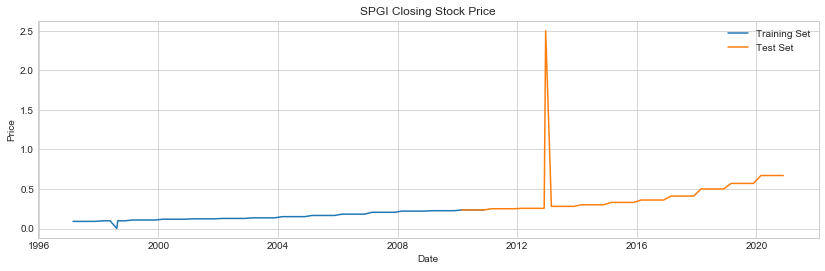

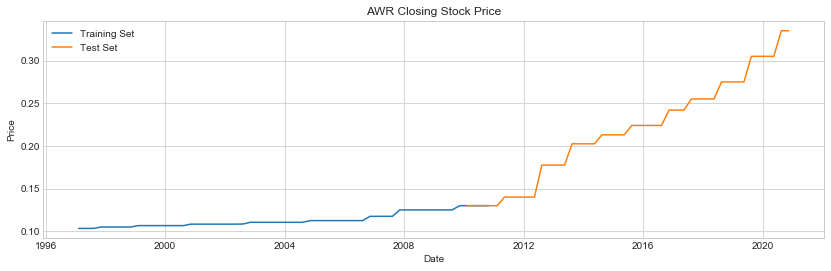

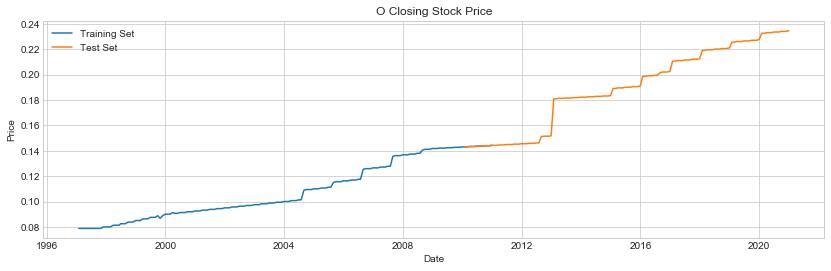

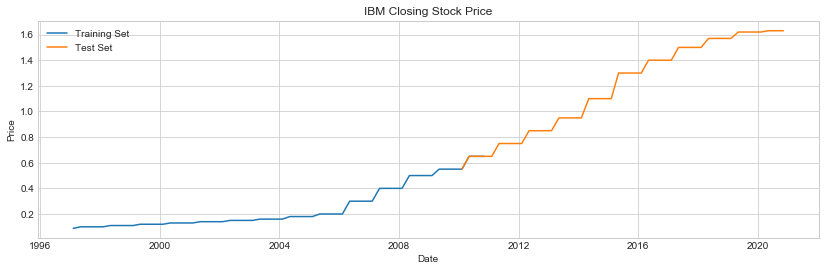

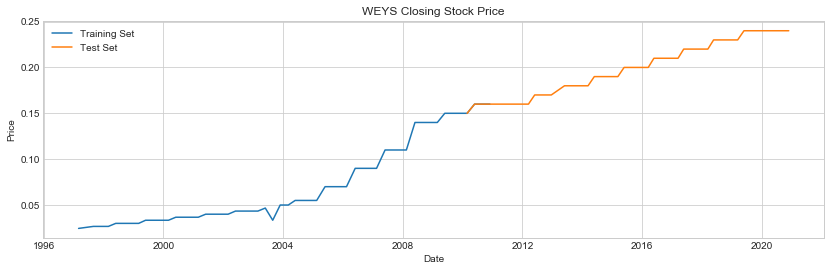

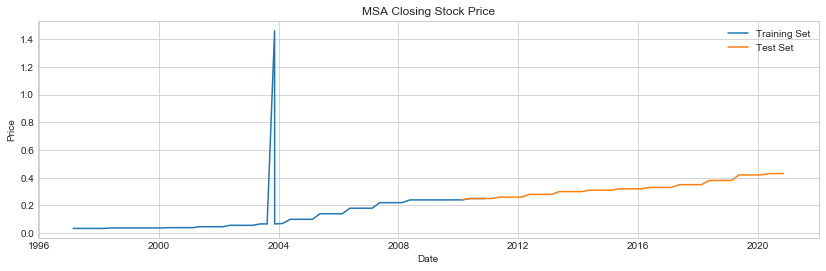

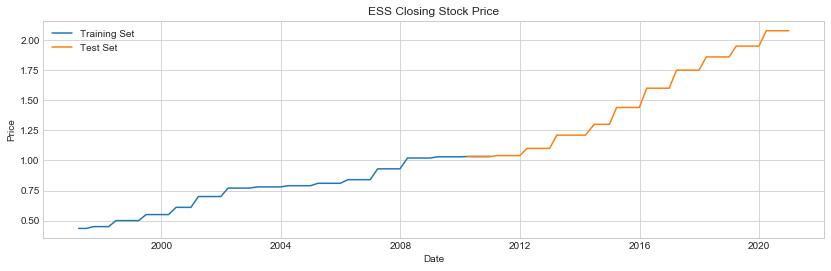

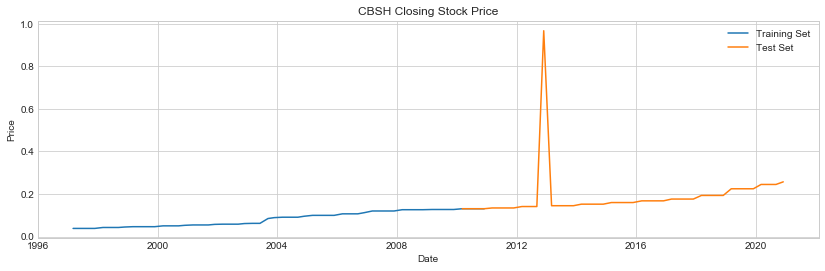

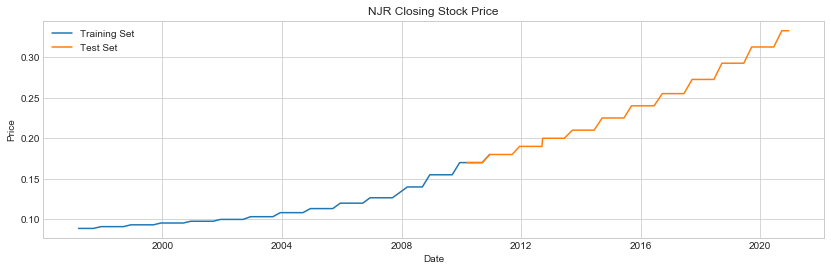

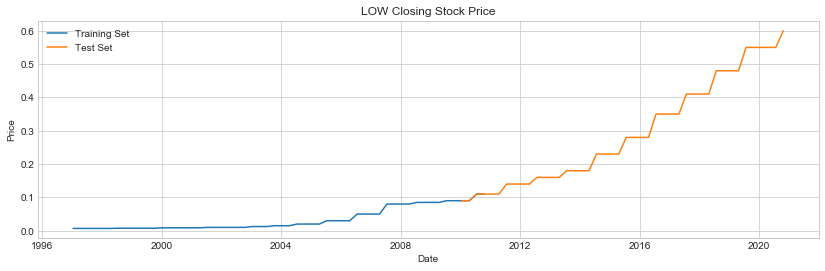

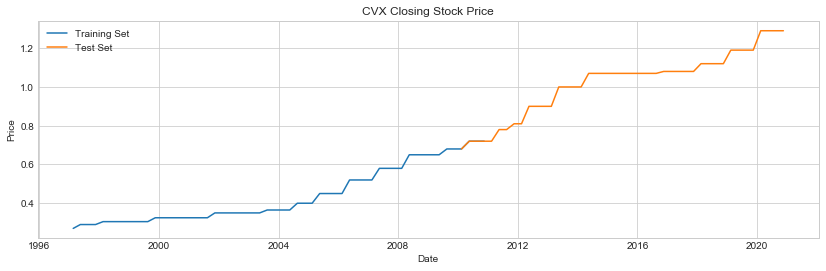

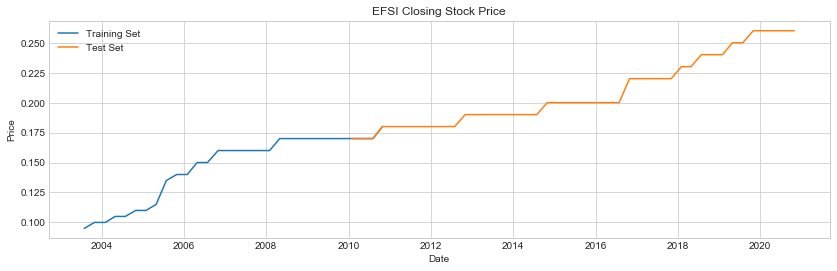

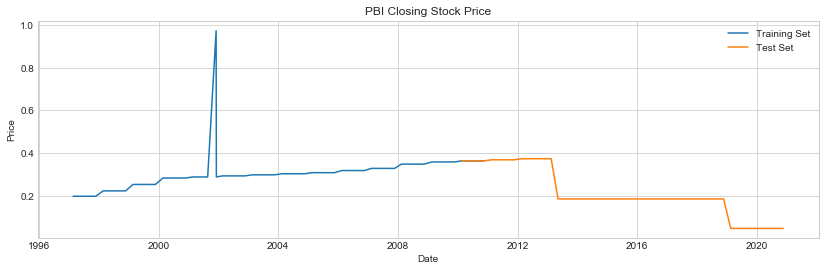

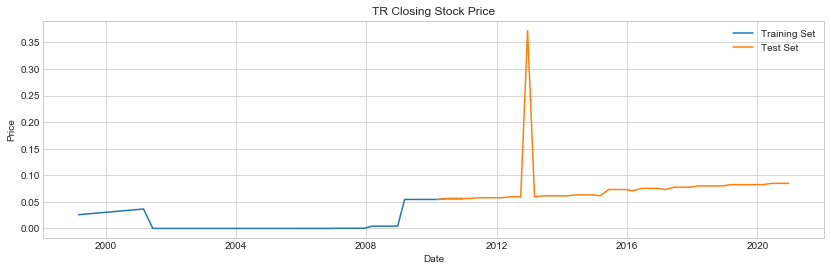

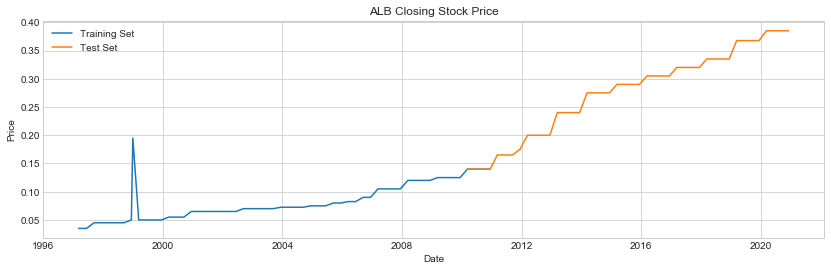

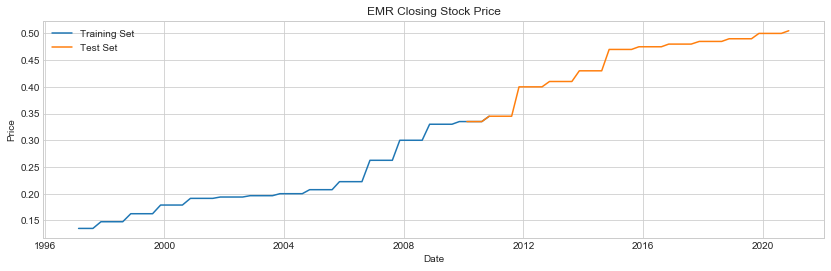

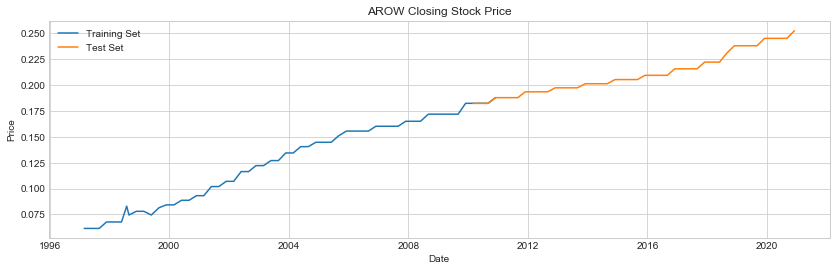

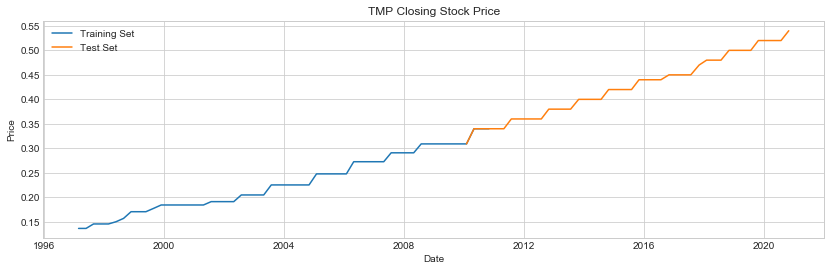

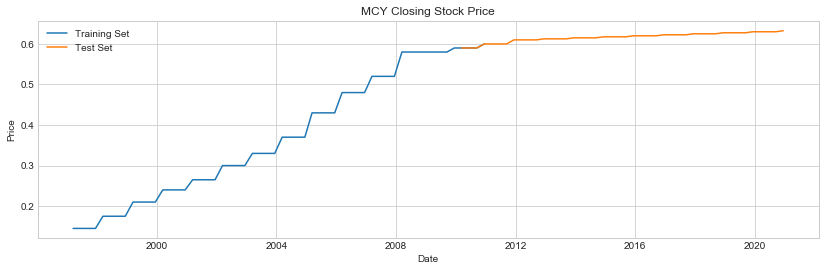

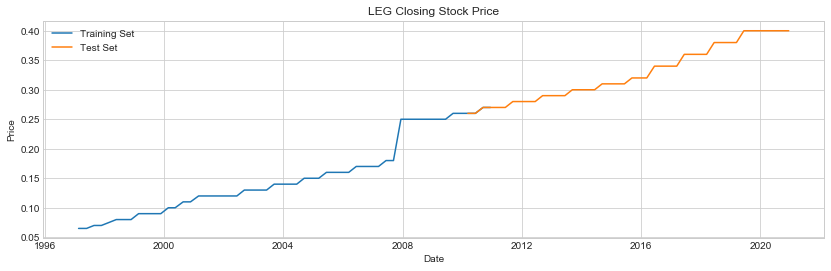

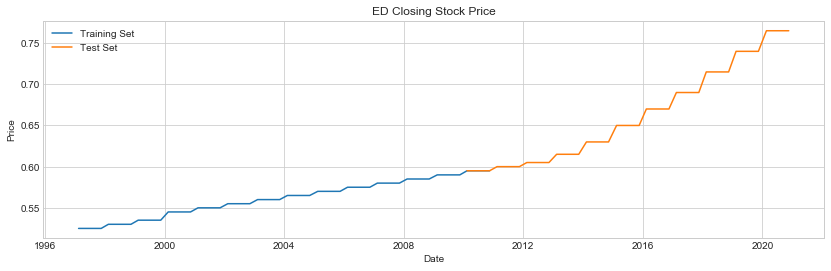

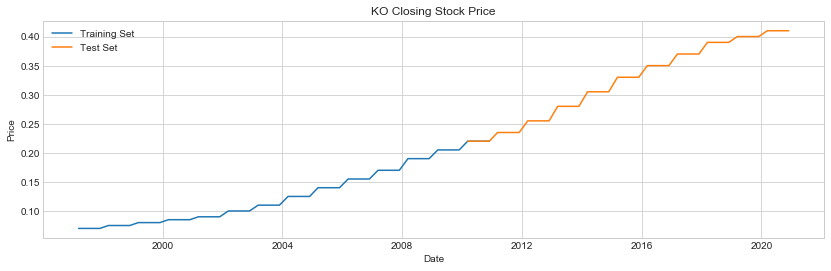

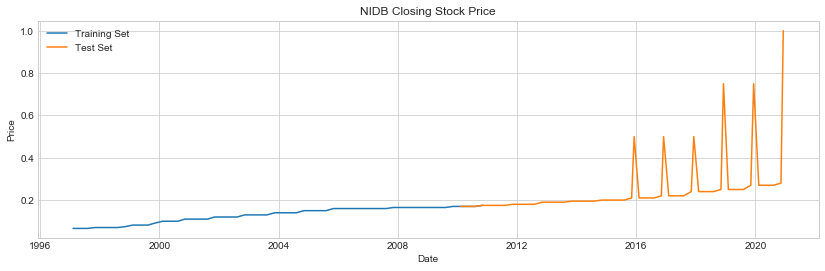

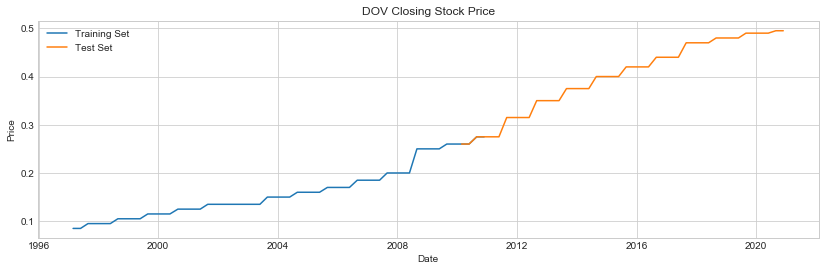

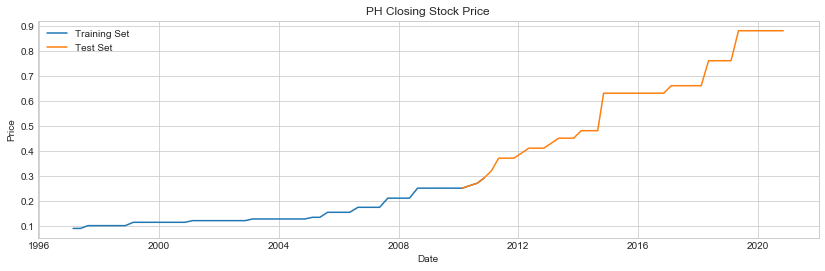

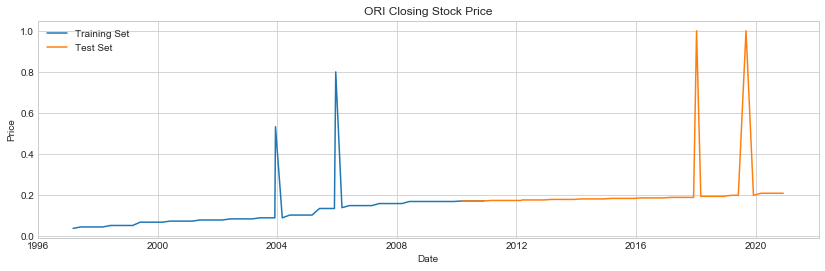

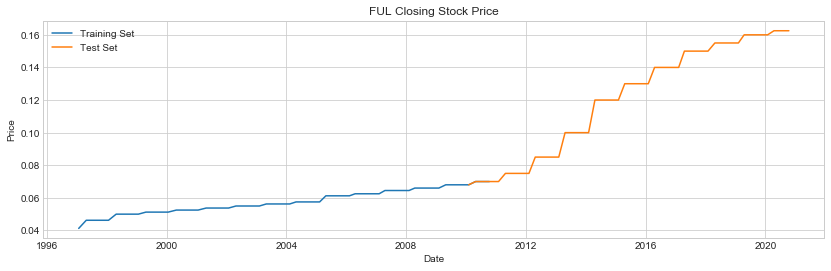

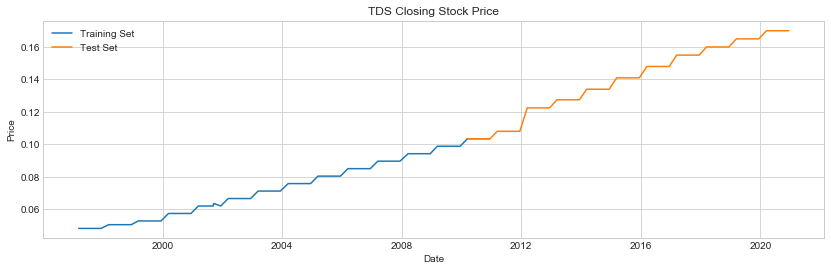

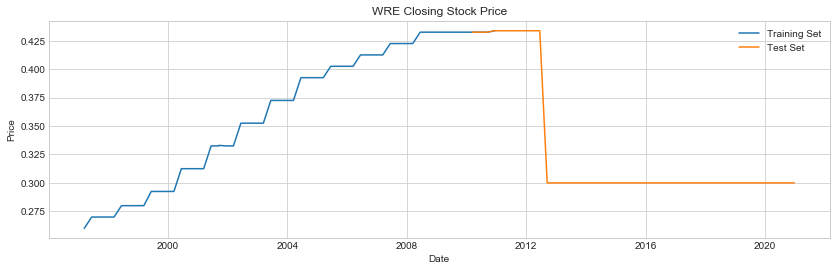

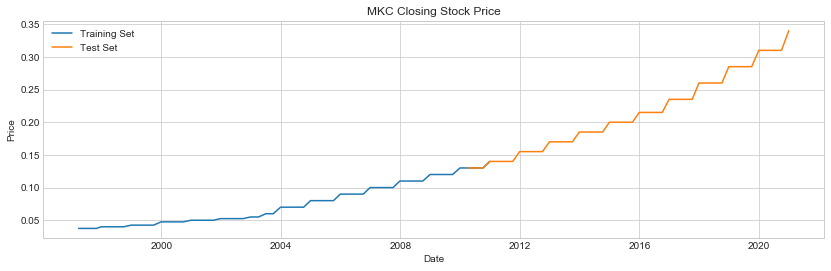

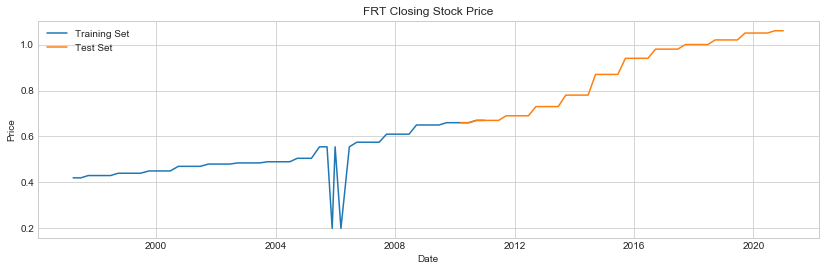

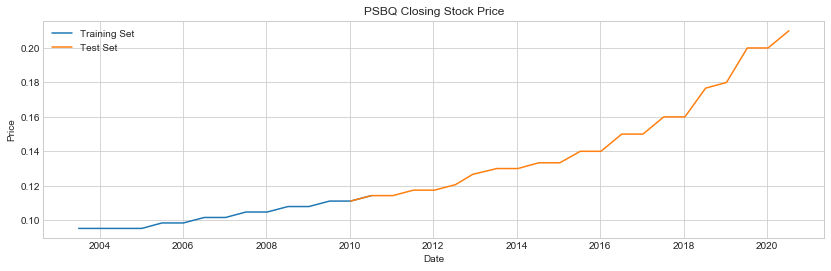

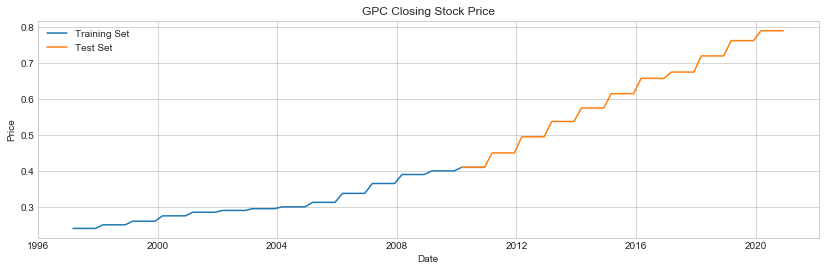

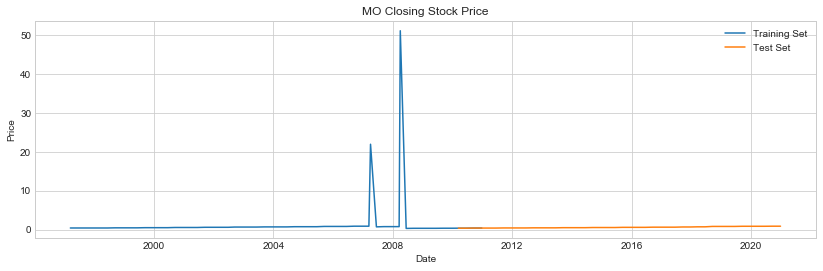

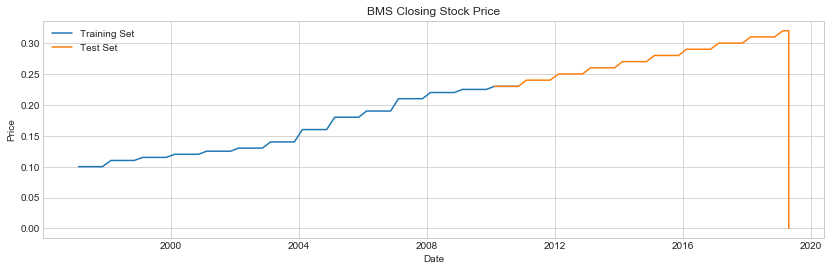

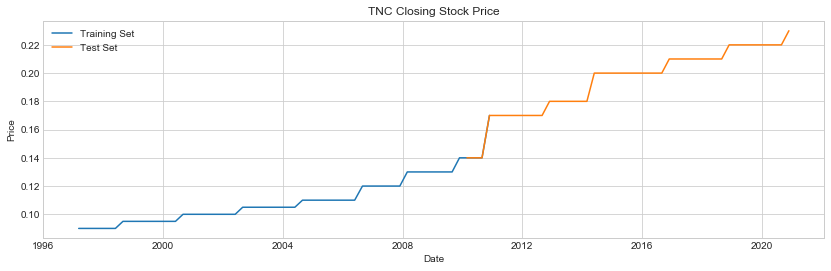

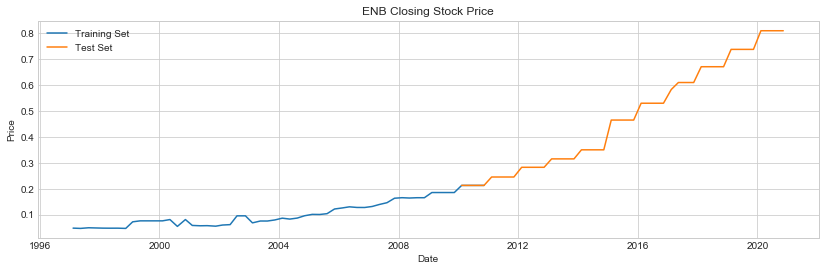

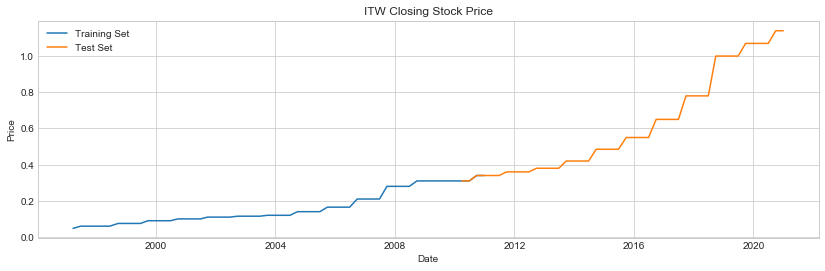

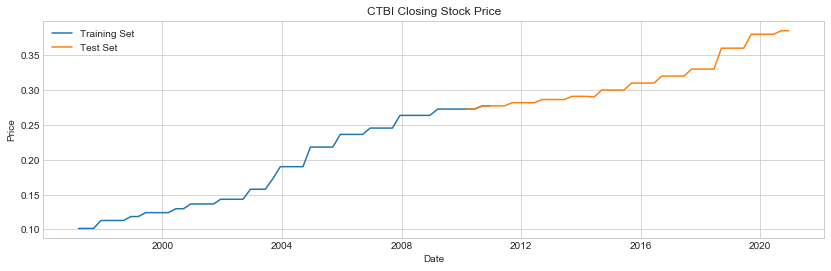

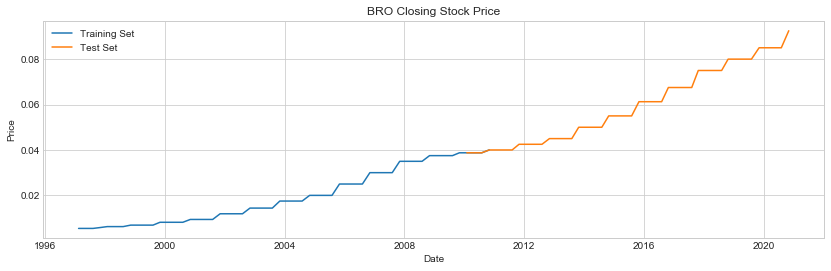

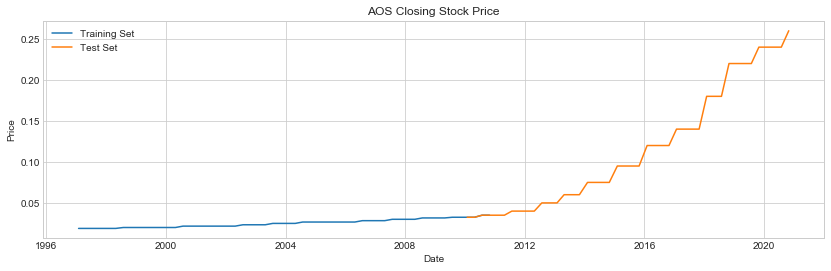

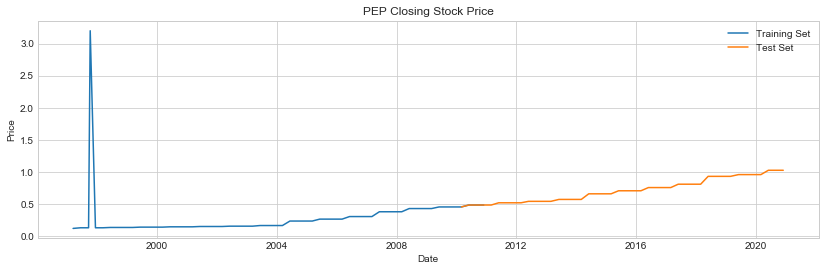

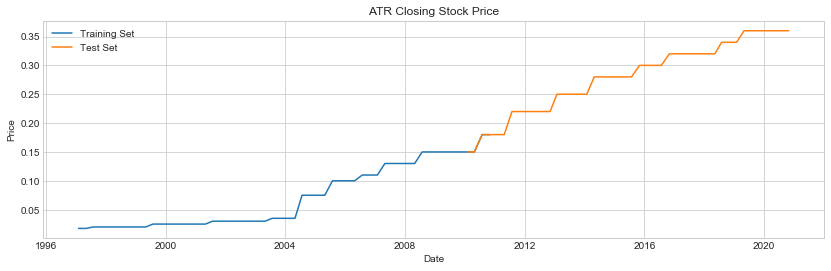

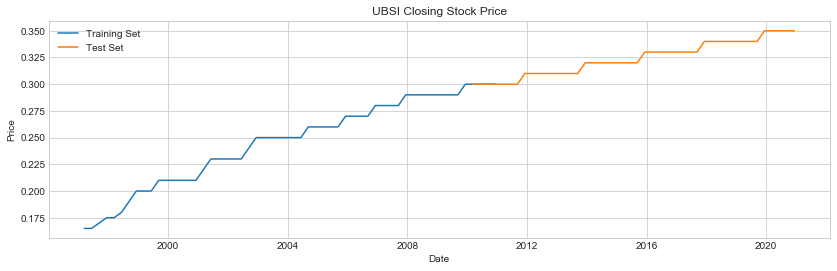

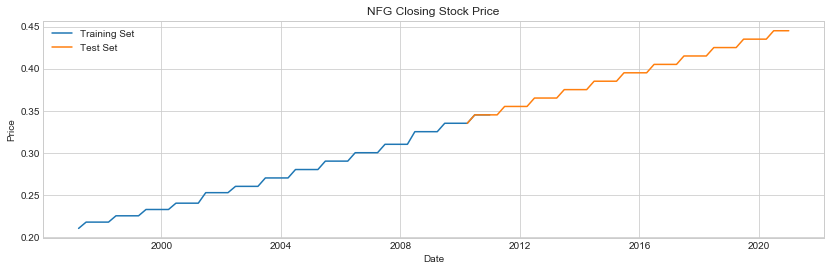

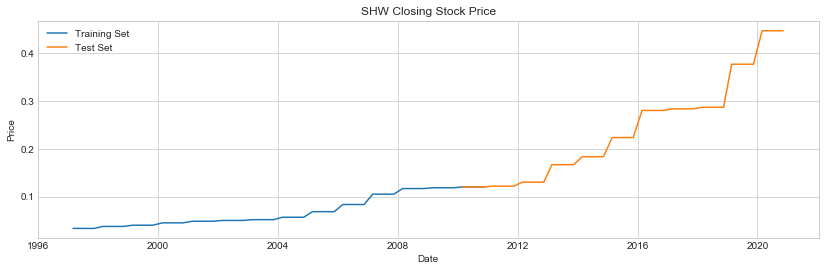

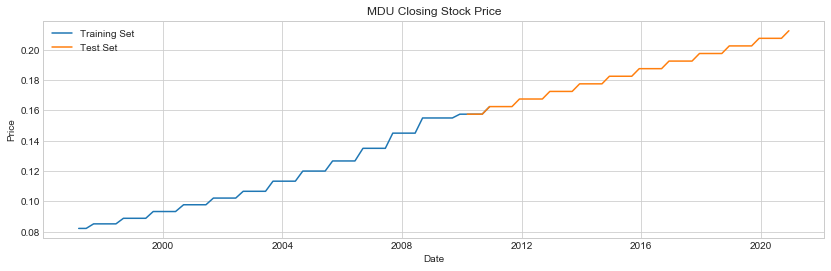

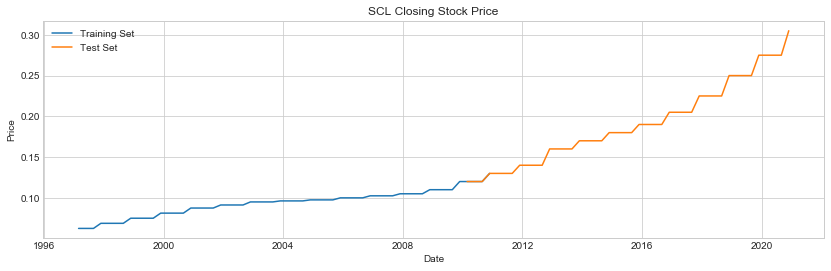

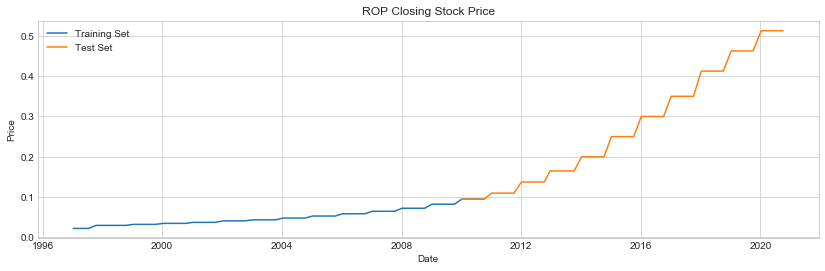

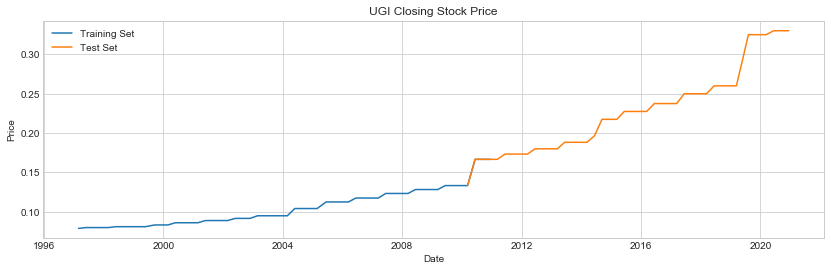

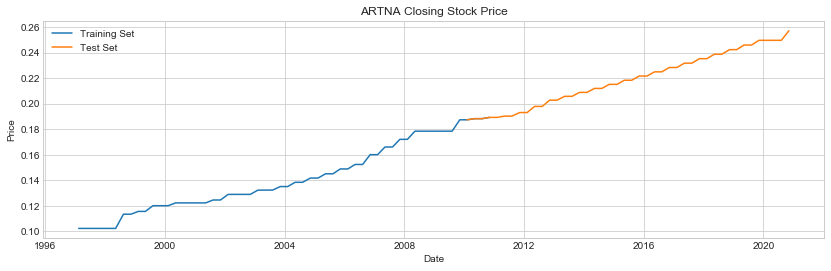

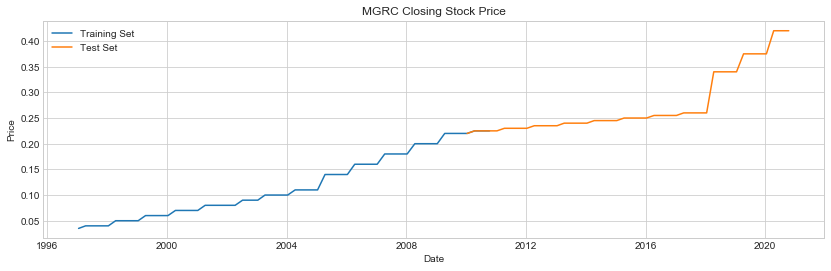

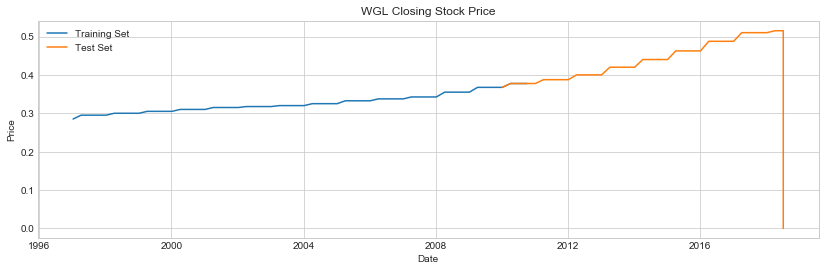

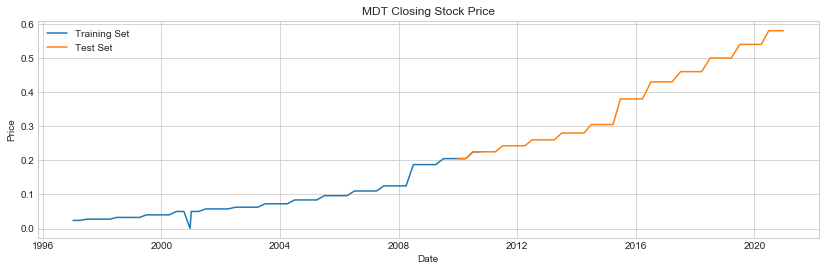

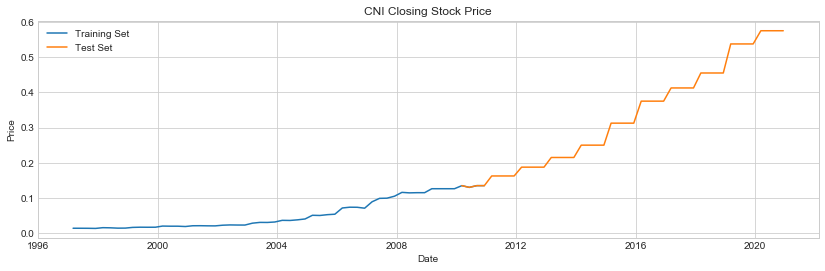

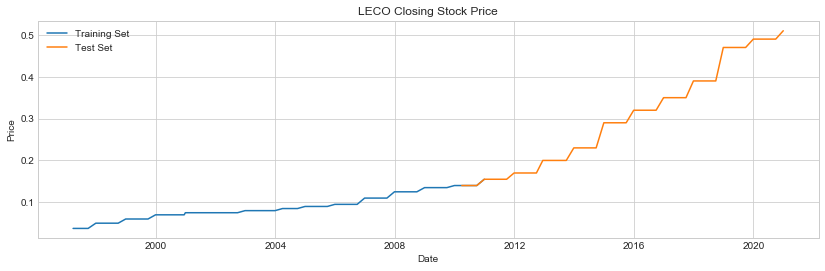

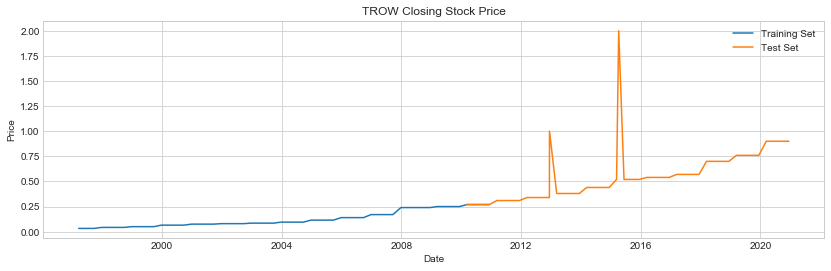

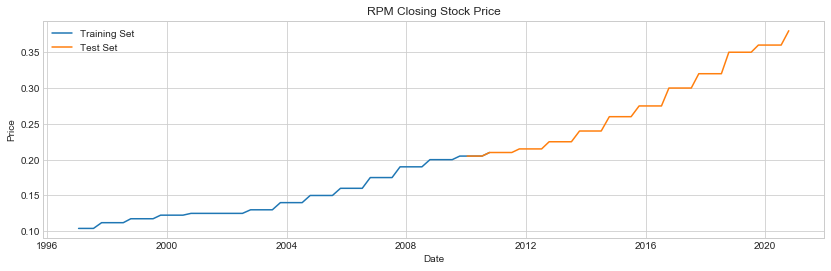

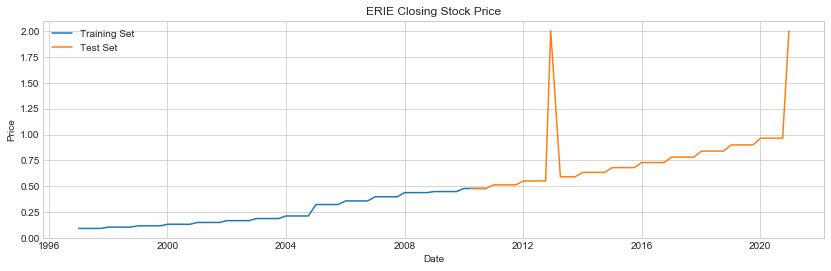

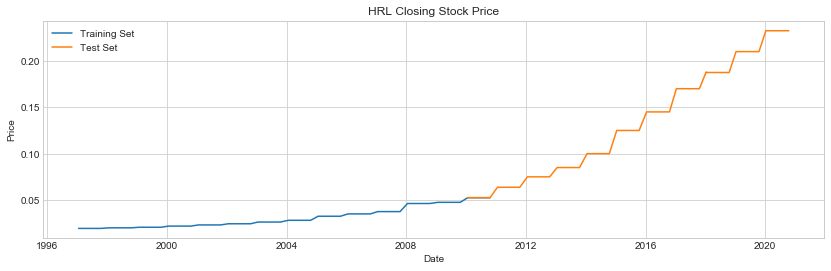

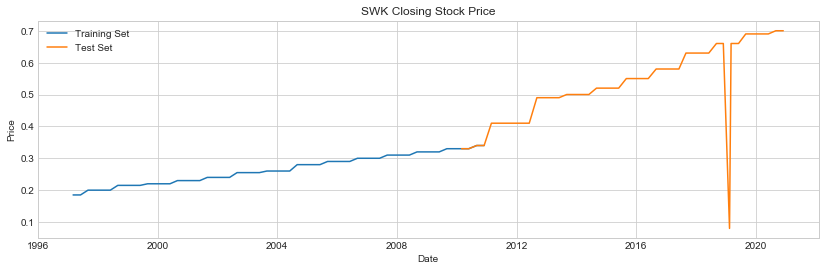

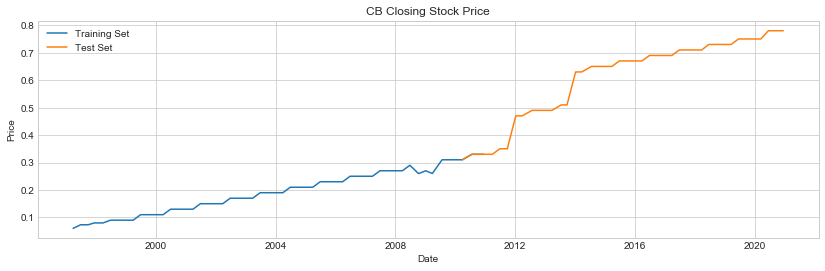

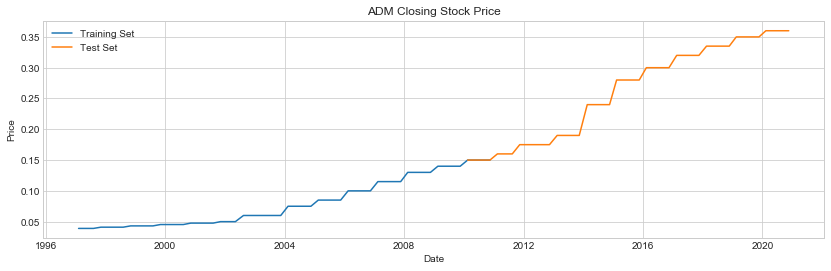

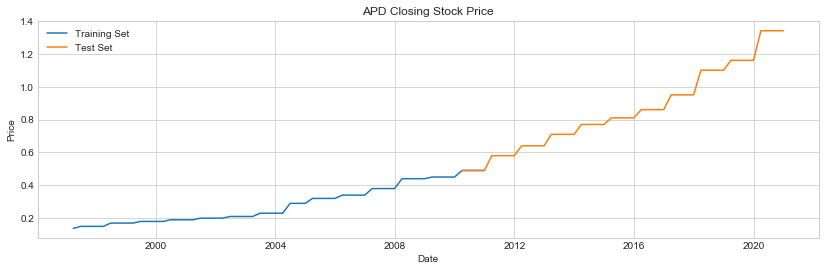

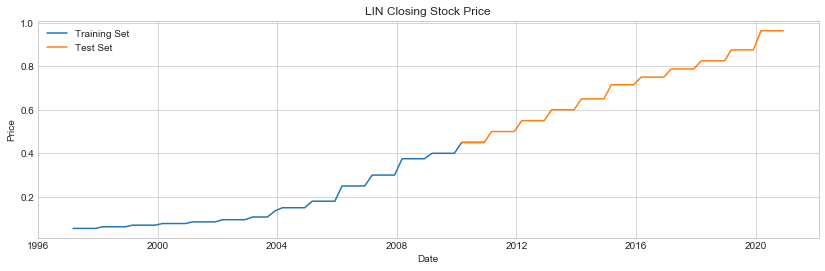

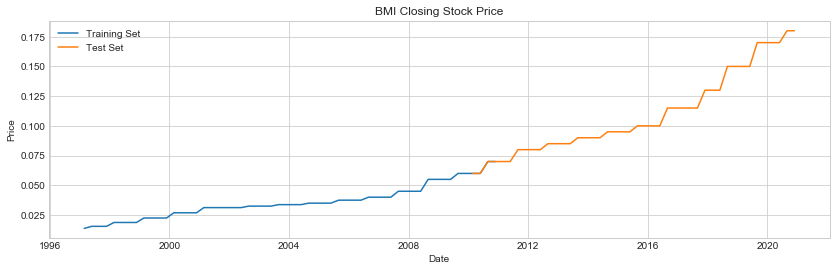

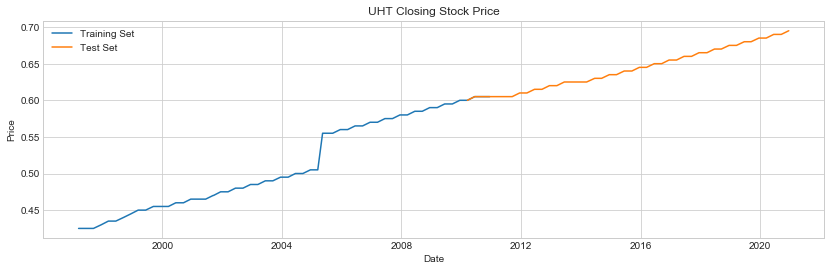

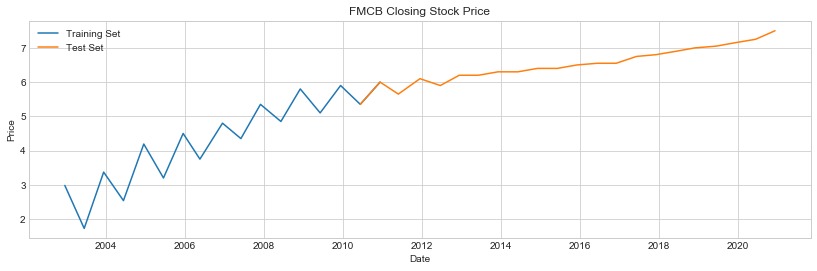

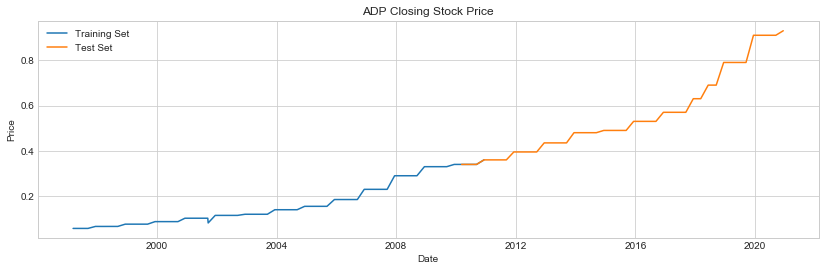

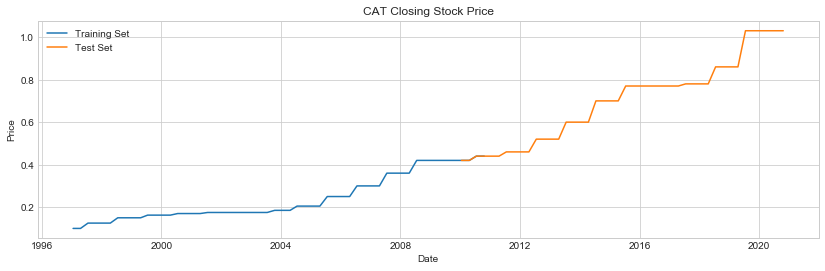

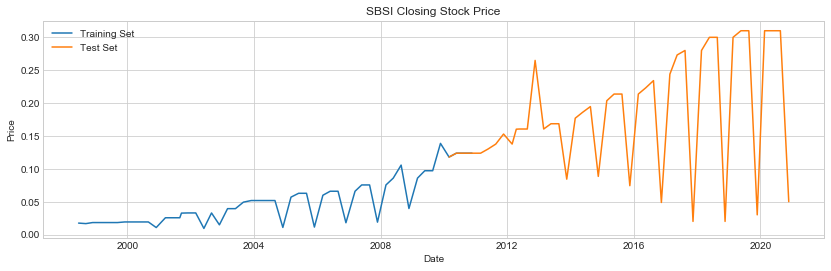

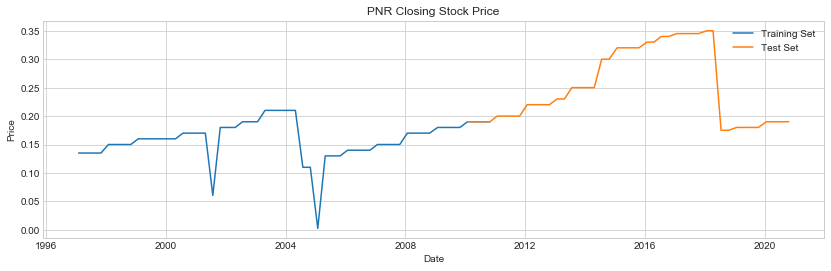

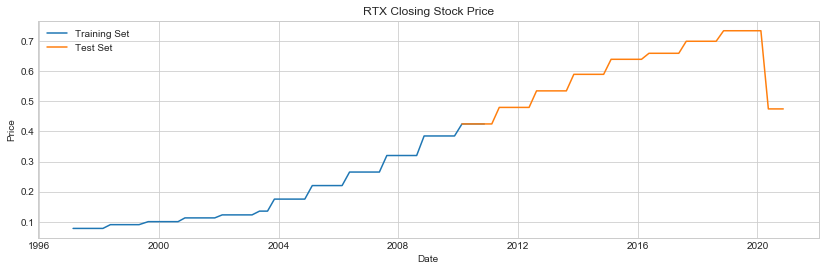

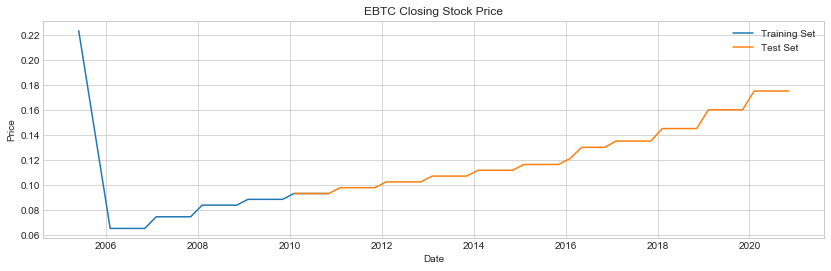

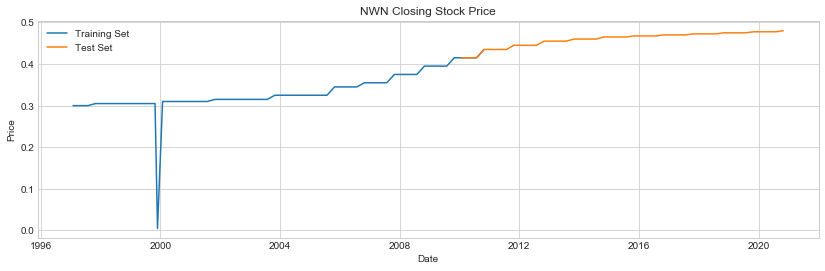

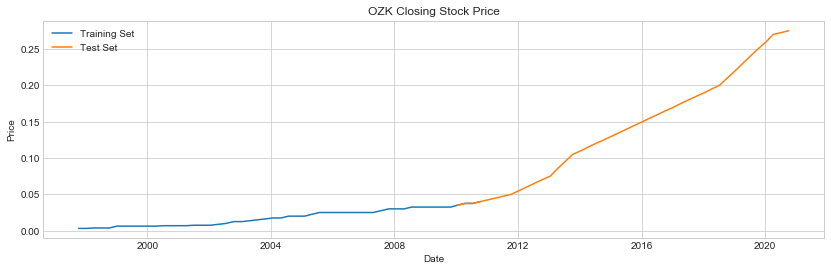

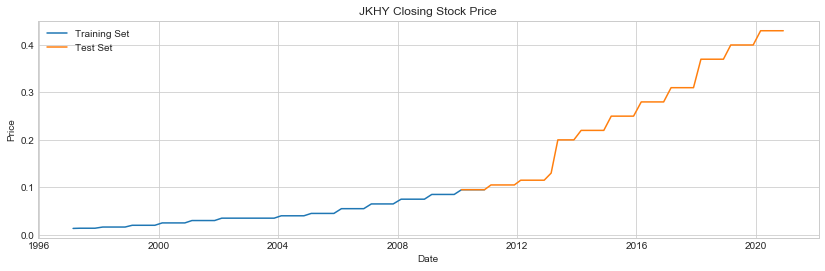

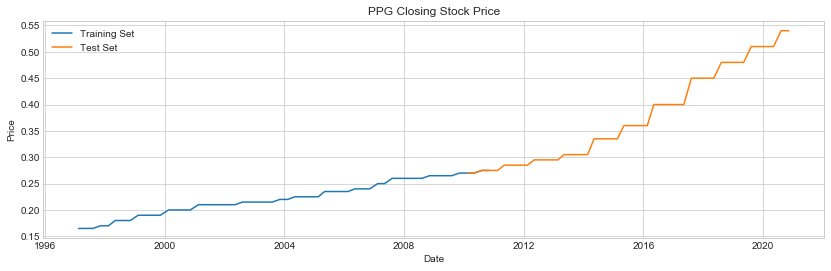

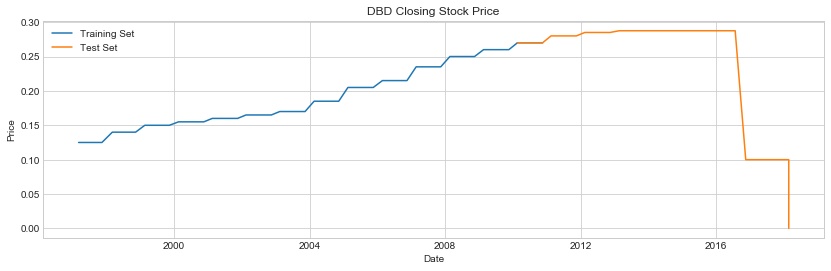

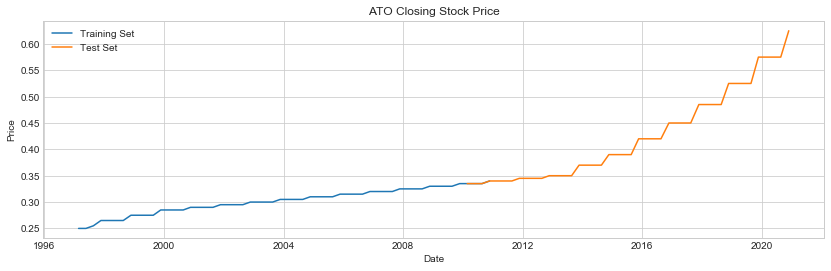

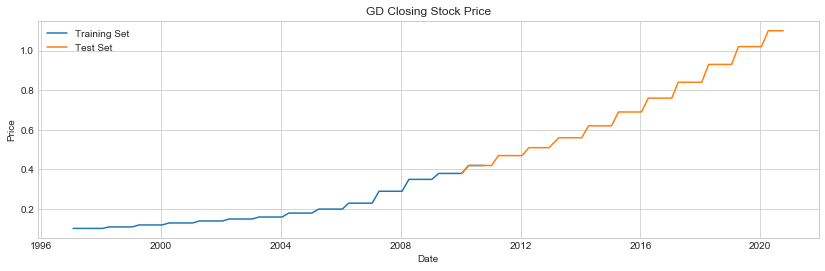

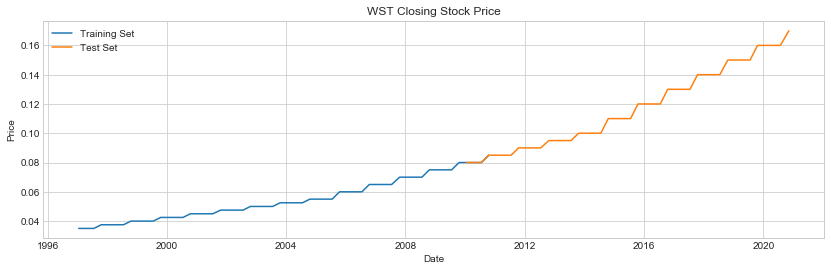

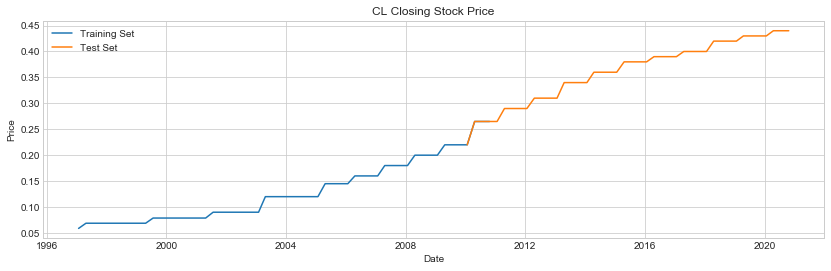

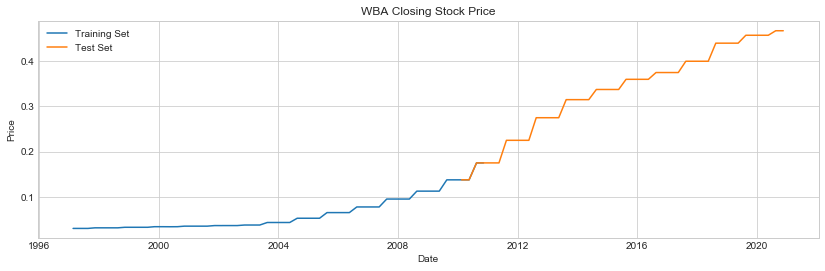

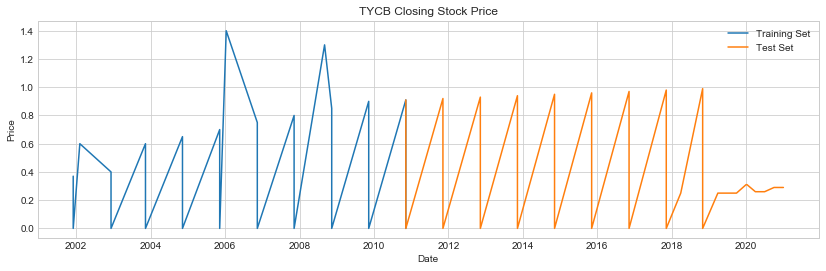

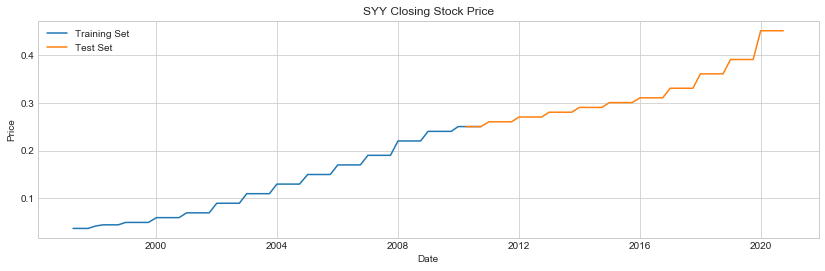

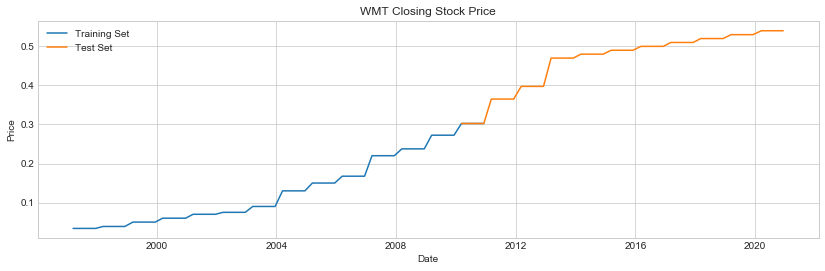

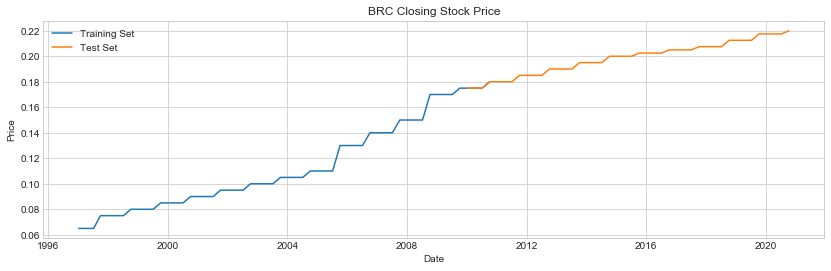

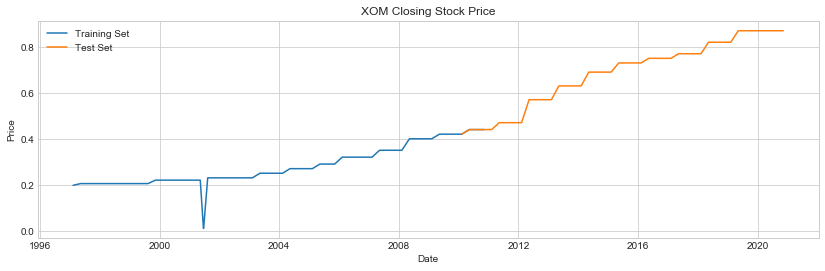

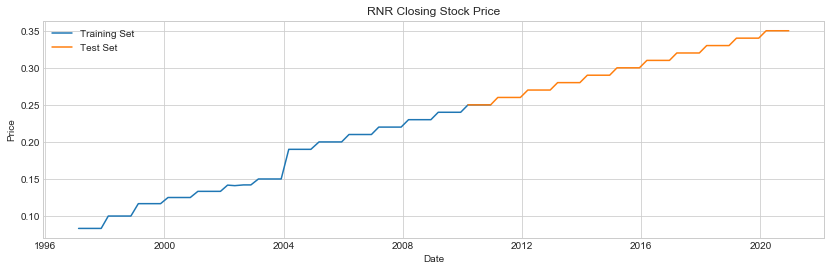

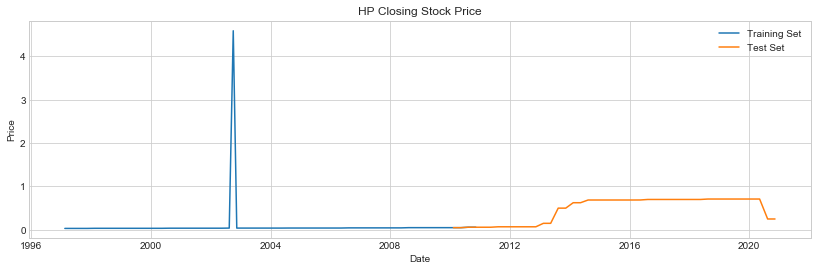

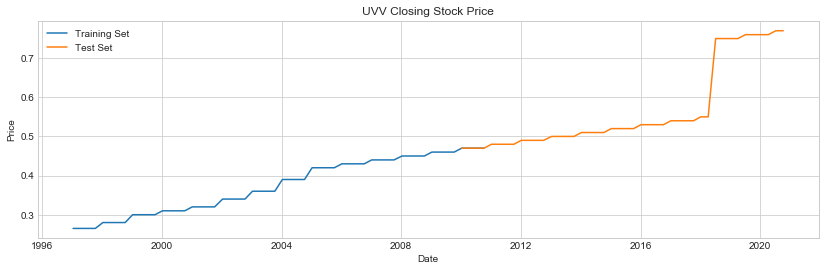

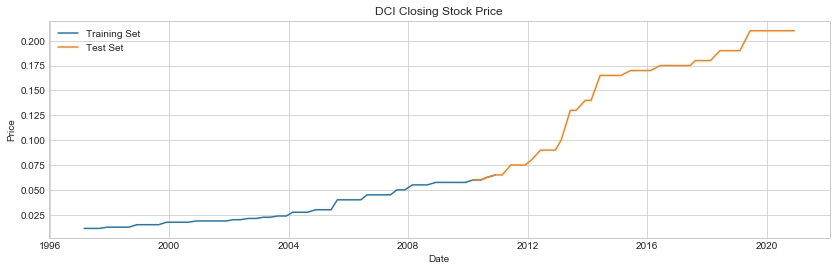

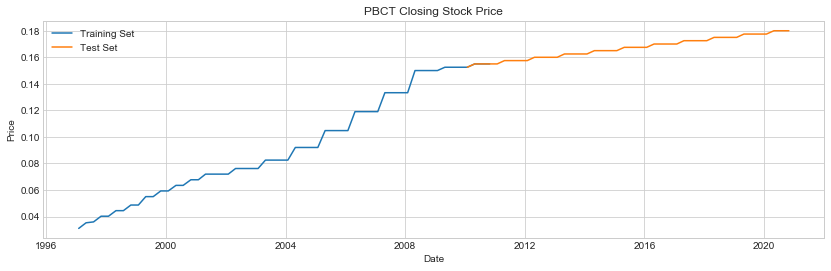

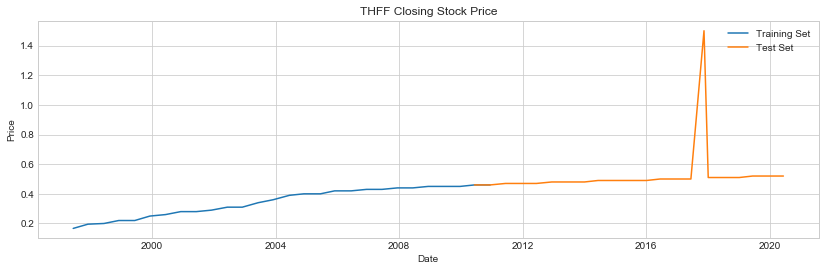

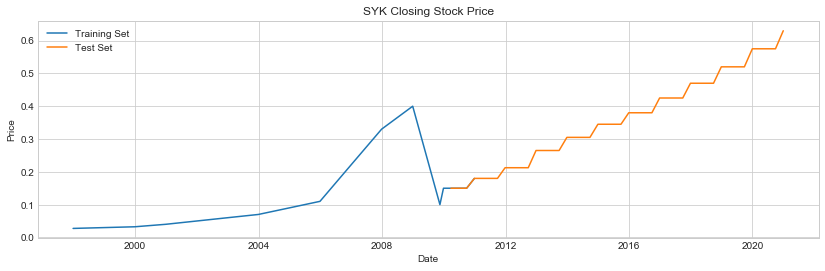

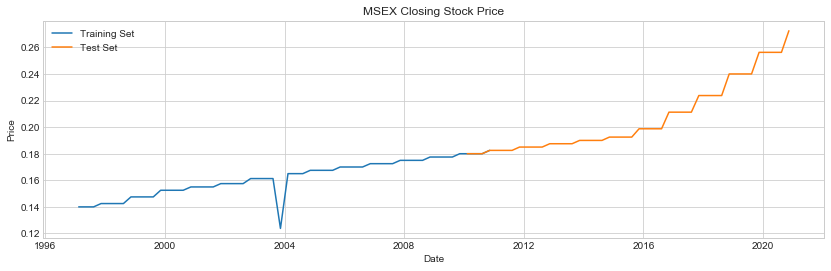

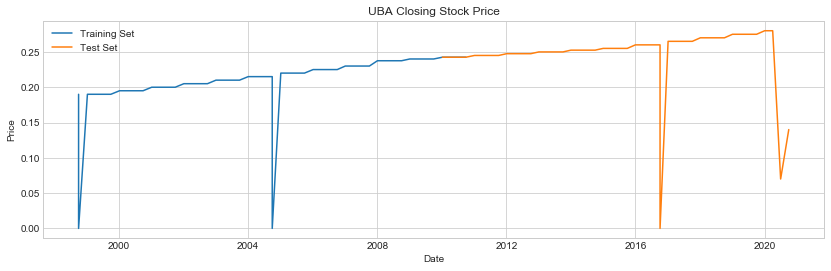

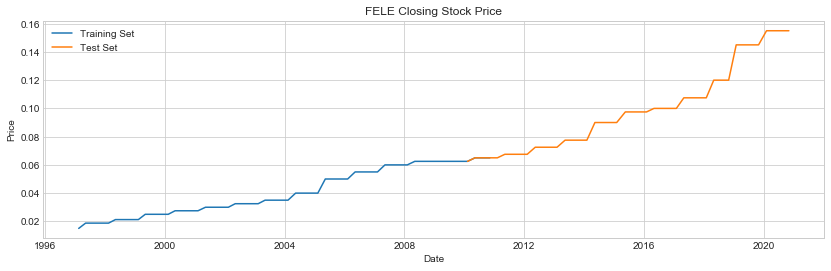

In [20]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [23]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    if i not in ["FFMR"]:
        sc = MinMaxScaler(feature_range=(0,1))
        a0 = np.array(df_new[i]["Train"])
        a1 = np.array(df_new[i]["Test"])
        a0 = a0.reshape(a0.shape[0],1)
        a1 = a1.reshape(a1.shape[0],1)
        transform_train[i] = sc.fit_transform(a0)
        transform_test[i] = sc.fit_transform(a1)
        scaler[i] = sc
    
del a0
del a1

In [24]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

VFC (56, 1)
KMB (57, 1)
NC (56, 1)
GWW (56, 1)
SJW (56, 1)
SEIC (56, 1)
EGN (56, 1)
NDSN (56, 1)
RLI (56, 1)
MATW (56, 1)
MCD (56, 1)
CLX (56, 1)
PG (57, 1)
UMBF (56, 1)
MMM (56, 1)
ROST (56, 1)
AFL (56, 1)
ABT (57, 1)
T (58, 1)
EXPD (56, 1)
CHD (57, 1)
BDX (57, 1)
GRC (56, 1)
CTAS (56, 1)
PII (56, 1)
JNJ (56, 1)
CBU (57, 1)
BKH (56, 1)
LANC (56, 1)
NUE (56, 1)
WTRG (56, 1)
WABC (56, 1)
BANF (56, 1)
ECL (57, 1)
CPKF (24, 1)
SKT (56, 1)
MGEE (56, 1)
BEN (57, 1)
TGT (56, 1)
NEE (56, 1)
FLIC (55, 1)
CWT (56, 1)
TRI (36, 1)
CSL (56, 1)
NNN (56, 1)
ABM (56, 1)
CFR (56, 1)
SON (56, 1)
SRCE (56, 1)
CSVI (32, 1)
CINF (56, 1)
SPGI (57, 1)
AWR (56, 1)
O (169, 1)
IBM (56, 1)
WEYS (56, 1)
MSA (57, 1)
ESS (56, 1)
CBSH (56, 1)
NJR (56, 1)
LOW (56, 1)
CVX (56, 1)
EFSI (32, 1)
PBI (57, 1)
TR (44, 1)
ALB (58, 1)
EMR (56, 1)
AROW (57, 1)
TMP (56, 1)
MCY (56, 1)
LEG (56, 1)
ED (56, 1)
KO (57, 1)
NIDB (56, 1)
DOV (56, 1)
PH (56, 1)
ORI (58, 1)
FUL (56, 1)
TDS (57, 1)
WRE (57, 1)
MKC (57, 1)
FRT (58, 1)
PS

In [31]:
trainset = {}
testset = {}
stockListFix = []
for j in stockList:
    if j not in ["FFMR"]:
        if transform_train[j].shape[0] < 56 or transform_test[j].shape[0] < 44:
            continue
        stockListFix.append(j)
        trainset[j] = {}
        X_train = []
        y_train = []
        for i in range(2,56):
            X_train.append(transform_train[j][i-2:i,0])
            y_train.append(transform_train[j][i,0])
        X_train, y_train = np.array(X_train), np.array(y_train)
        trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
        trainset[j]["y"] = y_train

        testset[j] = {}
        X_test = []
        y_test = []    
        for i in range(2, 44):
            X_test.append(transform_test[j][i-2:i,0])
            y_test.append(transform_test[j][i,0])
        X_test, y_test = np.array(X_test), np.array(y_test)
        testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
        testset[j]["y"] = y_test

In [32]:
arr_buff = []
for i in stockListFix:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockListFix)

X_train y_train      X_test y_test
VFC   (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
KMB   (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
NC    (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
GWW   (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
SJW   (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
...          ...     ...         ...    ...
PBCT  (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
THFF  (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
SYK   (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
MSEX  (54, 2, 1)   (54,)  (42, 2, 1)  (42,)
FELE  (54, 2, 1)   (54,)  (42, 2, 1)  (42,)

[134 rows x 4 columns]

In [34]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockListFix:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=5)

Fitting to VFC
Epoch 1/10
54/54 [==============================] - 6s 103ms/step - loss: 0.2525
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1778
Epoch 3/10
54/54 [==============================] - 0s 5ms/step - loss: 0.1104
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0338
Epoch 8/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 9/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 10/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0331
Fitting to KMB
Epoch 1/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 3/10
54/54 [=

/Users/connordepalma/anaconda3/envs/CPE646/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/connordepalma/anaconda3/envs/CPE646/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/connordepalma/anaconda3/envs/CPE646/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures 

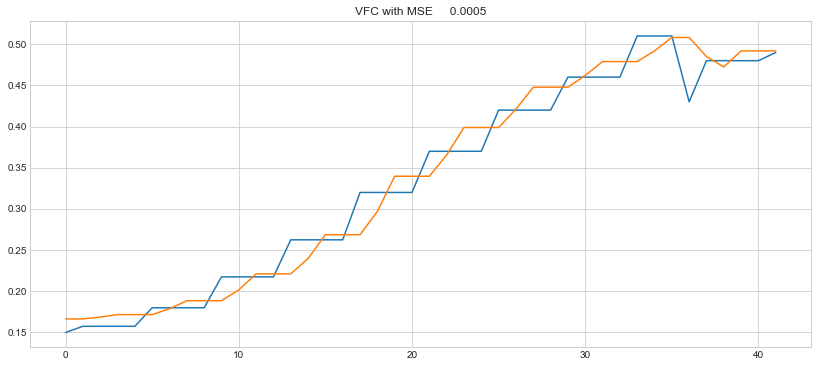

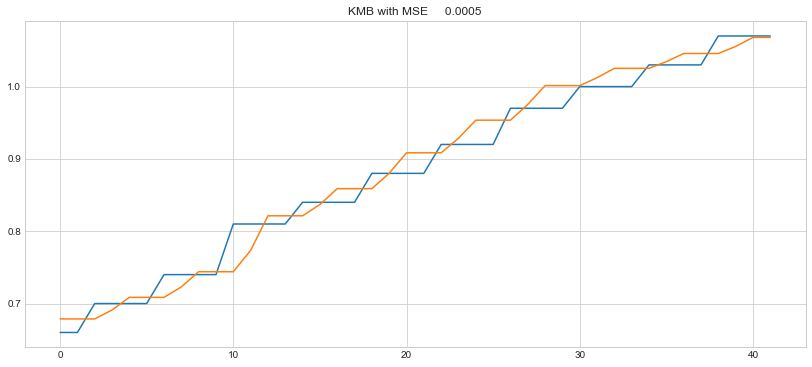

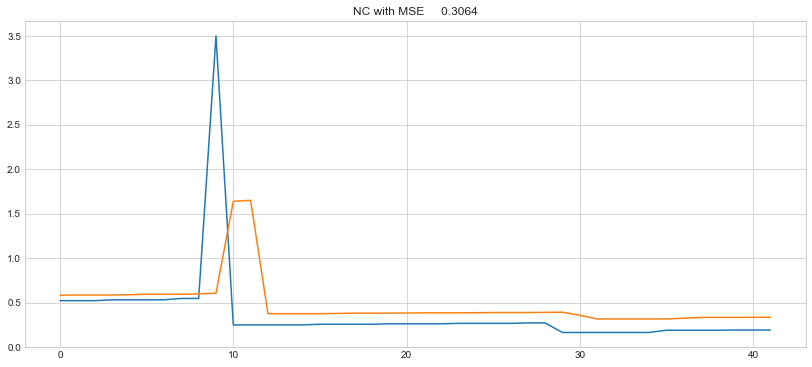

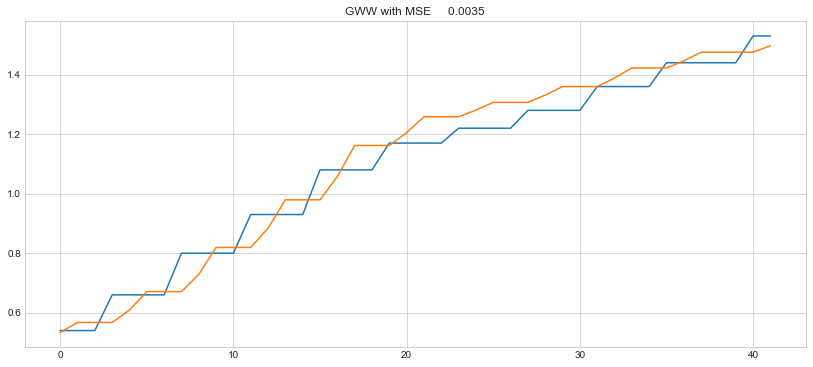

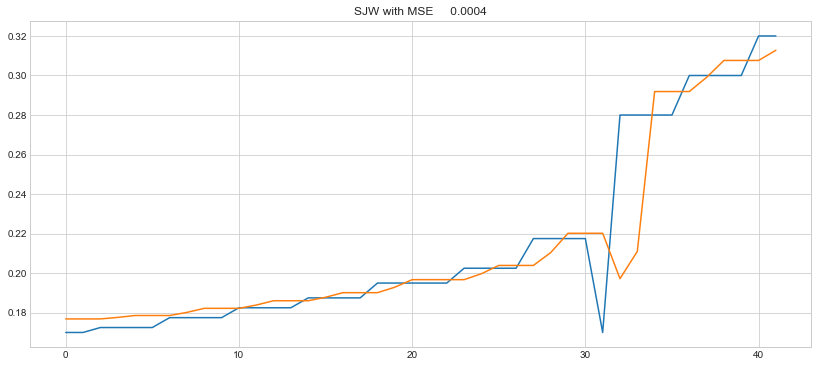

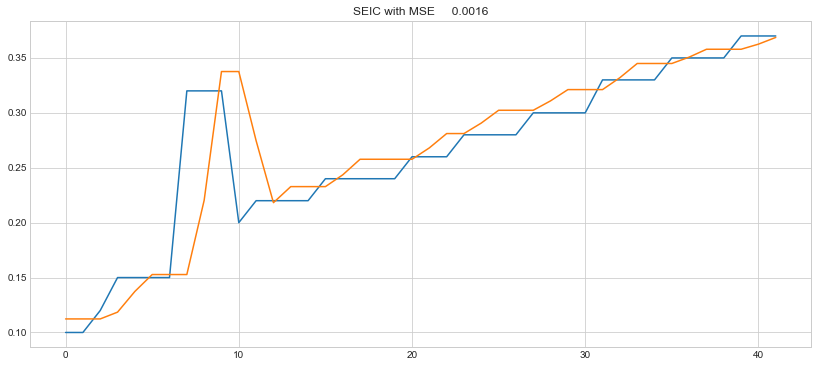

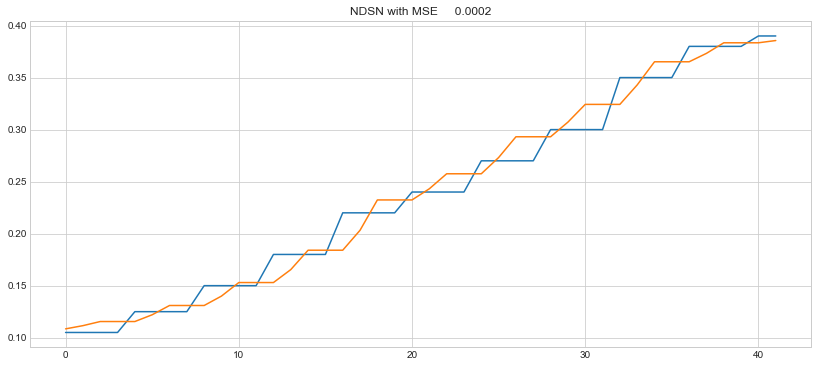

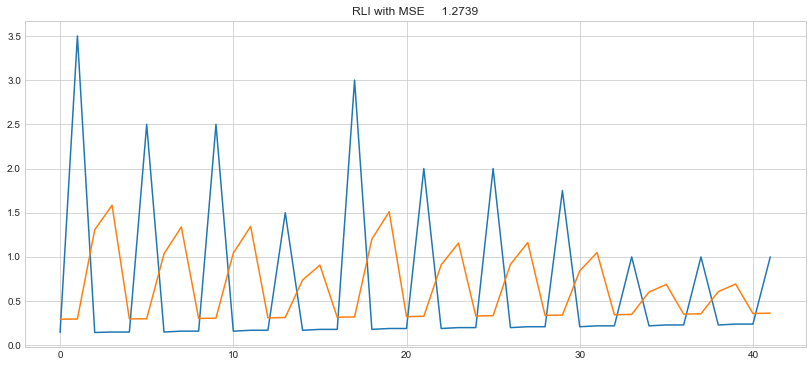

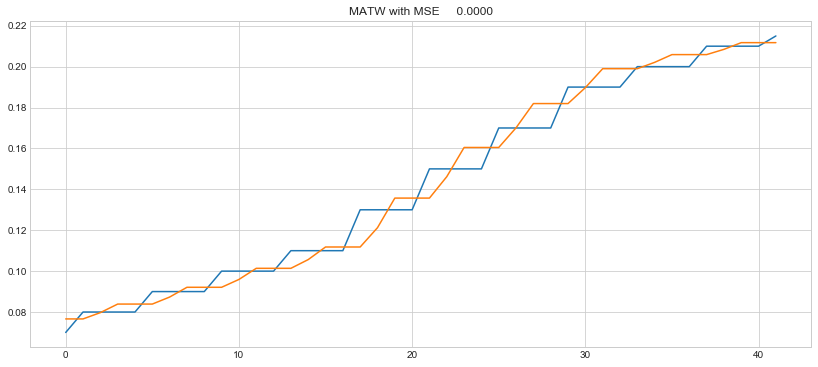

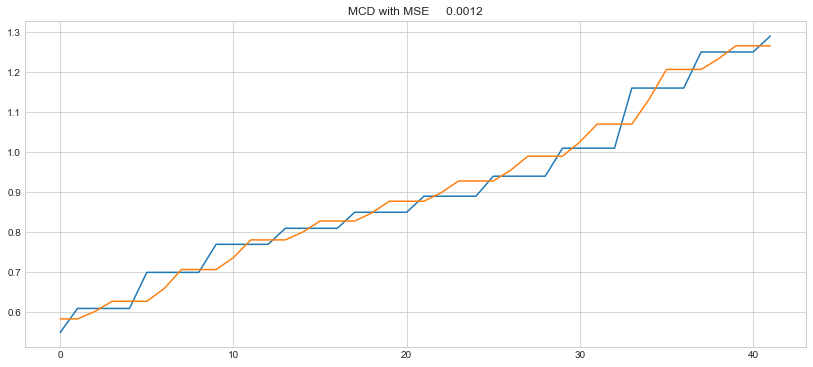

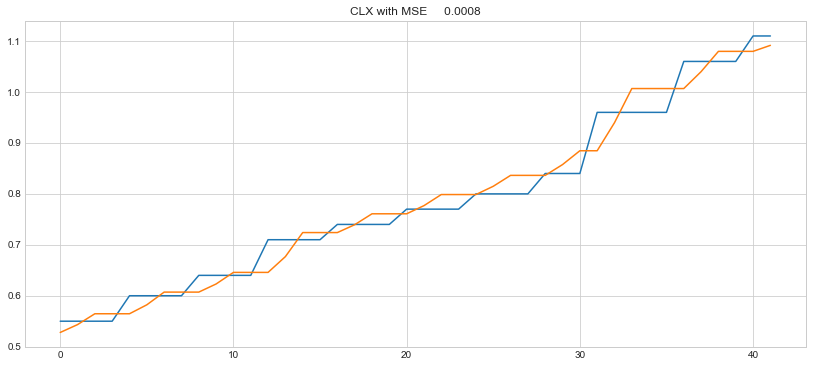

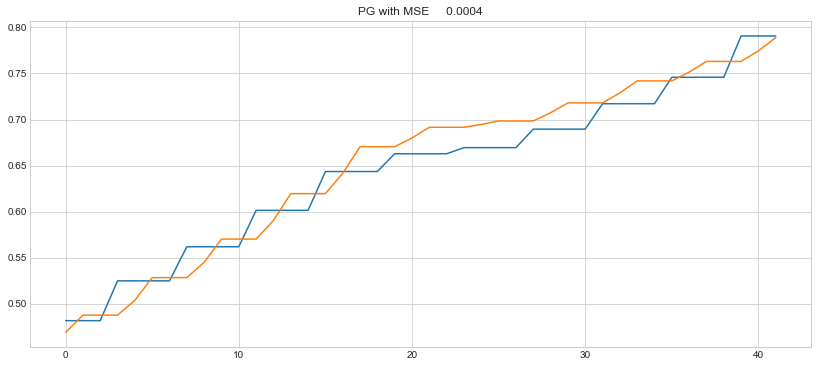

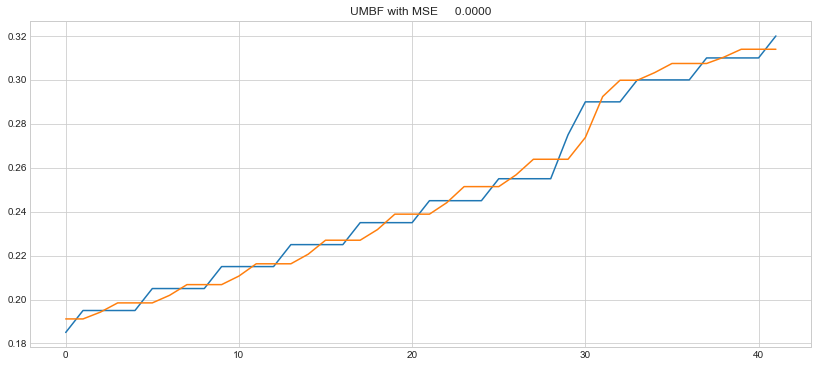

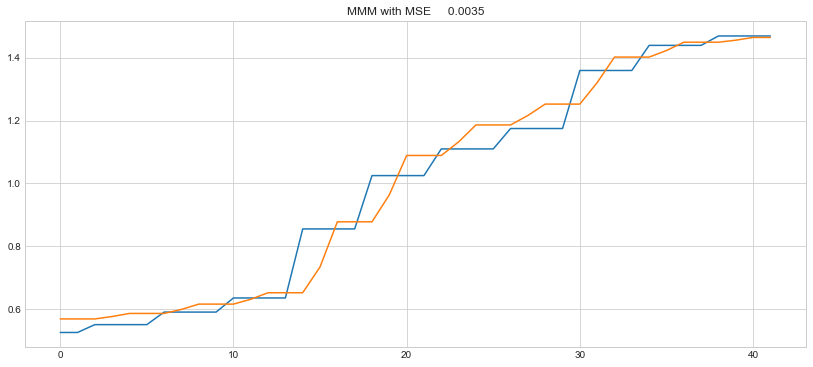

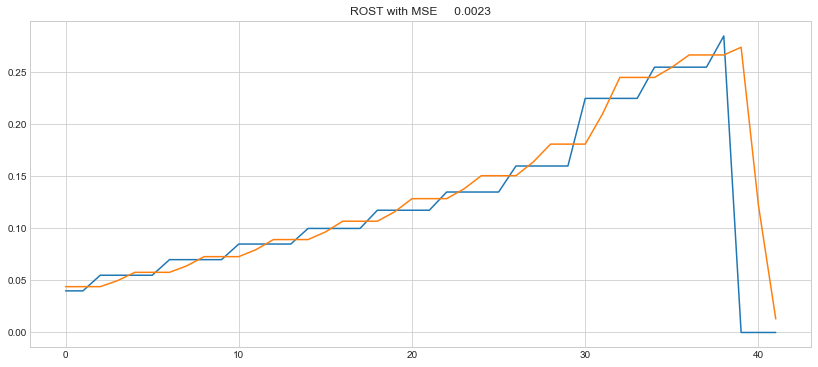

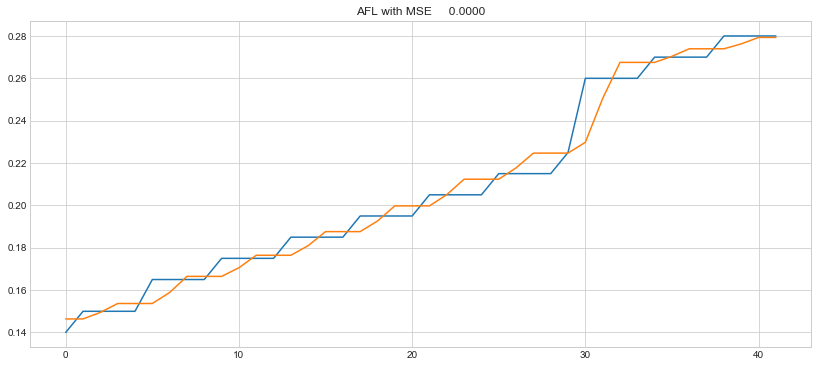

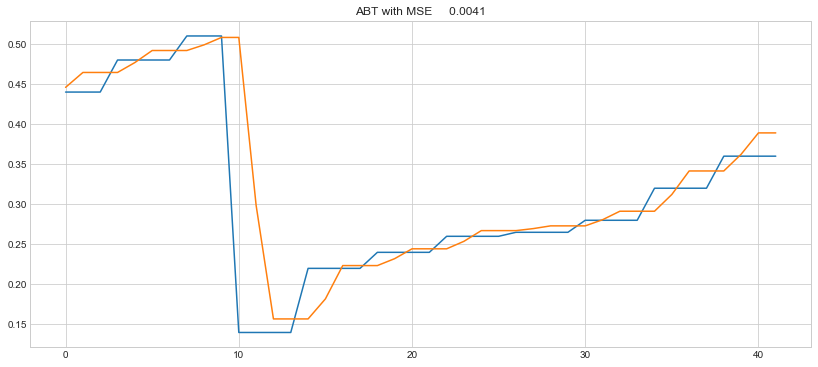

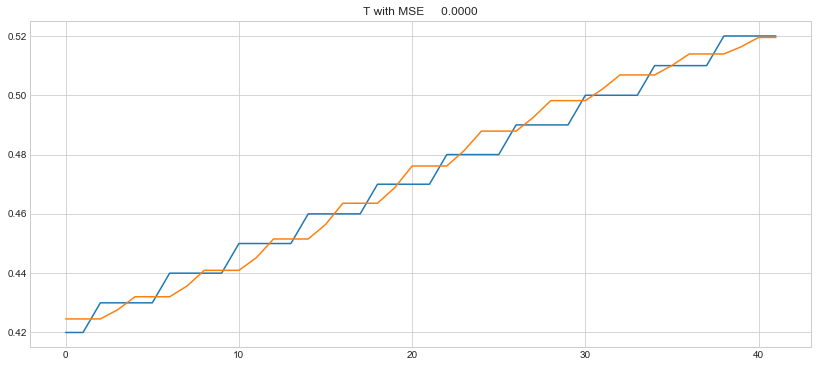

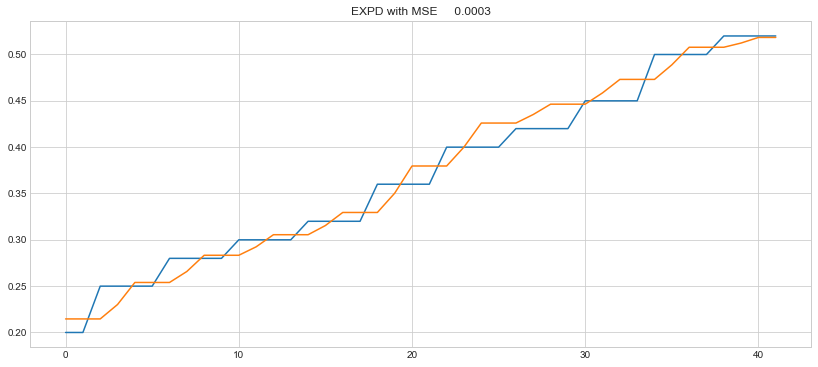

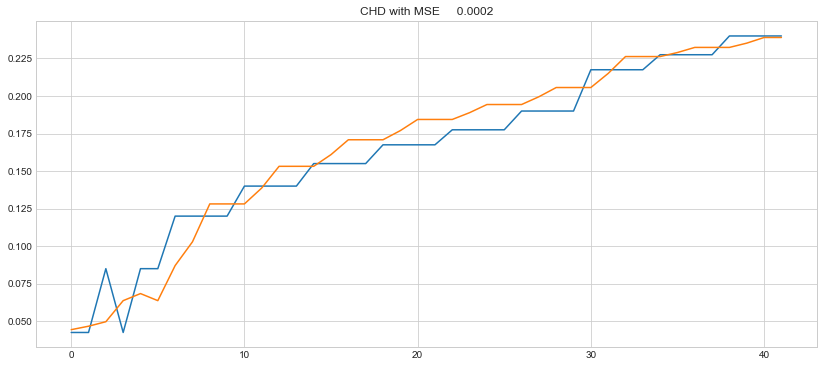

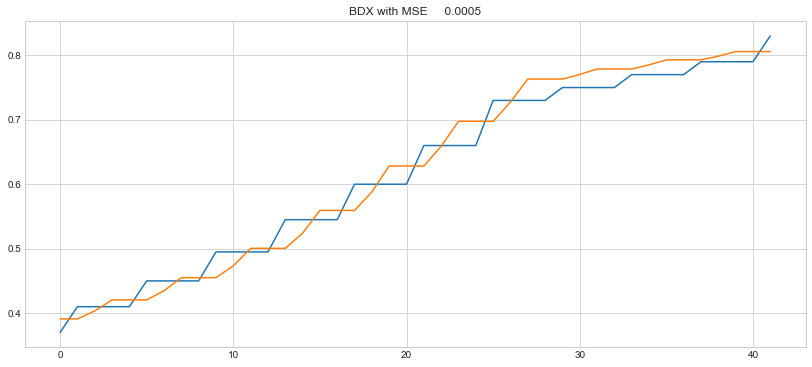

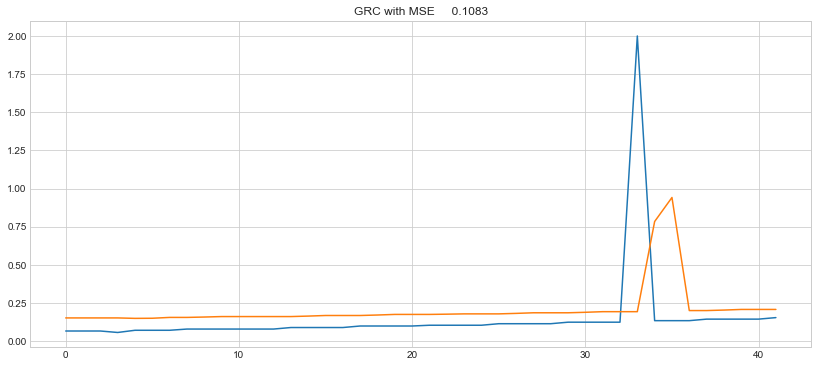

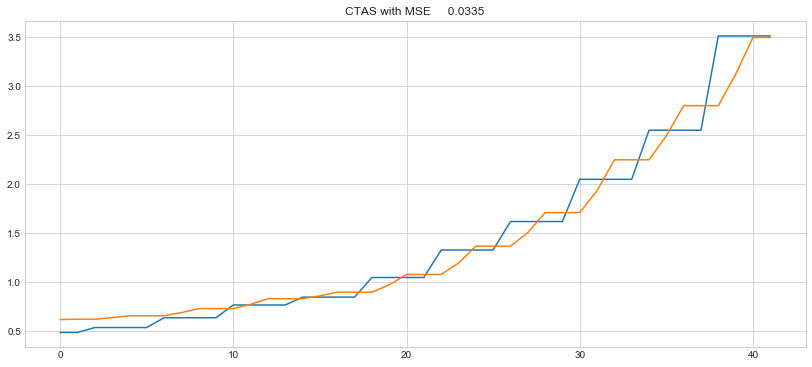

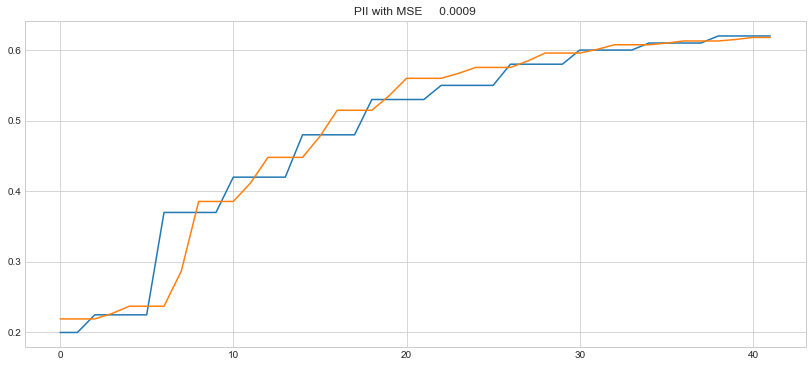

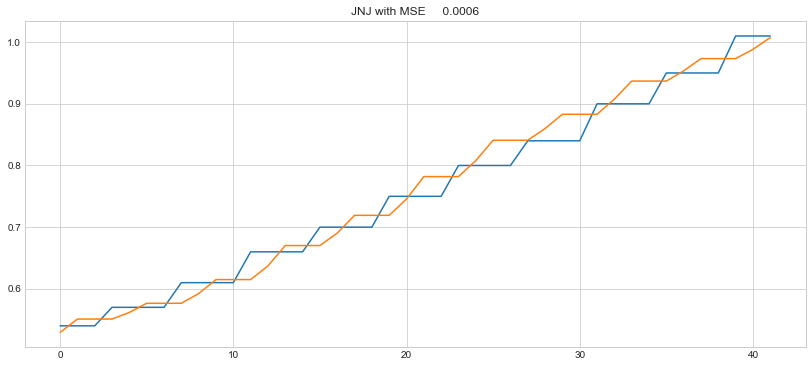

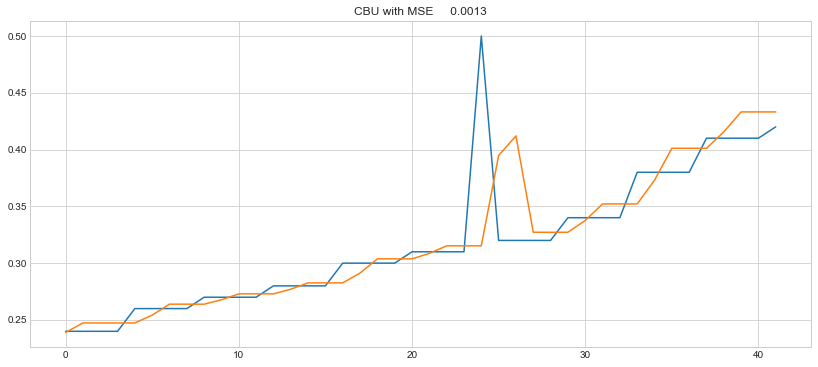

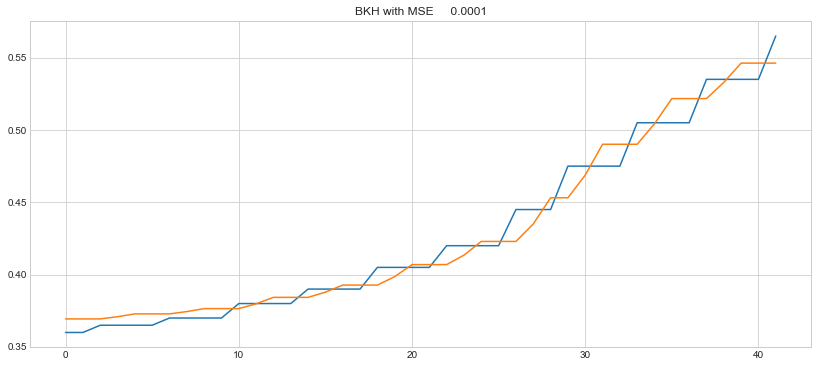

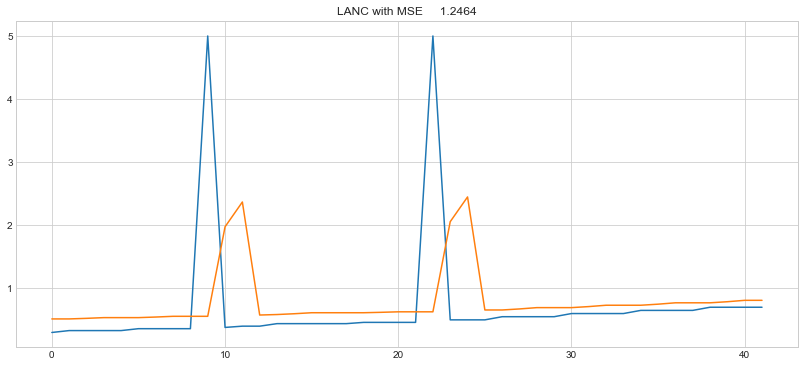

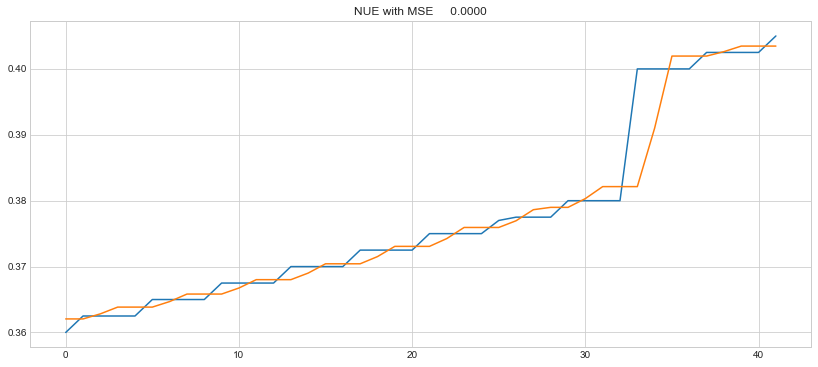

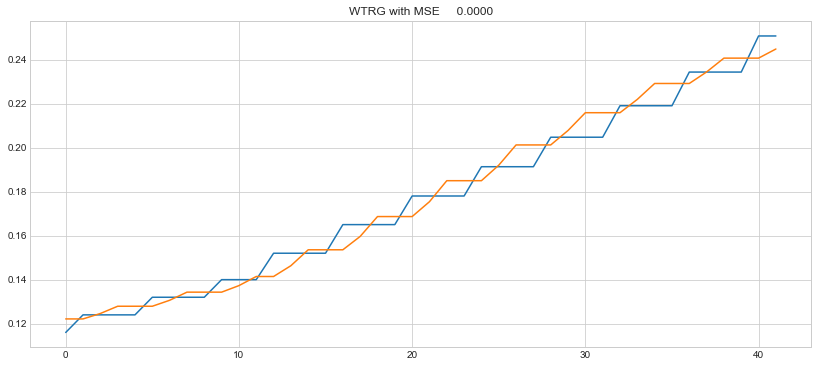

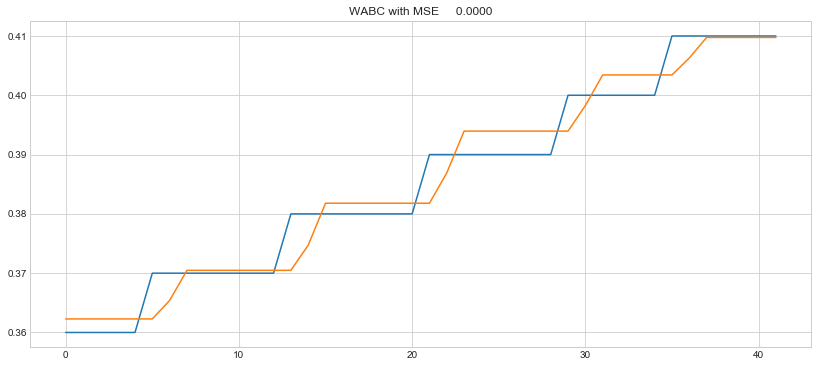

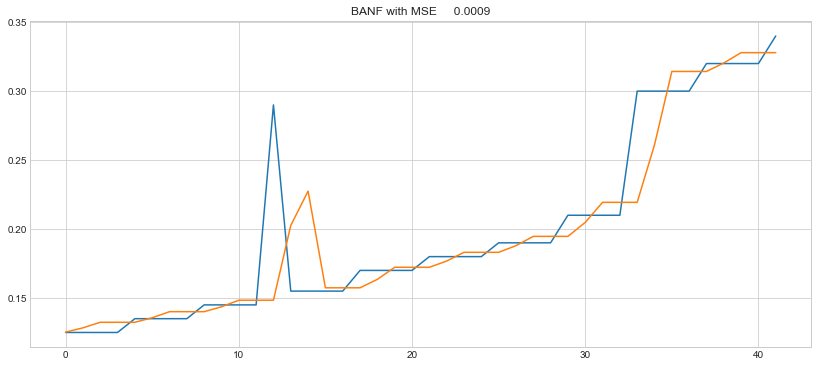

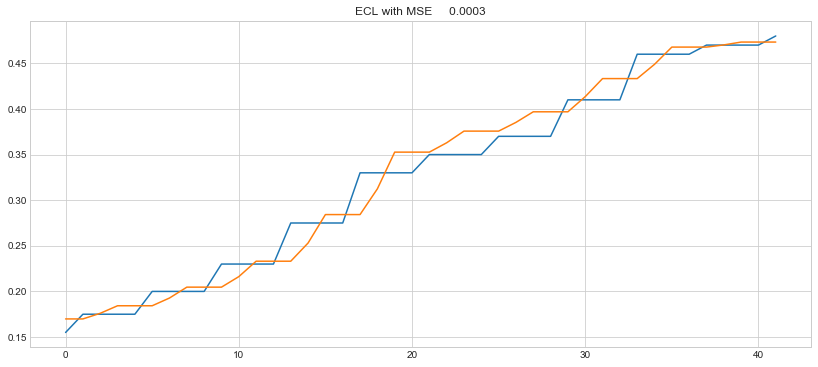

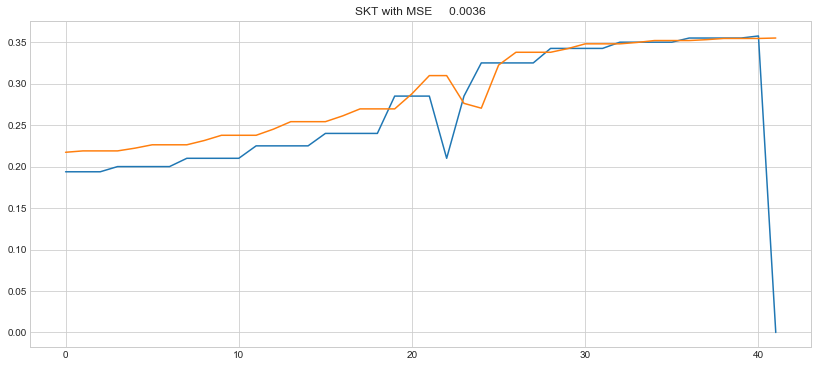

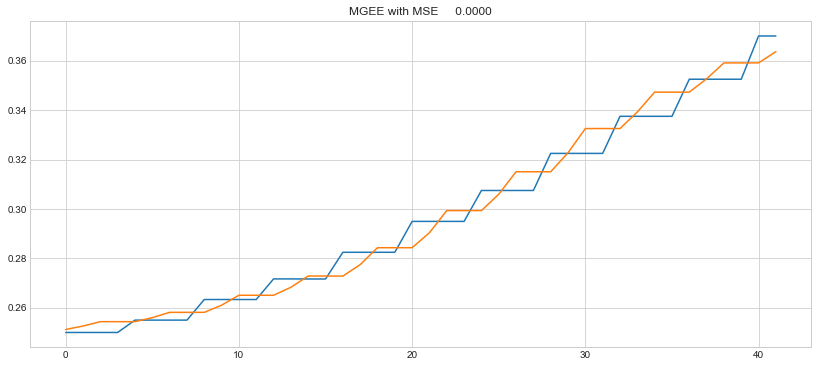

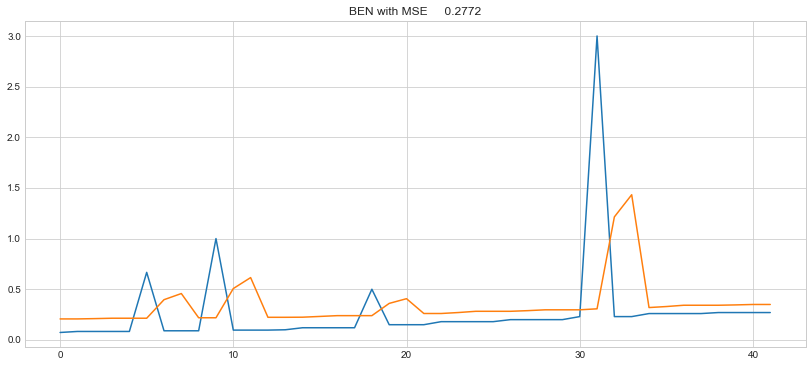

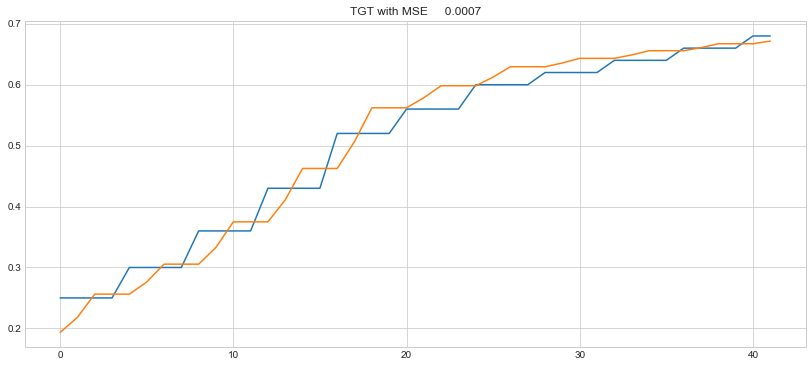

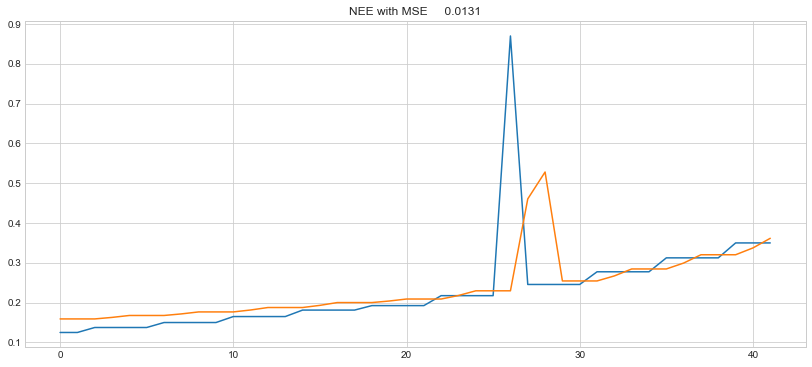

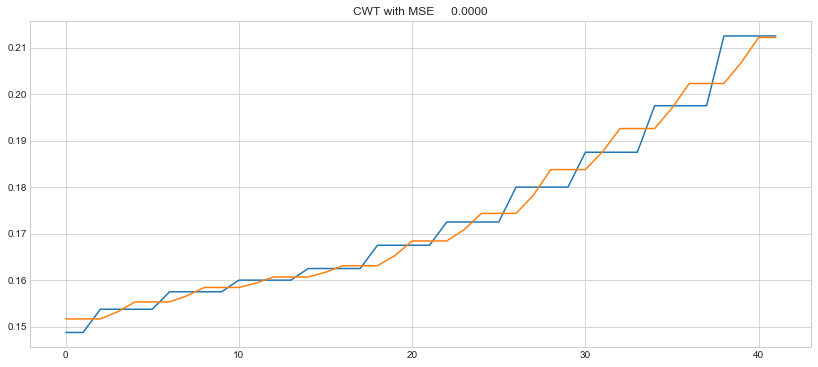

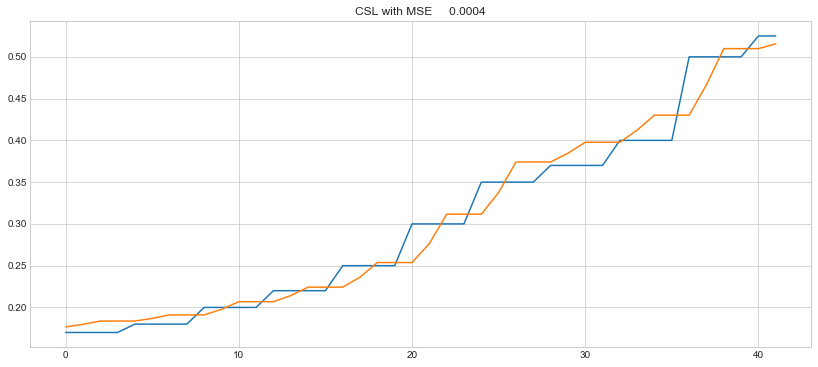

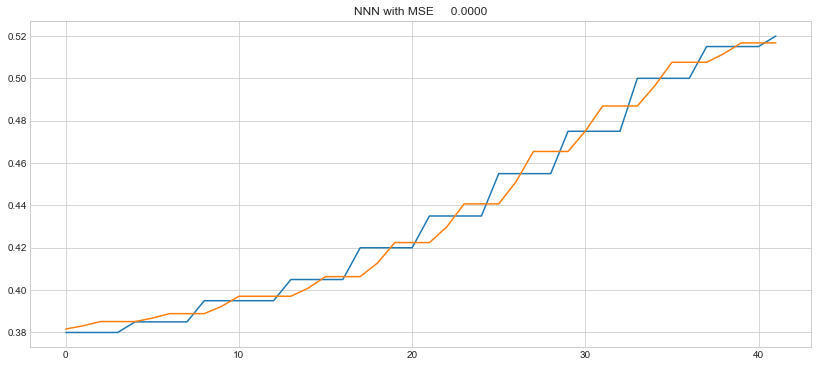

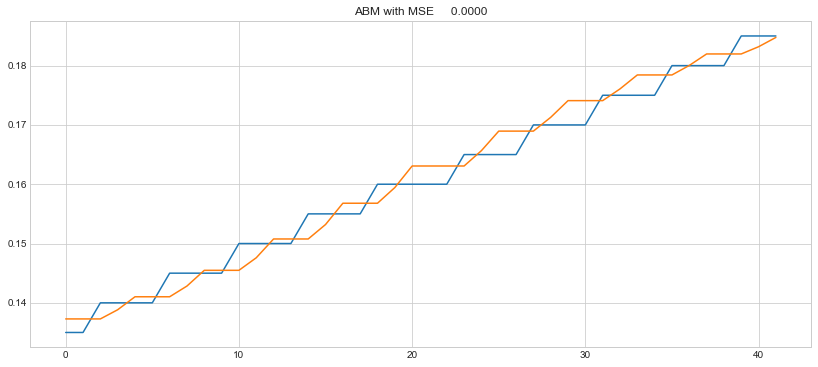

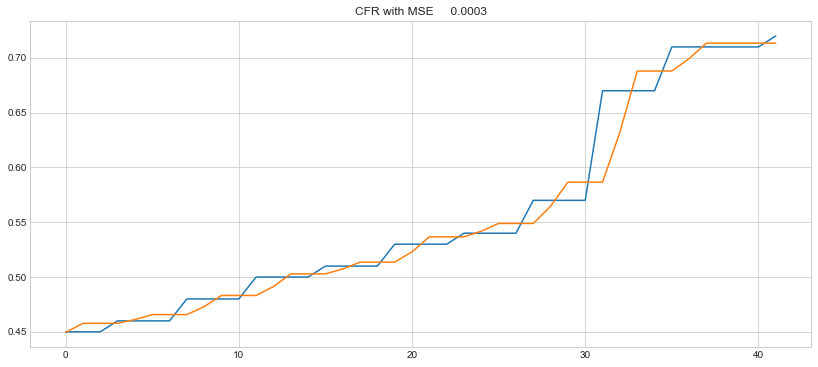

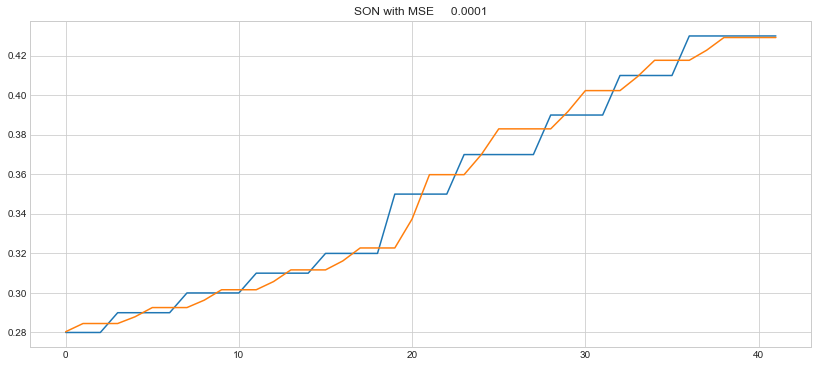

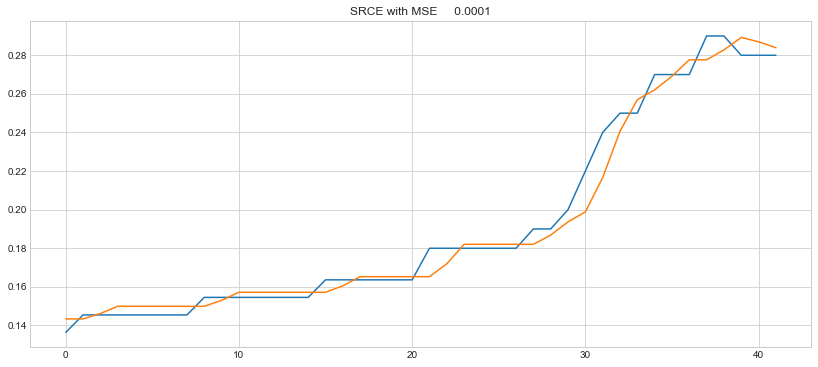

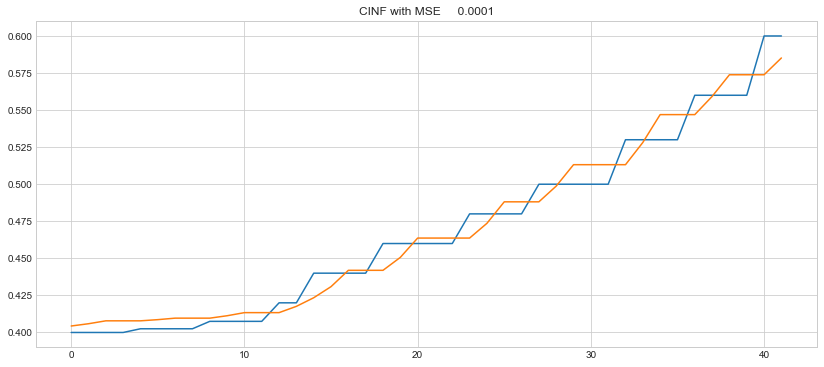

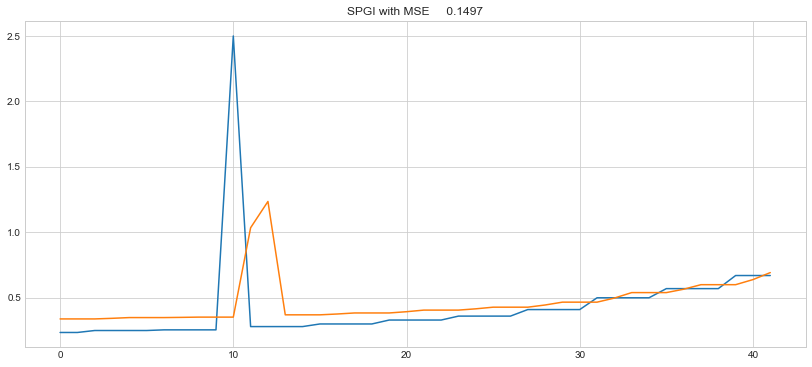

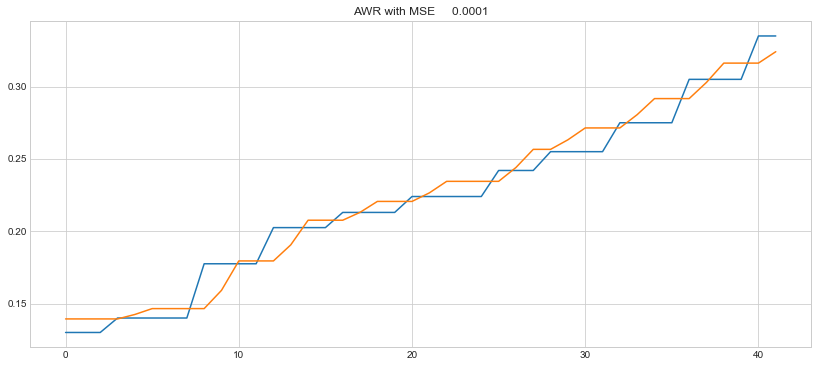

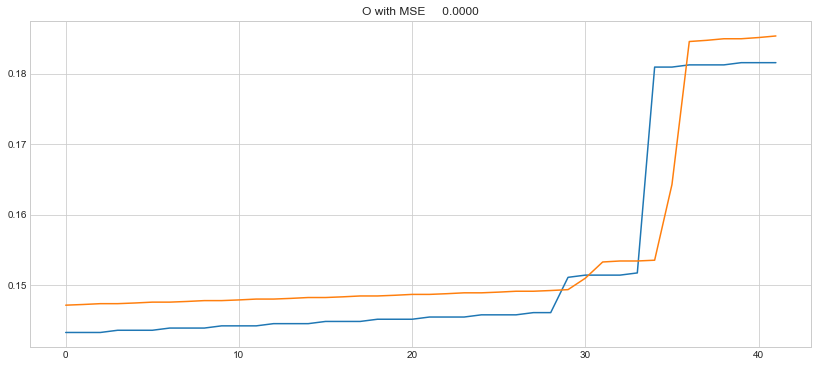

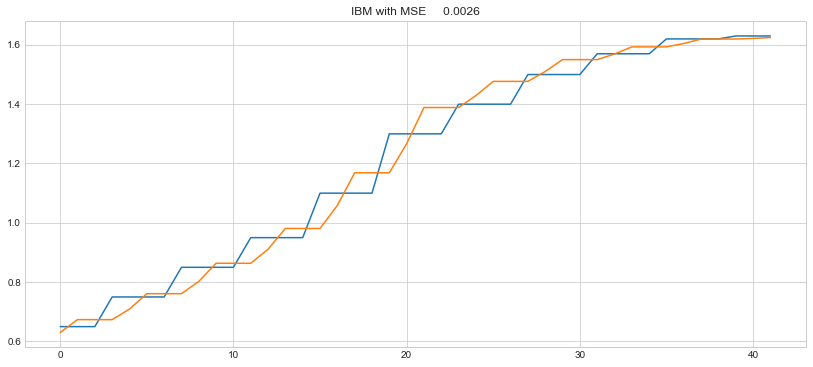

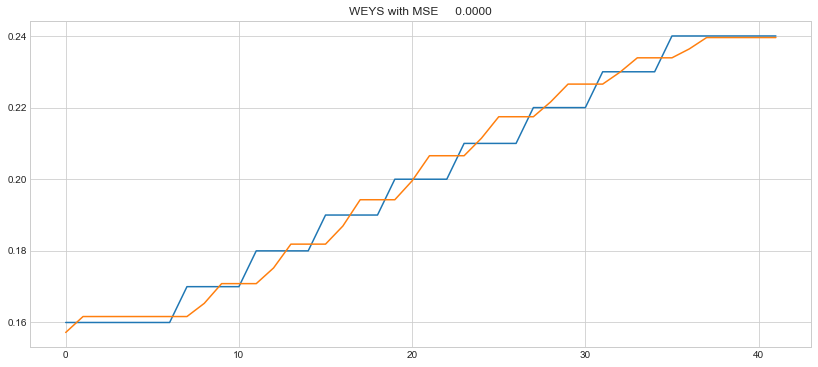

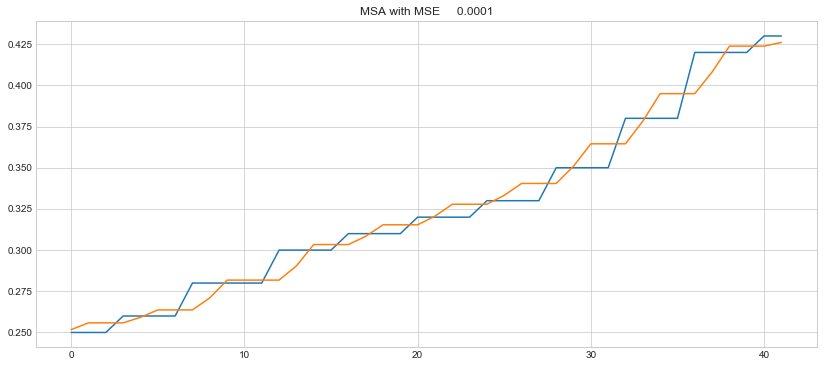

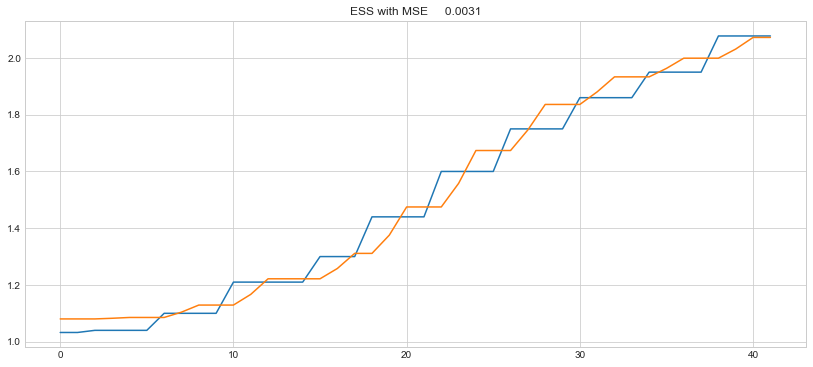

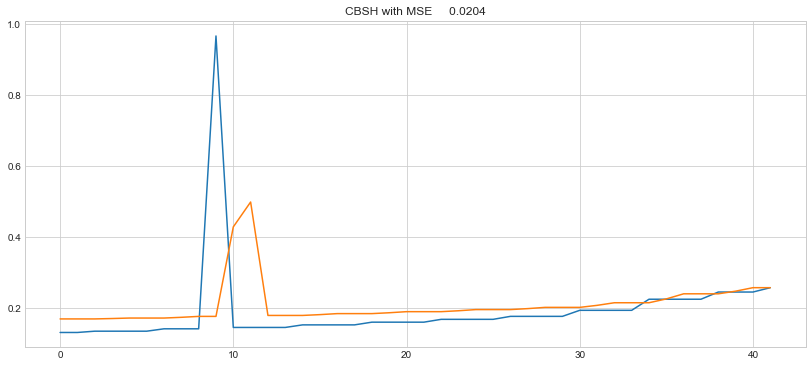

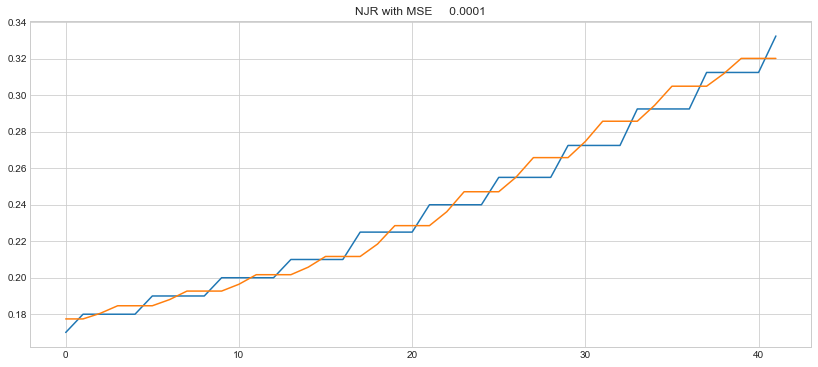

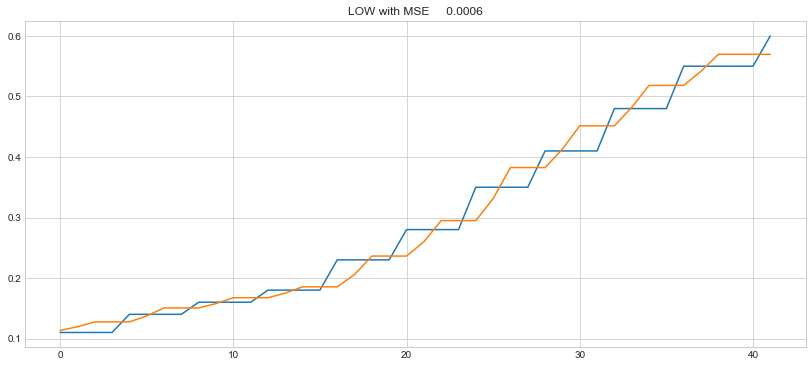

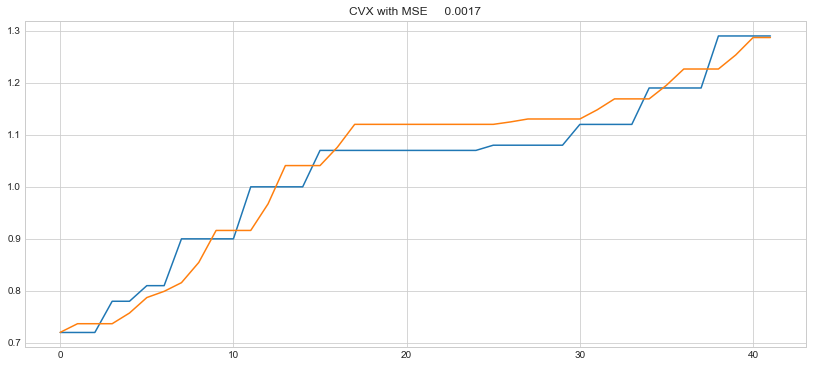

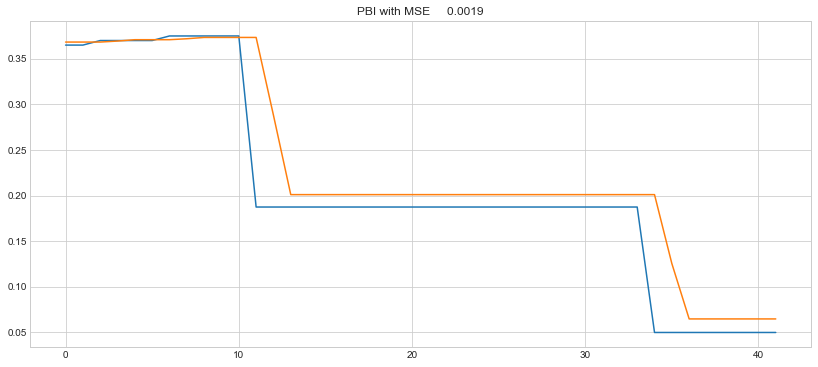

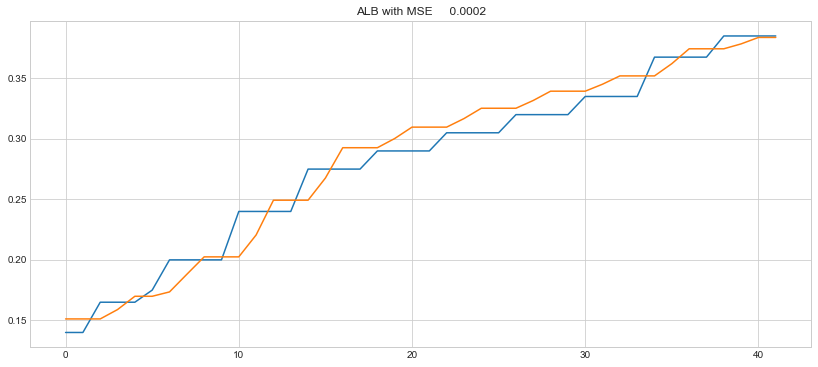

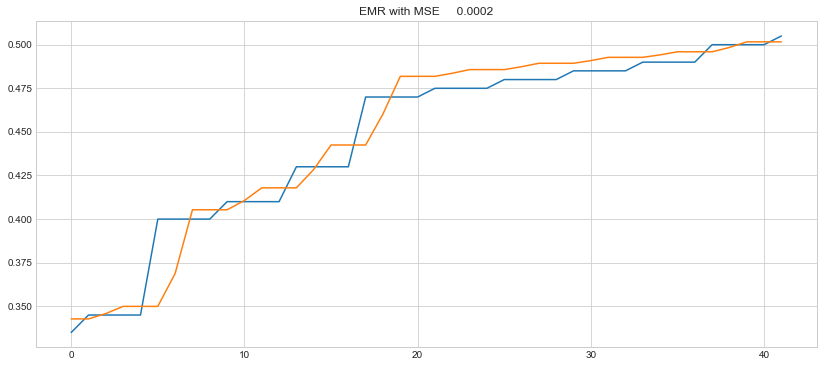

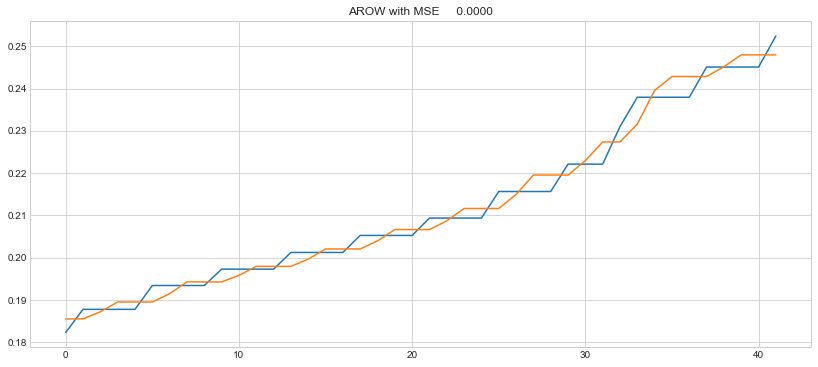

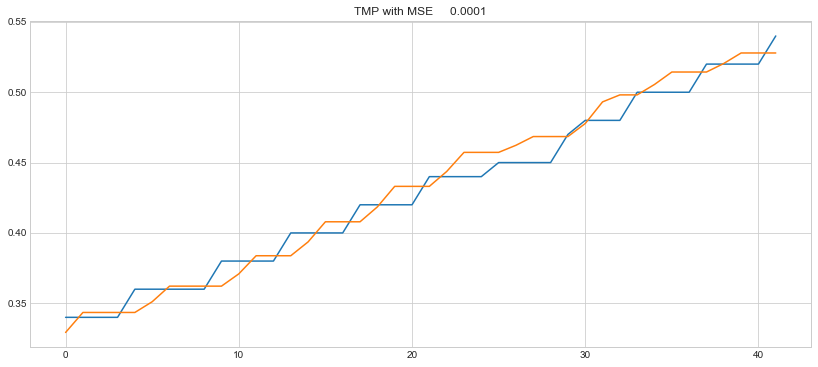

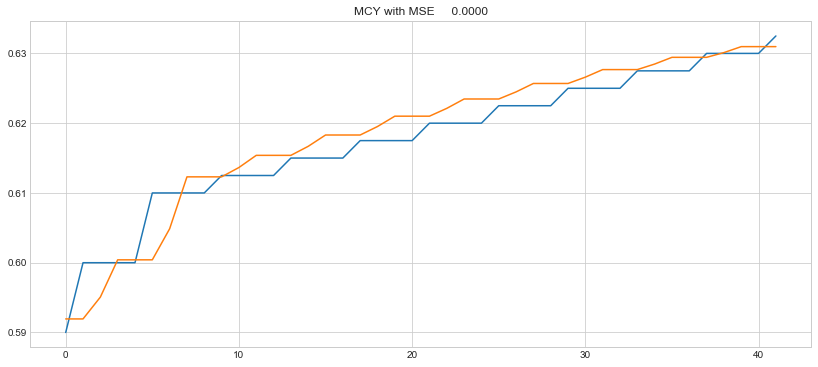

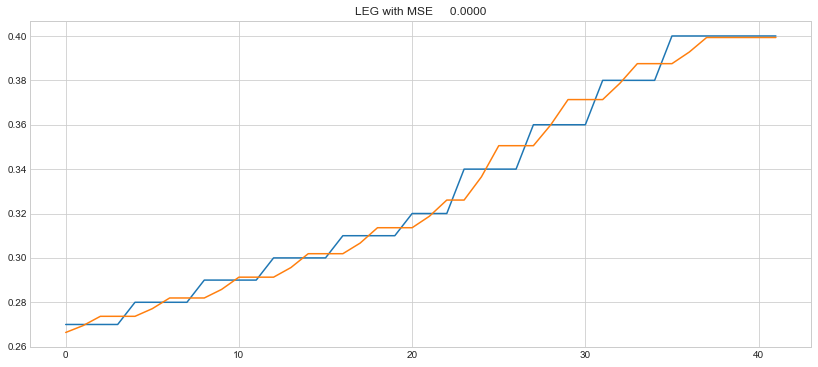

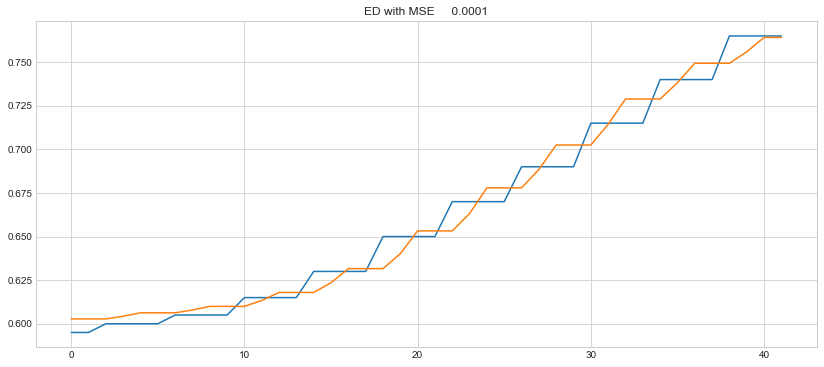

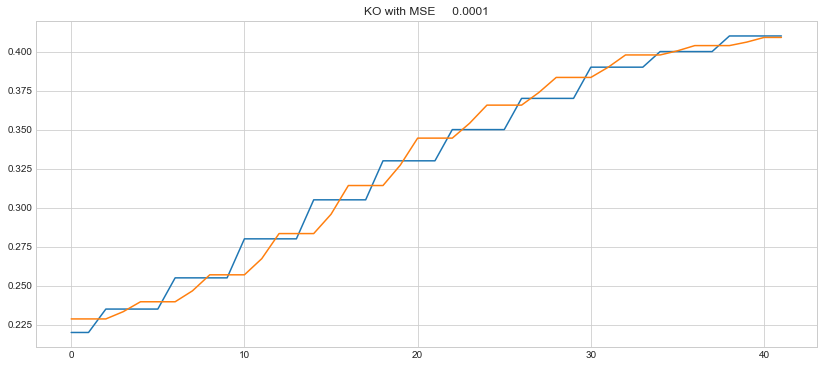

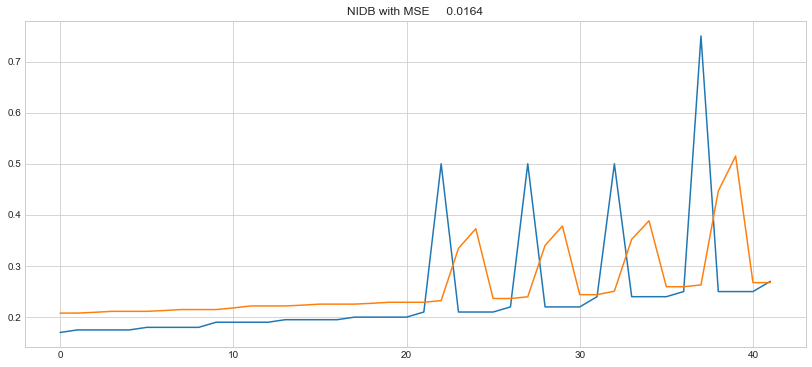

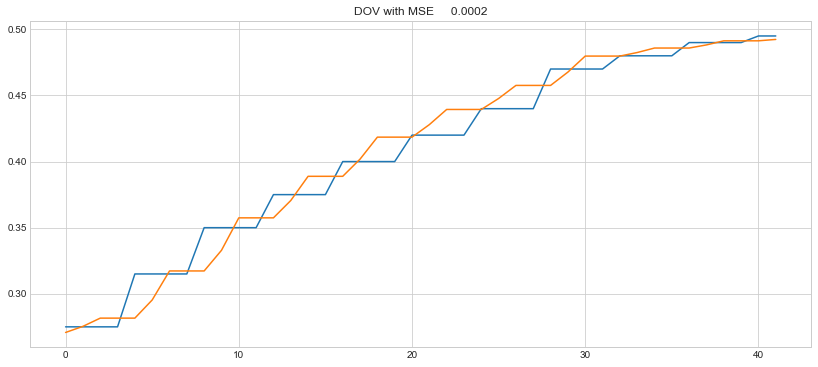

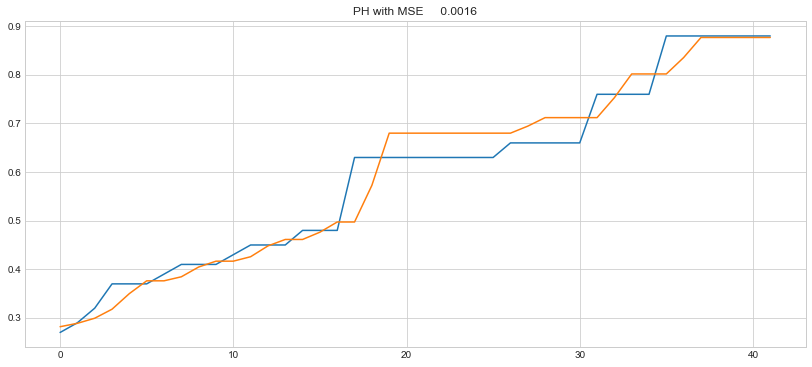

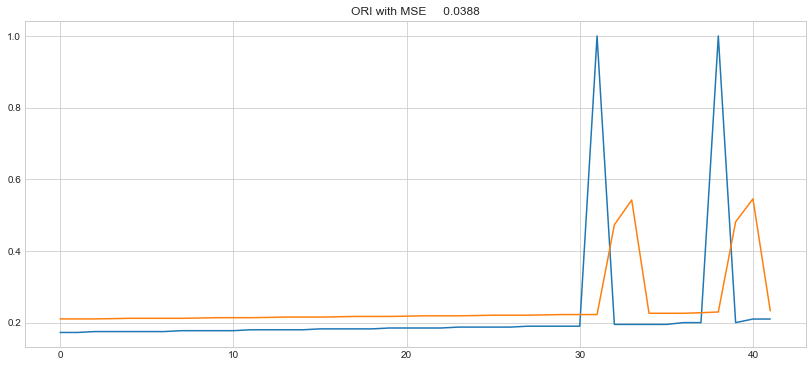

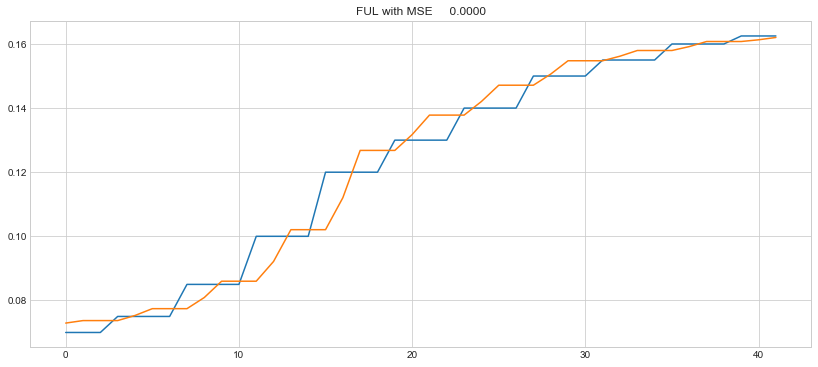

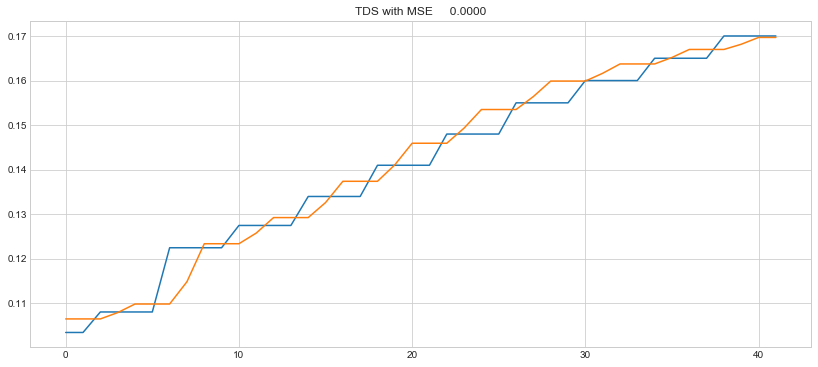

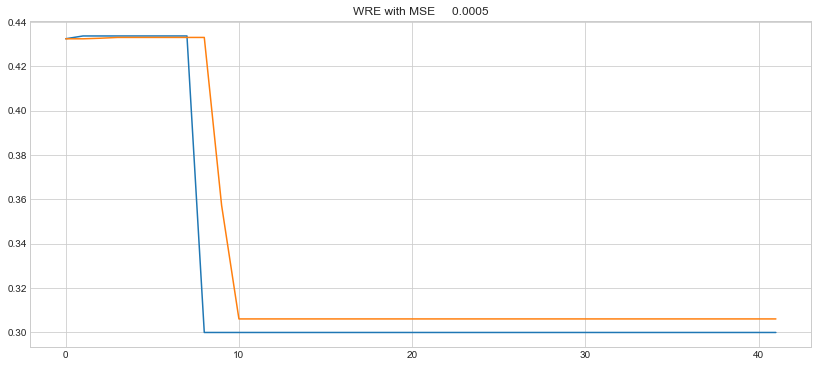

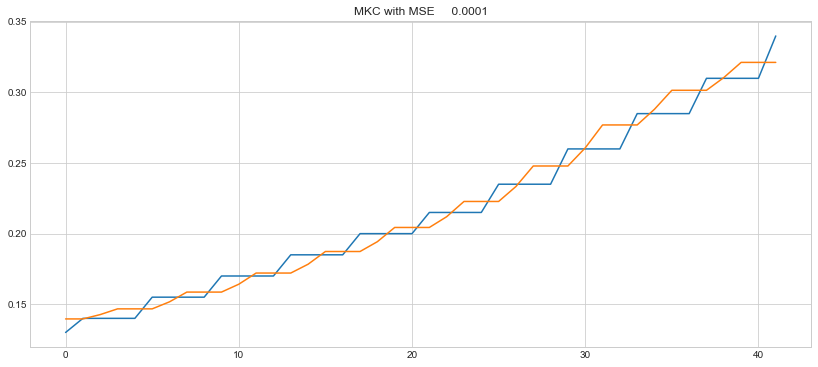

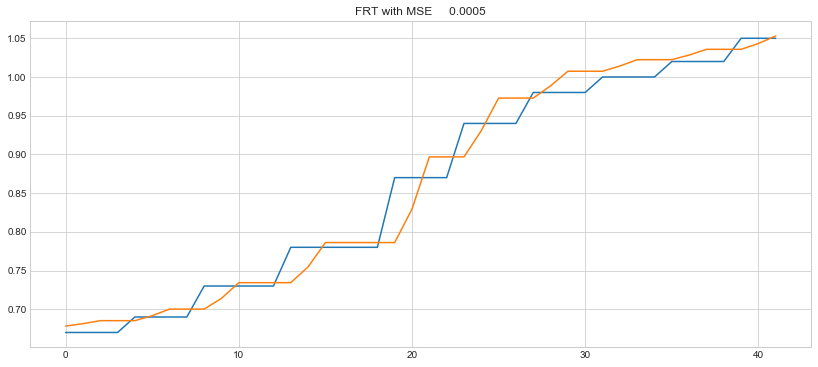

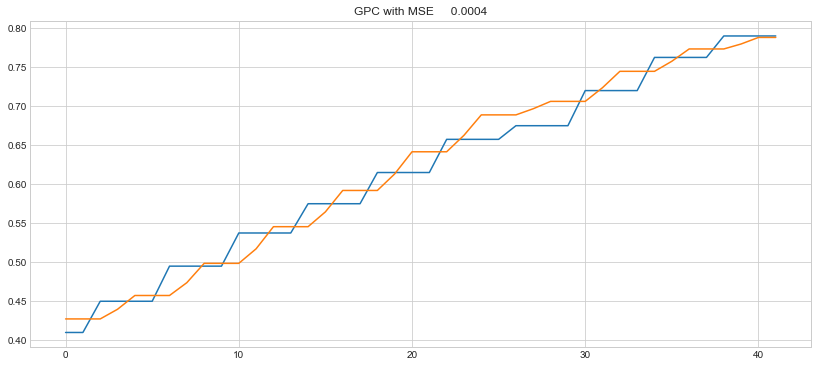

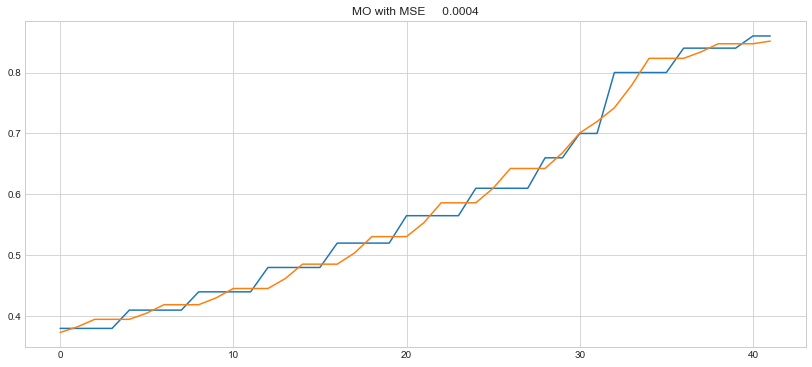

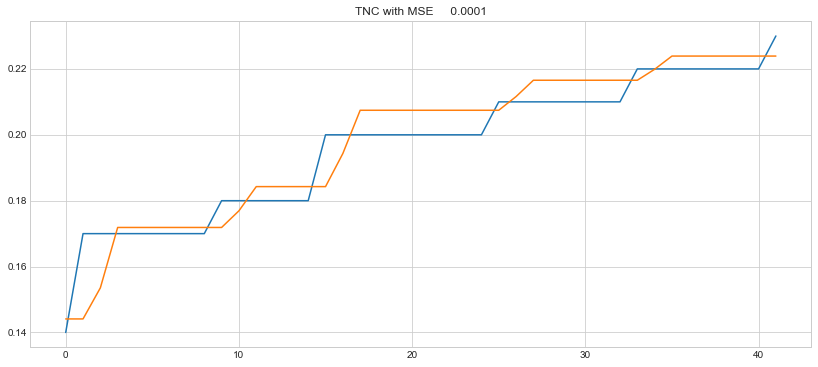

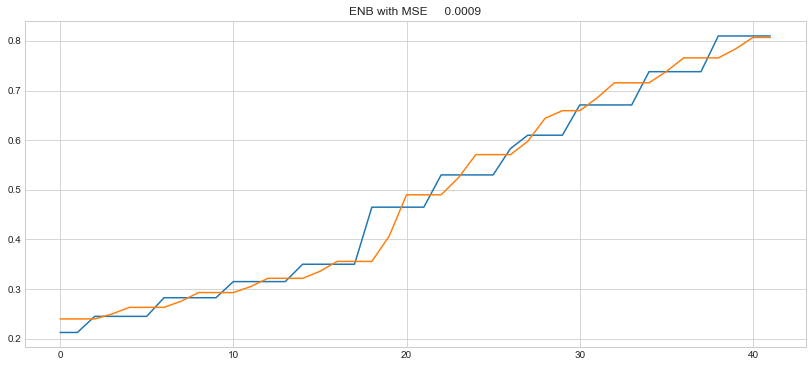

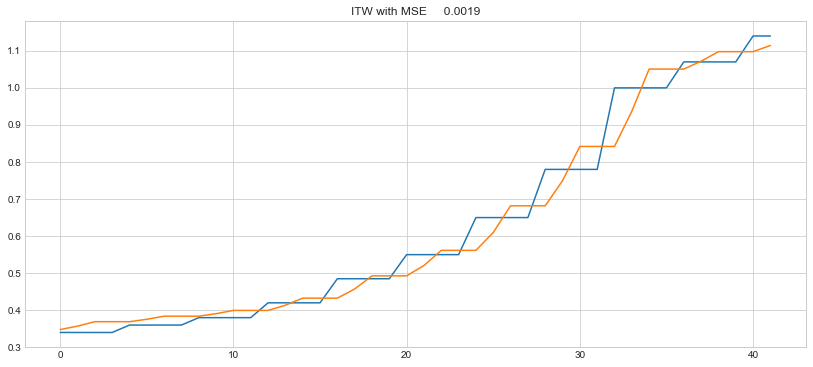

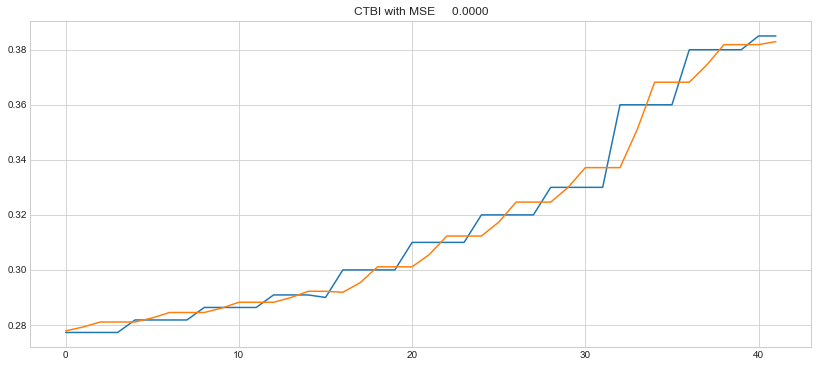

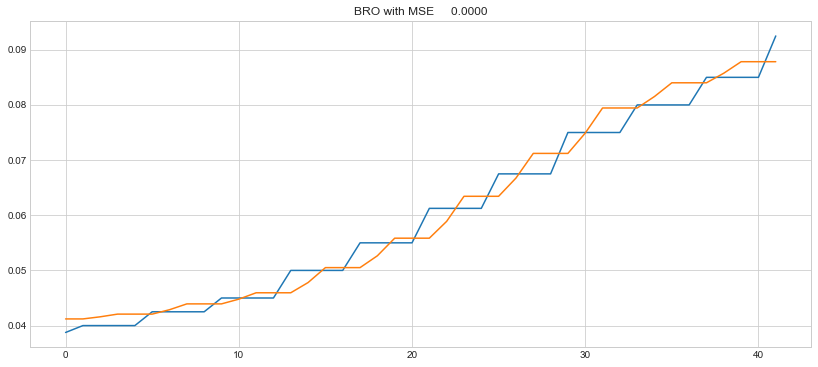

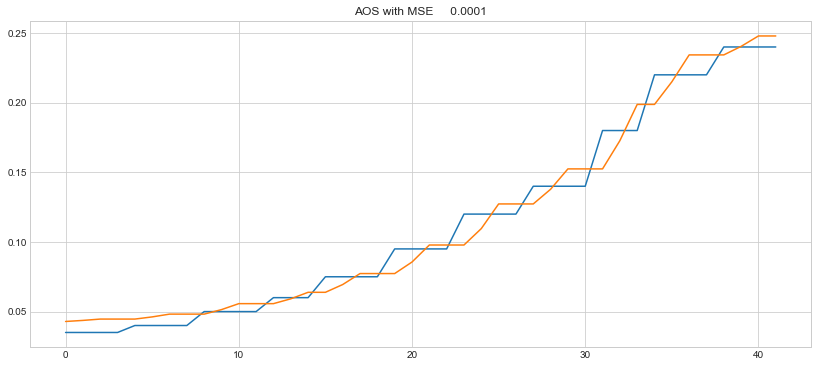

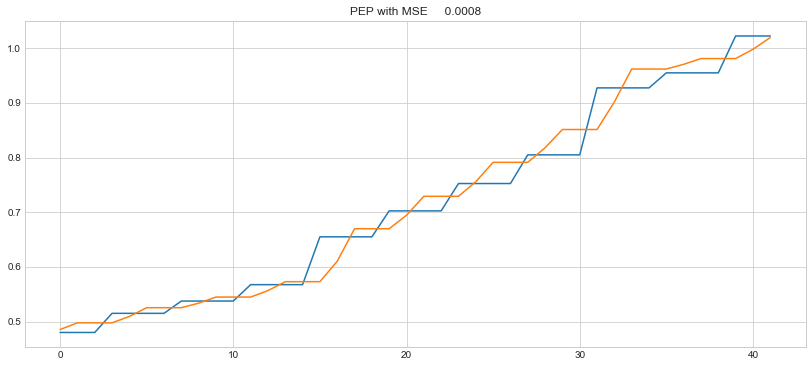

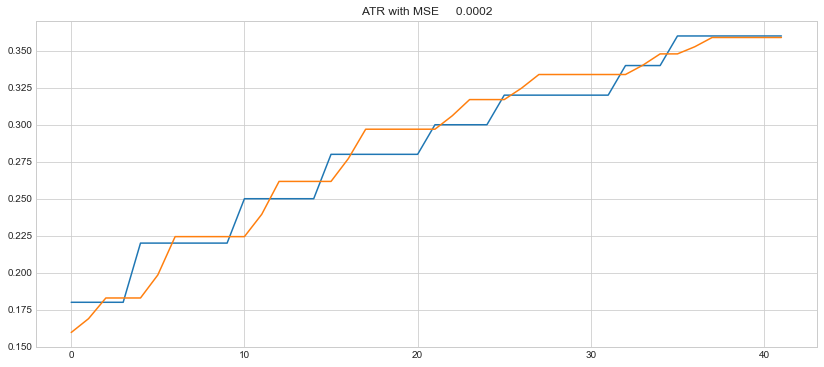

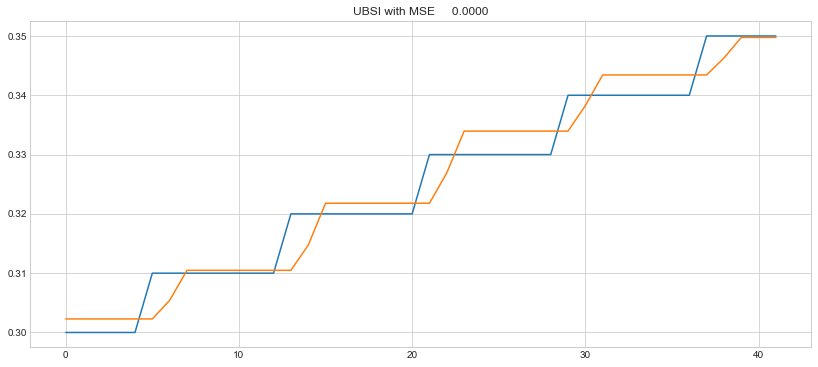

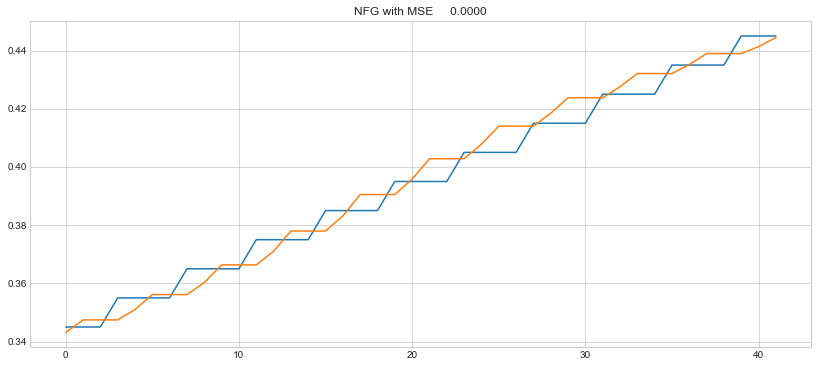

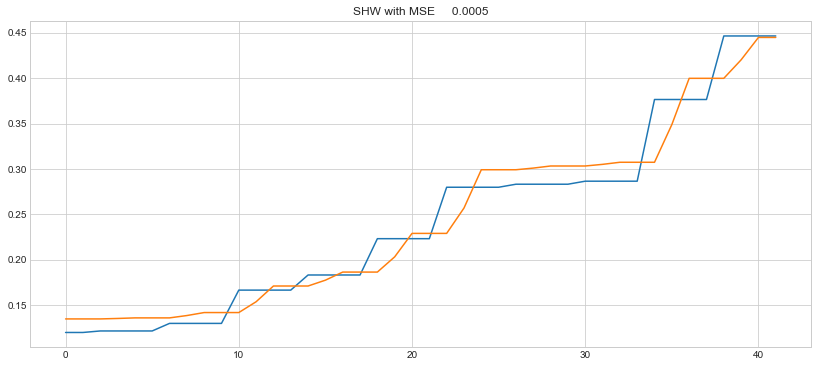

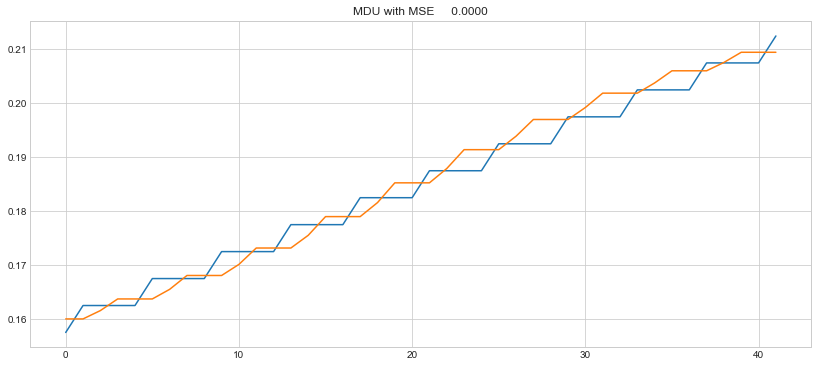

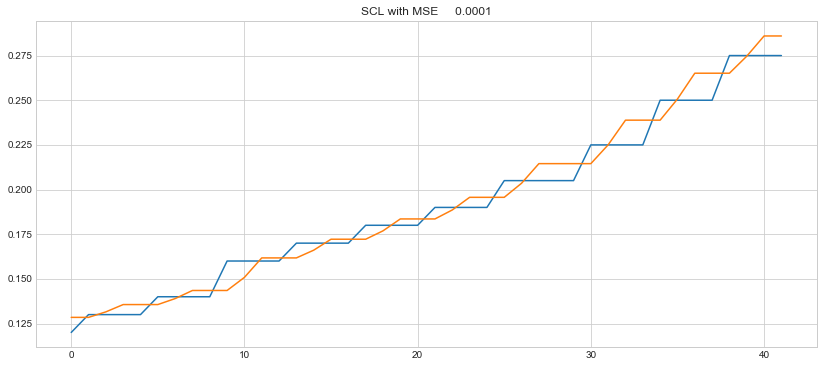

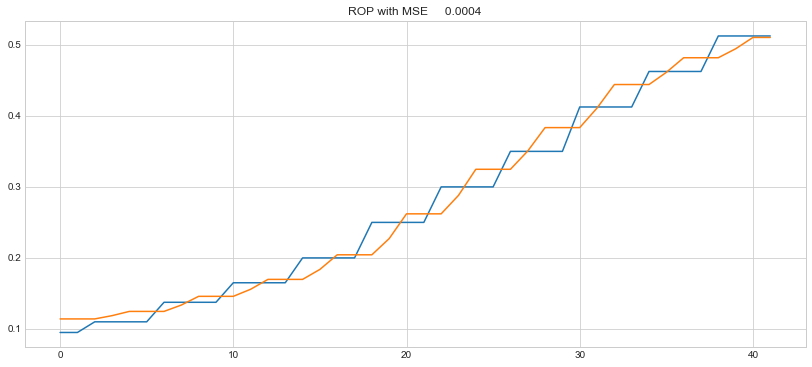

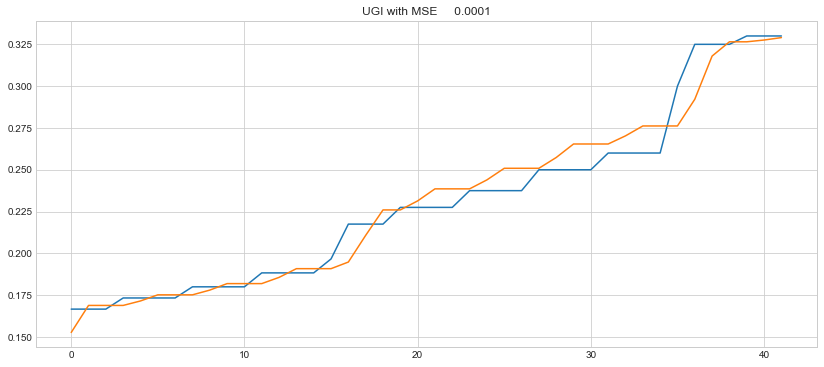

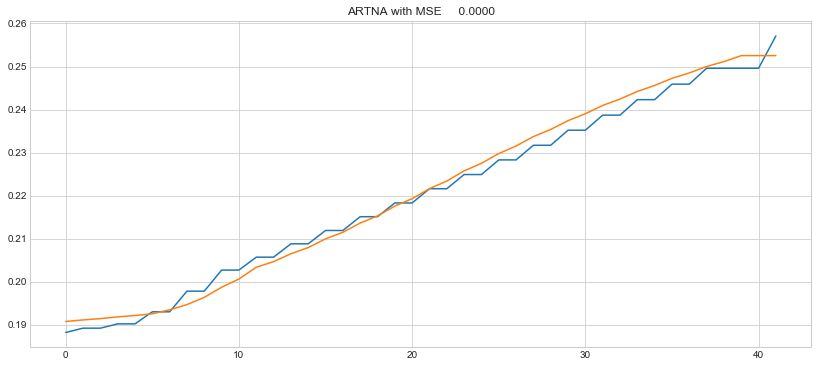

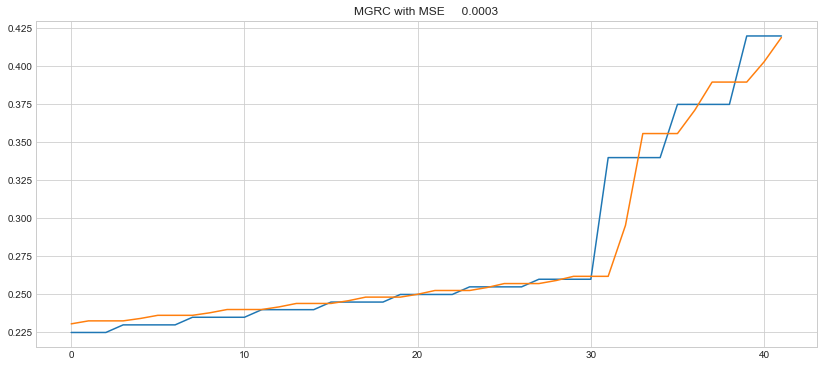

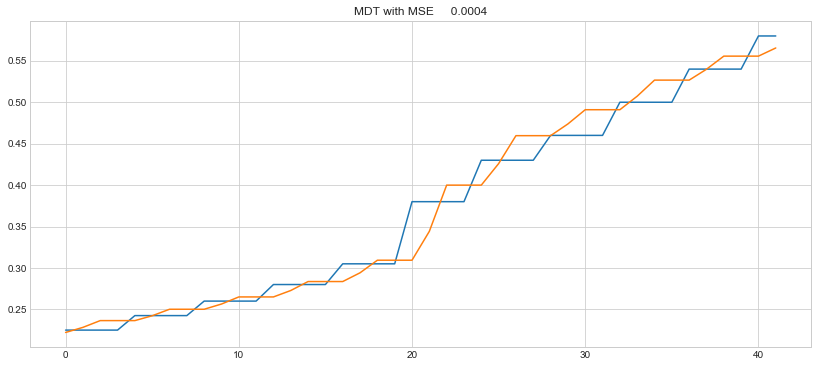

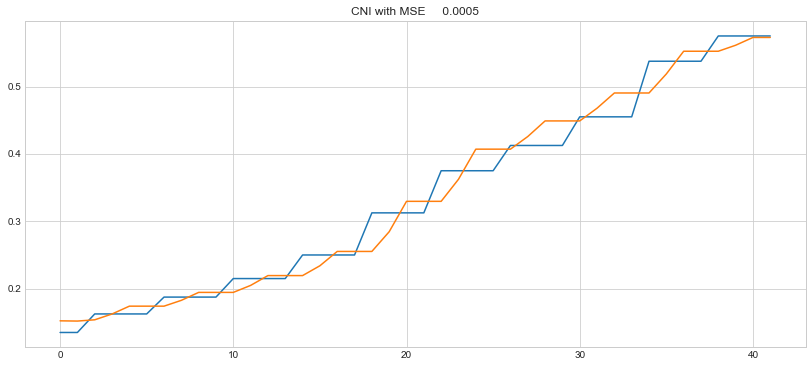

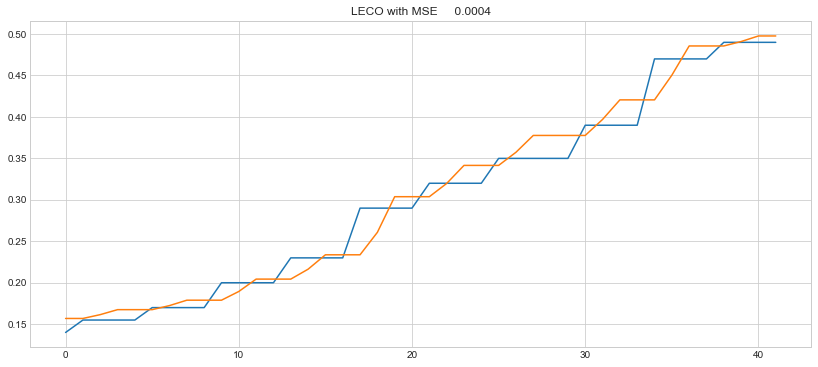

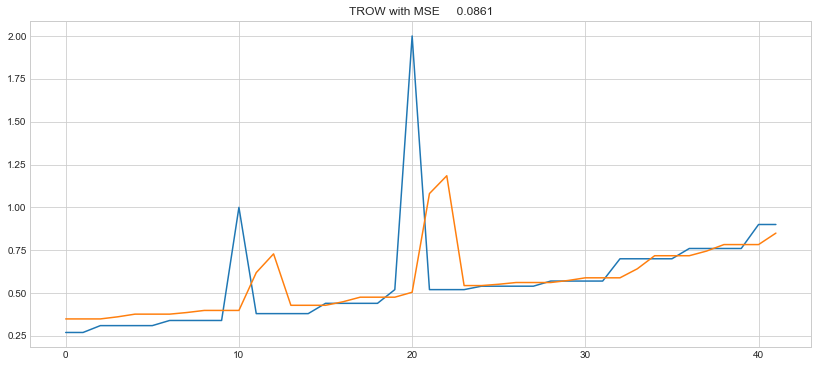

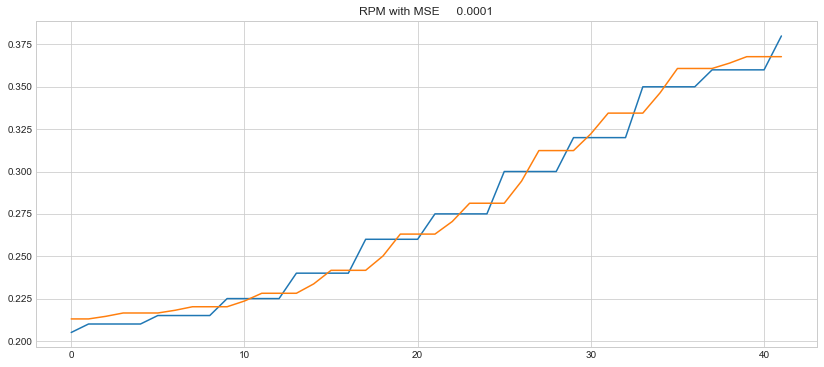

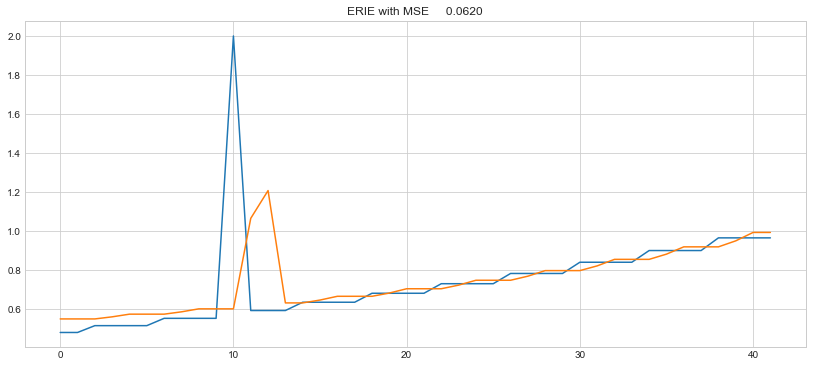

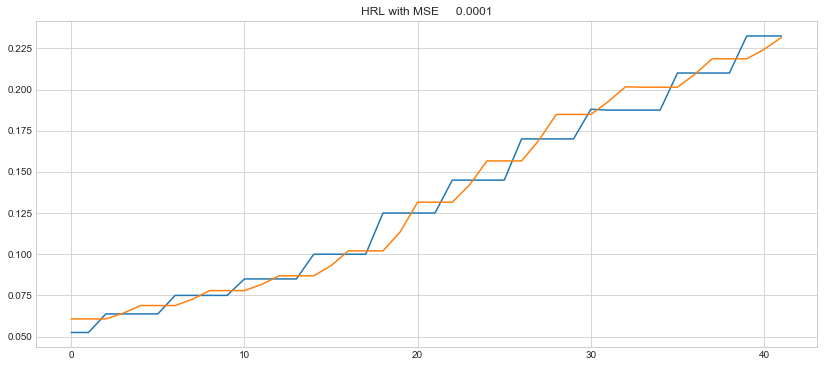

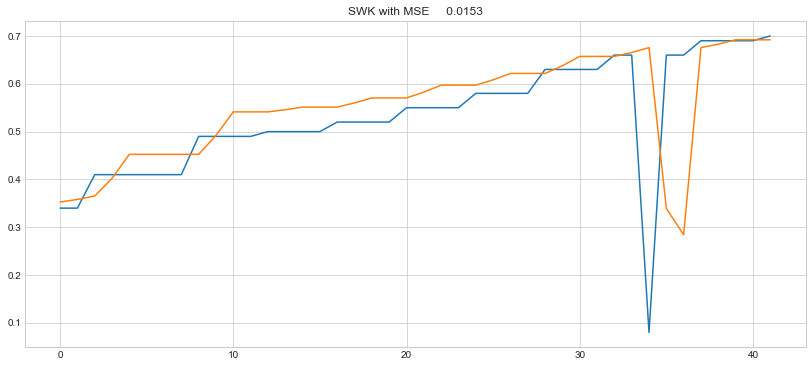

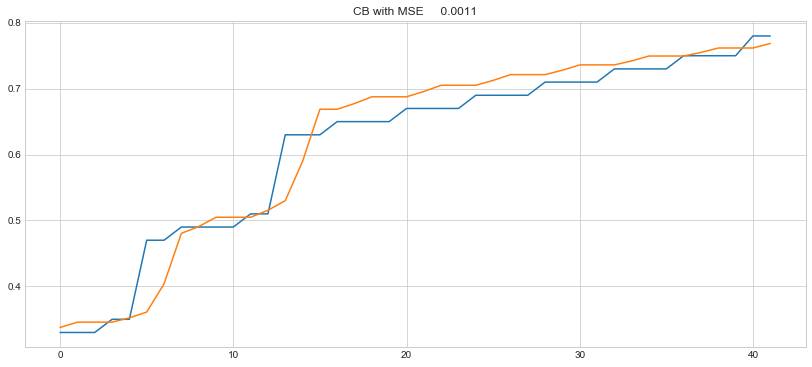

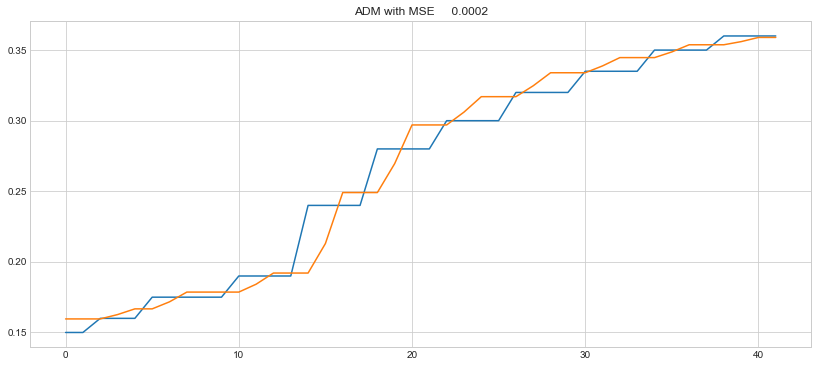

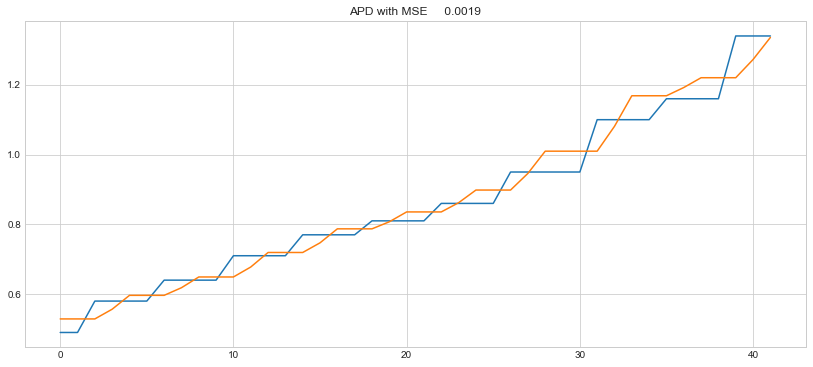

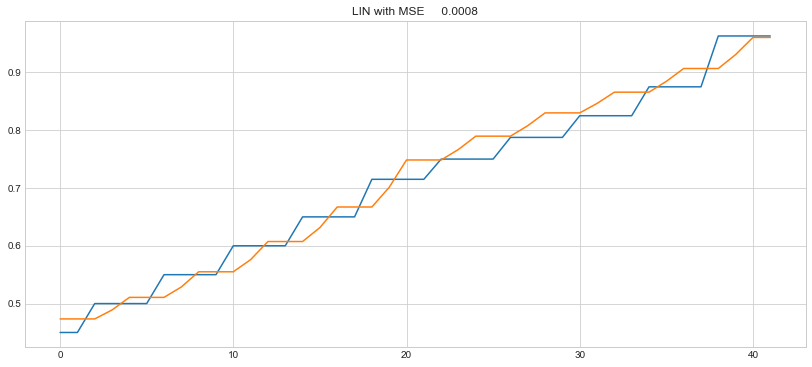

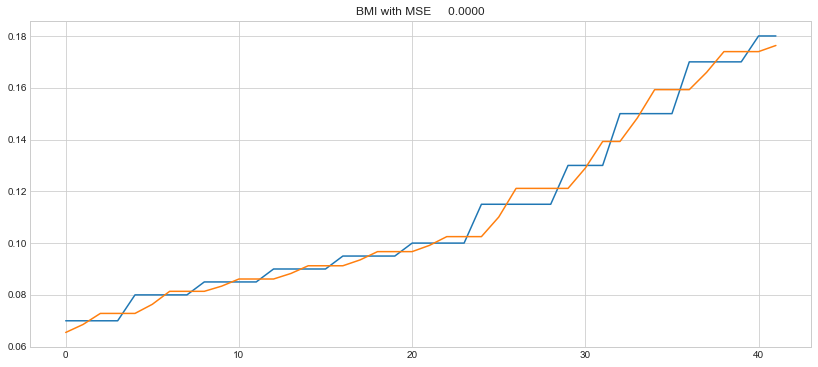

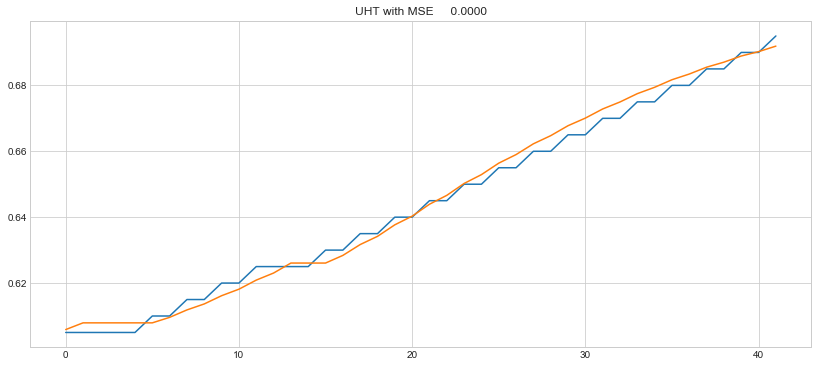

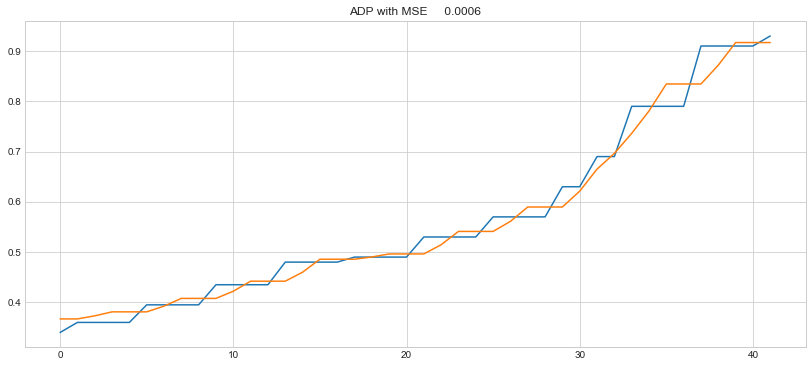

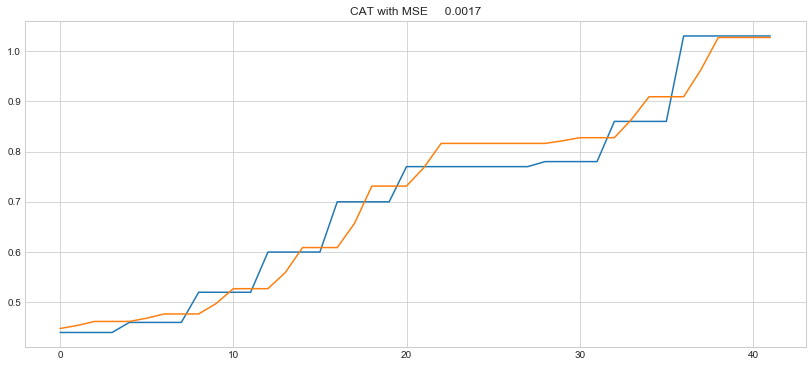

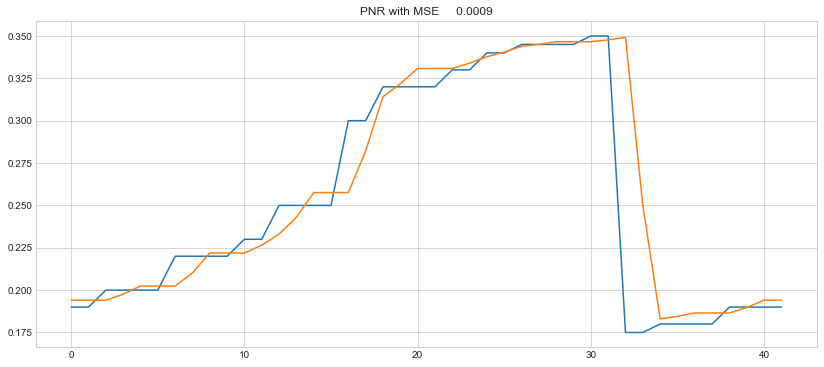

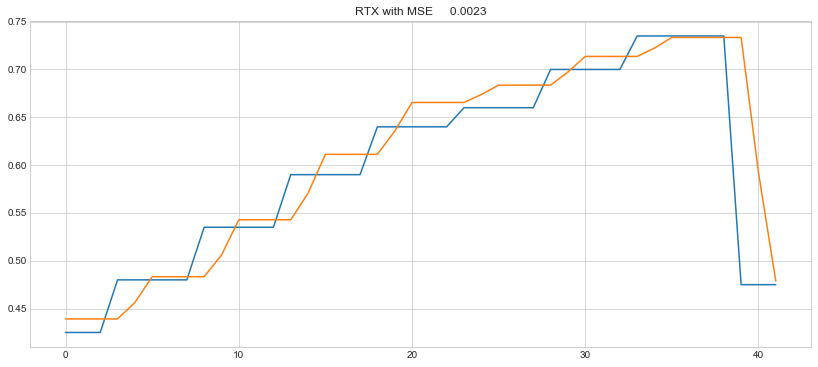

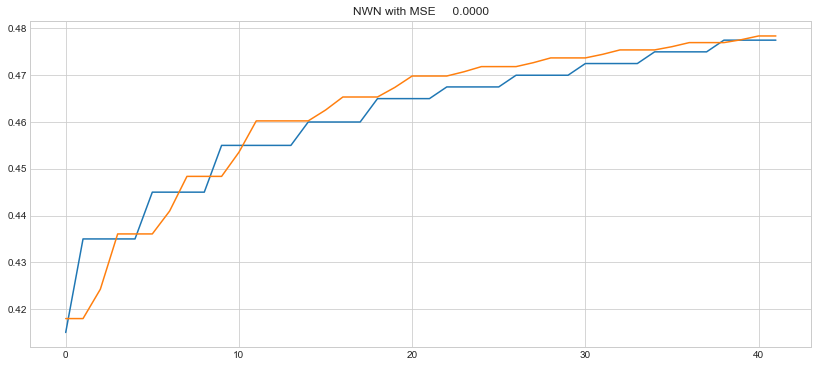

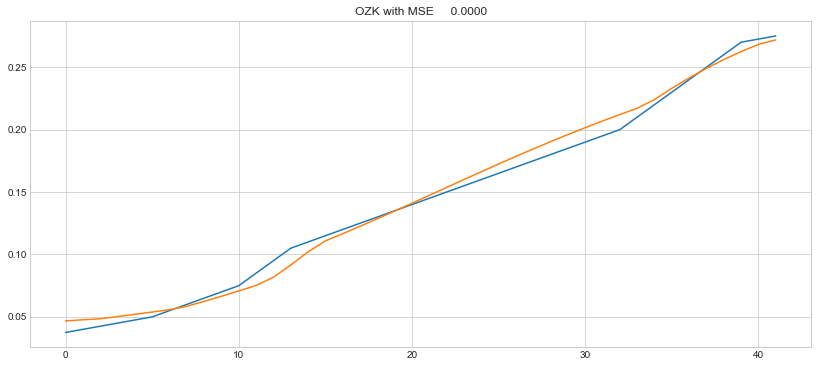

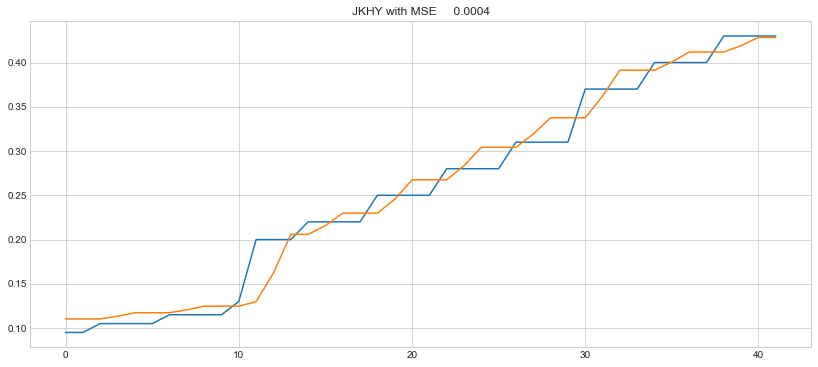

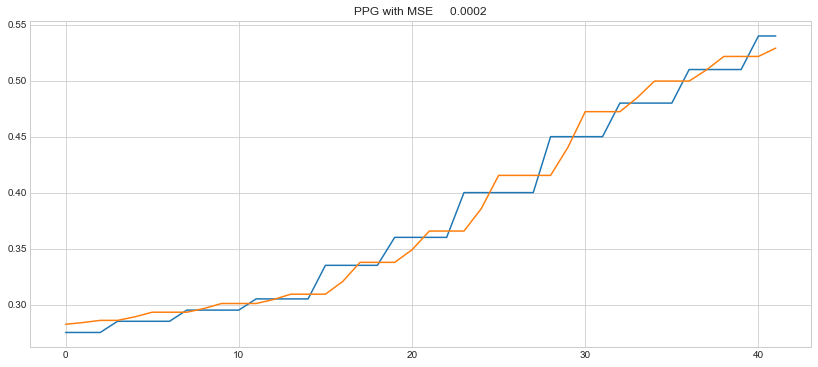

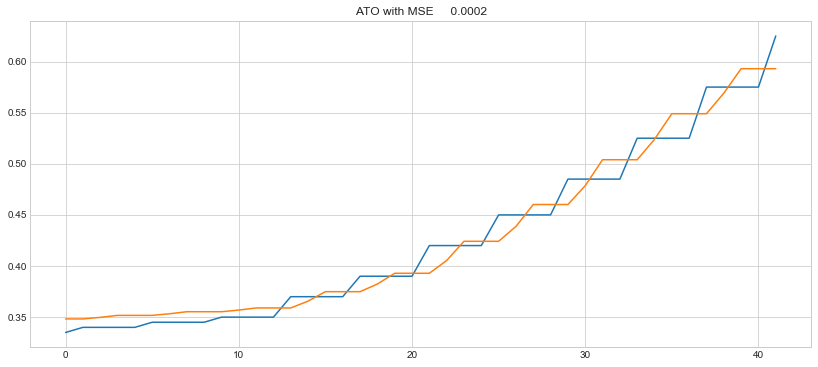

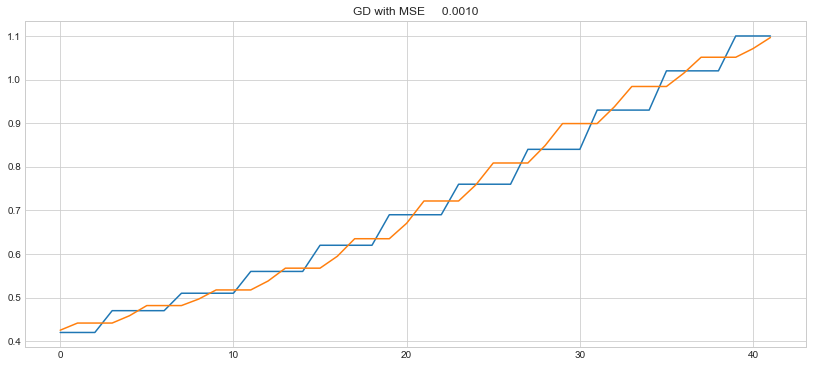

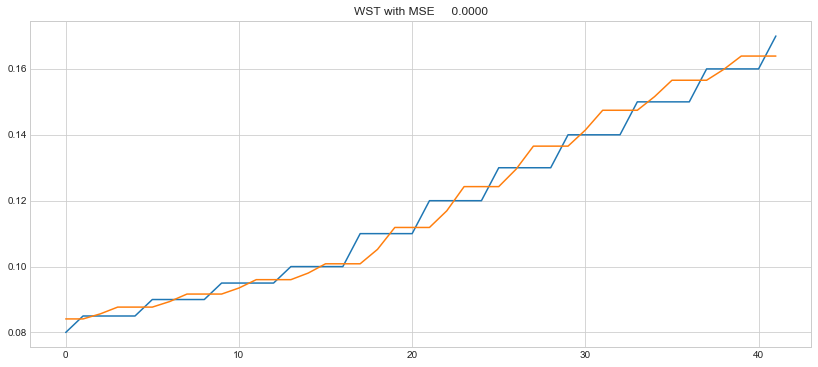

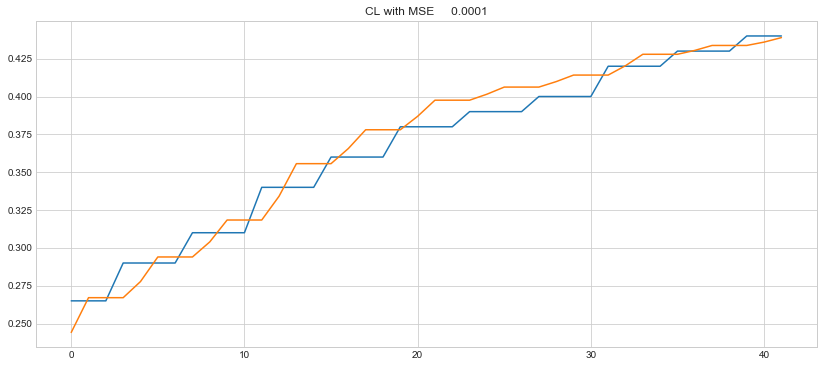

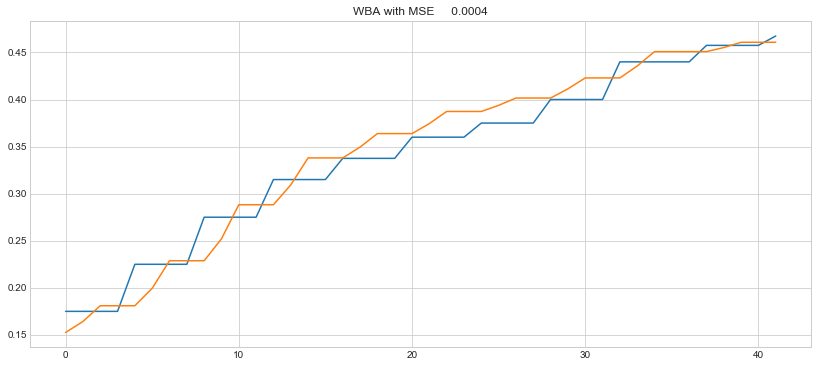

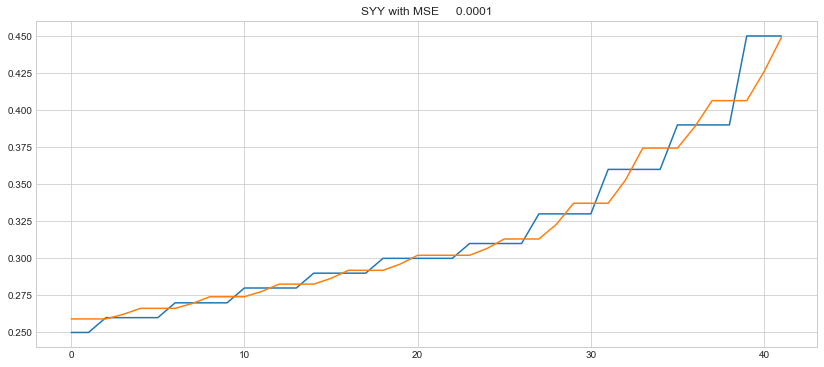

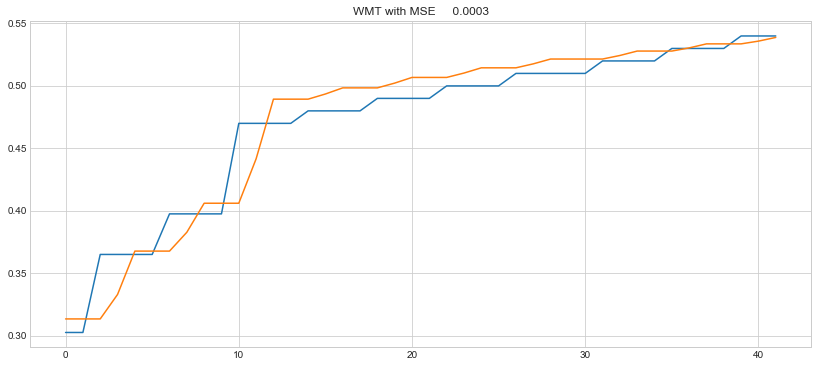

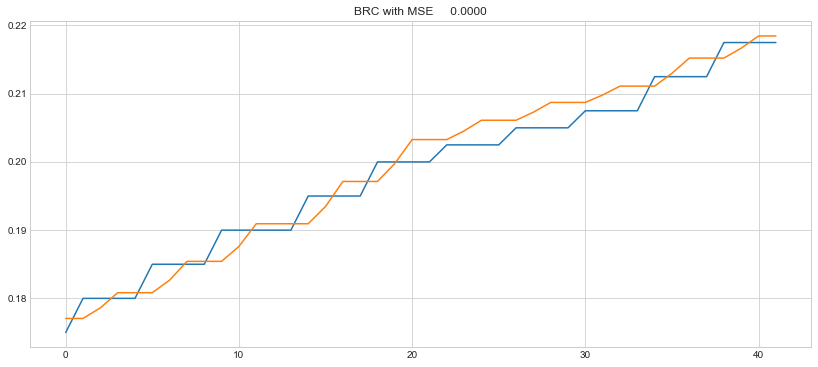

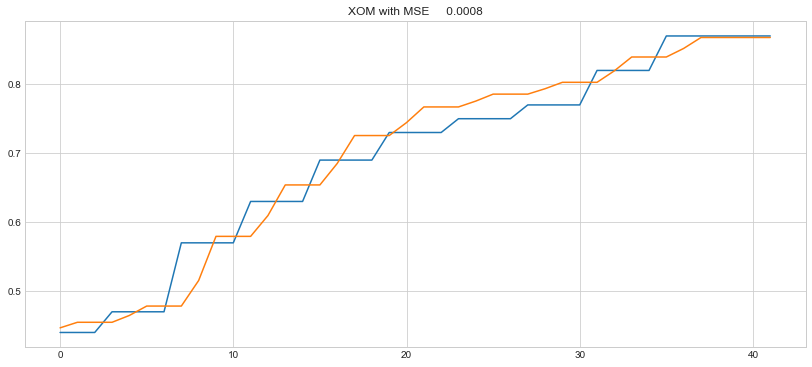

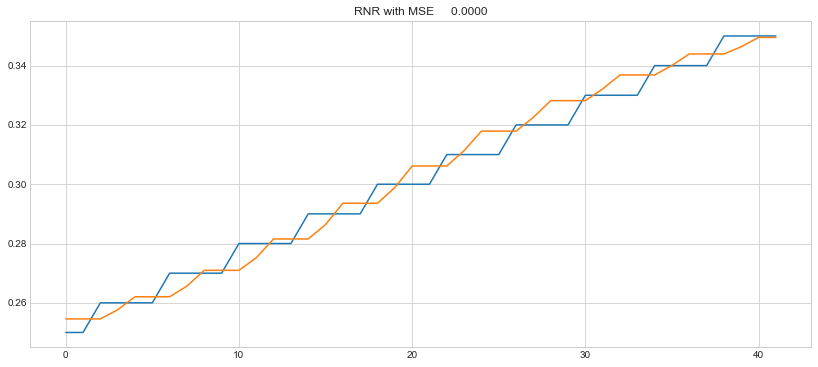

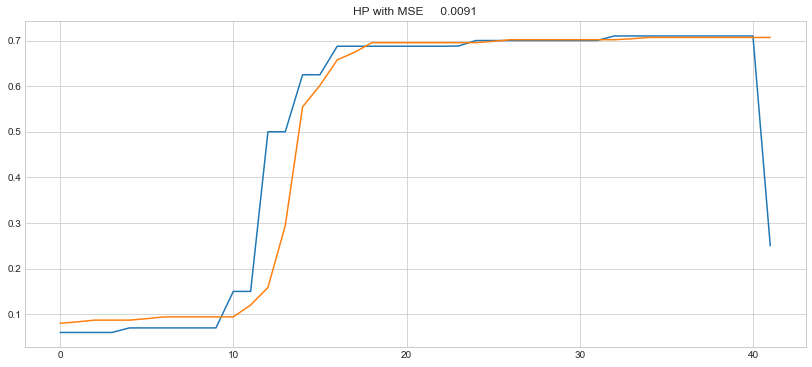

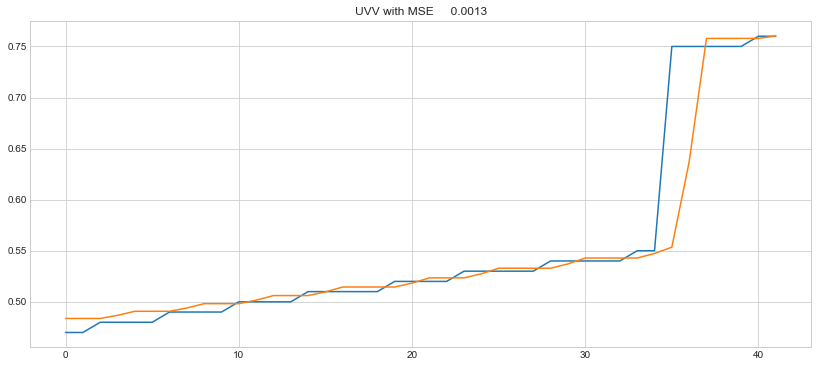

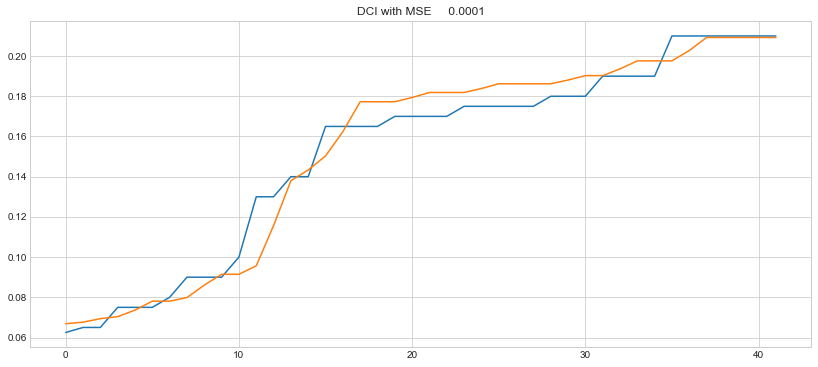

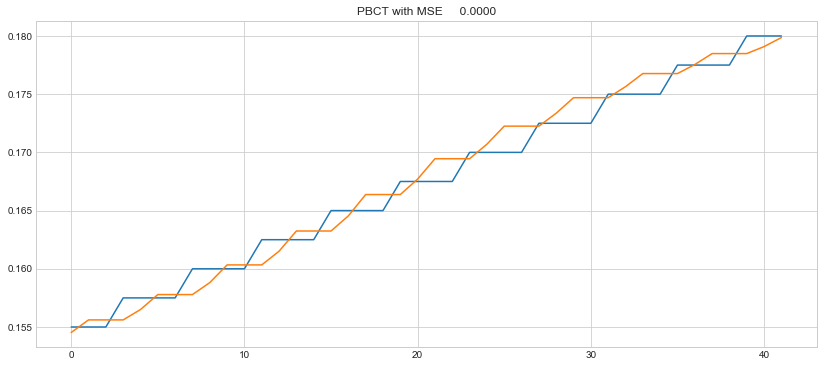

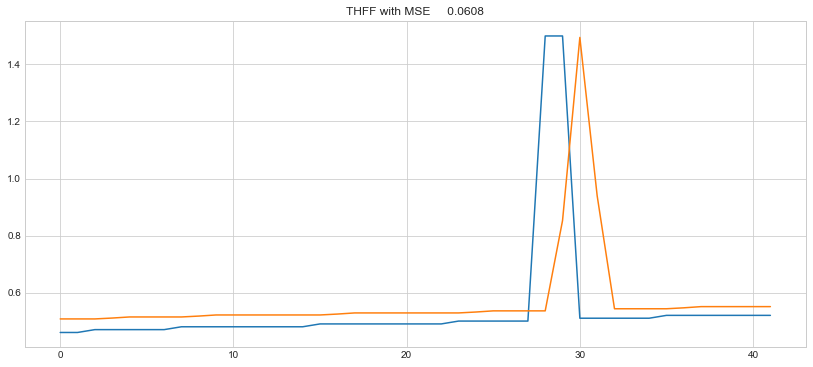

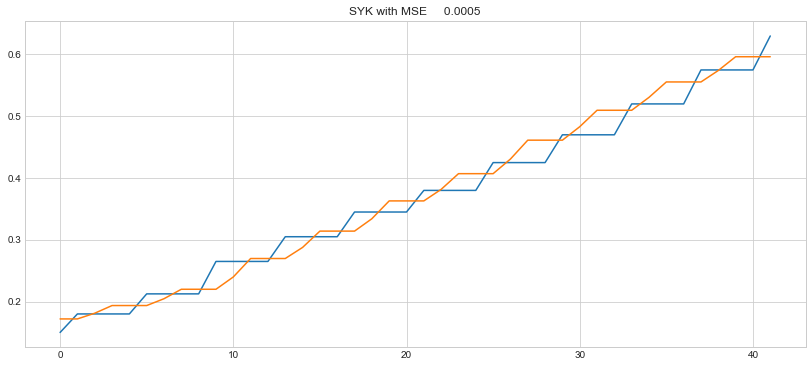

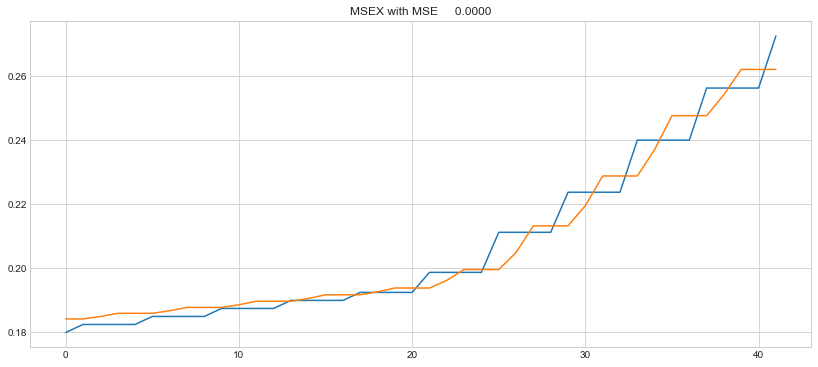

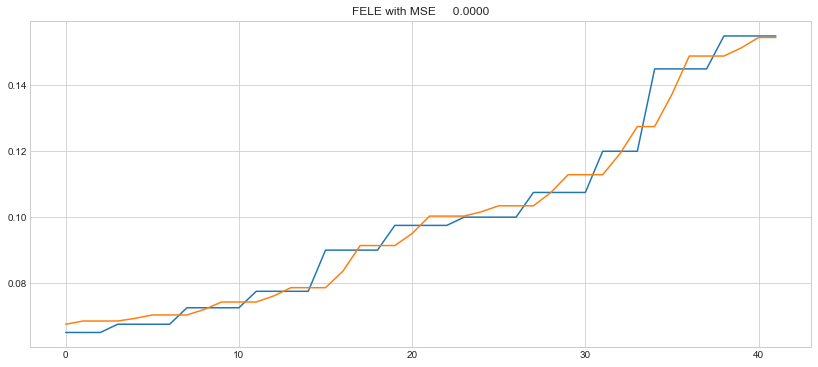

In [35]:
pred_result = {}
for i in stockListFix:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

In [39]:
time_index = df_new["RLI"]["Test"][2:].index
def lagging(df, lag, time_index):
    df_pred = pd.Series(df["Pred"].reshape(-1), index=time_index)
    df_true = pd.Series(df["True"].reshape(-1), index=time_index)
    
    df_pred_lag = df_pred.shift(lag)
    
    print("MSE without Lag", mean_squared_error(np.array(df_true), np.array(df_pred)))
    print("MSE with Lag 5", mean_squared_error(np.array(df_true[:-3]), np.array(df_pred_lag[:-3])))

    plt.figure(figsize=(14,4))
    plt.title("Prediction without Lag")
    plt.plot(df_true)
    plt.plot(df_pred)

    MSE_lag = mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-3]))
    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag")
    plt.plot(df_true)
    plt.plot(df_pred_lag)

In [41]:
lagging(pred_result["O"], -3, time_index)

MSE without Lag 3.533232498112875e-05


ValueError: Found input variables with inconsistent numbers of samples: [37, 39]